# Countng readings
In this notebook we will try to extract  electric meters that have an uniform number of readings during their period analysis

## Imports

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import entropy
from matplotlib.backends.backend_pdf import PdfPages
sns.set(style="whitegrid")

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [4]:
dir_origen_csv = "./CSV_generated/"
dir_export = "./Images_generated/3/"

## Reading csv

In [5]:
file_name1 = dir_origen_csv + "Data_limpia_windows.csv"
df = pd.read_csv(file_name1, low_memory = False, sep=",")
df["fecha"] =  pd.to_datetime(df["fecha"]) #transforming "fecha" to datetime
df

medidor               fecha  lectura_id_orig  voltajeA  voltajeB  \
0      15029828 2019-04-04 01:00:58          1141410  117.4806  117.7270   
1      15029828 2019-04-04 03:00:58          1141840  117.3321  117.5873   
2      15029828 2019-04-04 05:00:58          1142271  118.3265  118.3270   
3      15029828 2019-04-04 07:01:01          1142711  119.8214  119.9720   
4      15029828 2019-04-04 09:01:02          1143130  114.6726  114.8017   
5      15029828 2019-04-04 11:00:58          1143509  114.6649  114.8677   
6      15029828 2019-04-04 13:00:59          1143880  114.8444  115.3403   
7      15029828 2019-04-04 15:01:02          1144272  114.6778  114.8357   
8      15029828 2019-04-04 17:01:02          1144628  116.9224  117.2767   
9      15029828 2019-04-04 19:01:02          1145053  114.1925  114.8132   
10     15029828 2019-04-04 21:01:05          1145457  117.5392  117.8100   
11     15029828 2019-04-05 01:01:01          1146342  116.3292  116.4811   
12     15029828 2019-04-05 03:01:02          1146775  117.1580  115.7159   
13     15029828 2019-04-05 05:01:02          1147222  117.8144  117.9999   
14     15029828 2019-04-05 09:01:03          1148042  116.4599  116.4413   
15     15029828 2019-04-05 13:08:58          1149035  114.3455  114.0721   
16     15029828 2019-04-05 15:40:19          1149560  117.0340  116.8882   
17     15029828 2019-04-05 17:40:18          1149951  117.3378  117.1492   
18     15029828 2019-04-05 19:40:17          1150347  115.3972  116.1736   
19     15029828 2019-04-05 21:10:21          1150696  115.7649  116.0876   
20     15029828 2019-04-05 23:10:22          1151095  117.0613  117.5679   
21     15029828 2019-04-06 01:10:22          1151561  116.7214  115.9408   
22     15029828 2019-04-06 03:10:24          1151966  117.2874  117.5181   
23     15029828 2019-04-06 05:10:25          1152384  118.2599  117.9589   
24     15029828 2019-04-06 07:10:23          1152796  118.7317  117.9507   
25     15029828 2019-04-06 11:10:26          1153513  116.4383  116.1652   
26     15029828 2019-04-06 13:10:26          1153845  116.6304  116.6429   
27     15029828 2019-04-06 15:10:26          1154204  116.2677  116.1883   
28     15029828 2019-04-06 17:10:26          1154528  117.7125  117.3089   
29     15029828 2019-04-06 19:10:24          1154910  114.8396  115.1581   
...         ...                 ...              ...       ...       ...   
60584  59814806 2019-05-30 01:24:23          1419405  126.9000    0.0000   
60585  59814806 2019-05-30 05:24:21          1420206  127.8000    0.0000   
60586  59814806 2019-05-30 09:24:22          1420977  124.9000    0.0000   
60587  59814806 2019-05-30 13:24:22          1421728  125.5000    0.0000   
60588  59814806 2019-05-30 17:24:23          1422537  125.4000    0.0000   
60589  59814806 2019-05-30 21:24:26          1423273  125.2000    0.0000   
60590  59814806 2019-05-31 01:24:26          1424111  125.8000    0.0000   
60591  59814806 2019-05-31 05:24:28          1424863  126.0000    0.0000   
60592  59814806 2019-05-31 09:24:25          1425605  125.2000    0.0000   
60593  59814806 2019-05-31 13:24:25          1426317  123.2000    0.0000   
60594  59814806 2019-05-31 17:24:26          1427012  125.7000    0.0000   
60595  59814806 2019-05-31 21:24:27          1427767  125.1000    0.0000   
60596  59814806 2019-06-01 01:24:27          1428795  126.6000    0.0000   
60597  59814806 2019-06-01 05:24:27          1429590  127.5000    0.0000   
60598  59814806 2019-06-01 09:24:28          1430349  125.3000    0.0000   
60599  59814806 2019-06-01 13:24:28          1431022  124.0000    0.0000   
60600  59814806 2019-06-01 17:24:29          1431759  125.3000    0.0000   
60601  59814806 2019-06-01 21:24:30          1432506  124.8000    0.0000   
60602  59814806 2019-06-02 01:24:31          1433311  126.5000    0.0000   
60603  59814806 2019-06-02 05:24:31          1434079  127.7000    0.0000   
60604  59814806 2019-06-02 09:24:31          1434808  12

## General counting

### Number of meters

In [4]:
df["medidor"].nunique()

112

### Number of readings per meter

In [5]:
df["medidor"].value_counts()

58706656    2947
52073163    1392
15029977     736
15029846     726
20037228     722
58706706     721
15029835     719
15842894     718
16951216     716
16951175     715
16951221     714
16567743     713
16951176     713
16951203     712
15842885     711
16951181     711
16567753     710
16951209     710
15029844     710
16951220     708
16951205     706
16951201     703
16567760     701
20037214     701
15029847     701
16567746     700
16951206     699
16567761     699
16951222     698
16951177     697
            ... 
53307830     360
59814806     360
52071420     360
58706663     359
35924882     358
52073359     357
52071428     356
52073331     356
35924864     356
58706634     355
41175730     355
52073348     348
35947180     346
28006904     346
53307871     344
52071447     342
52073201     341
58706740     339
58706704     333
52073382     332
35924866     331
35925291     331
52073290     327
58706662     315
52073198     312
58706713     286
52071455     275
58706709     2

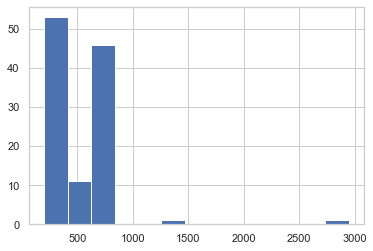

In [6]:
plt.figure()
df["medidor"].value_counts().hist(bins = 13)

### Histogram #Readings per day of Month (0 -> 30)
(be careful if is there are more than one month in your dataset)

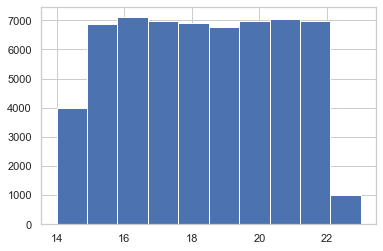

In [7]:
df["dayMonth"].hist()

## Individual graphs

### Number of readings per day of Month

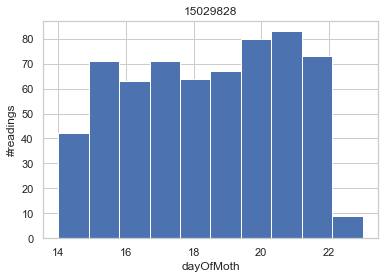

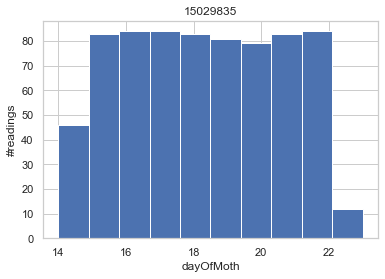

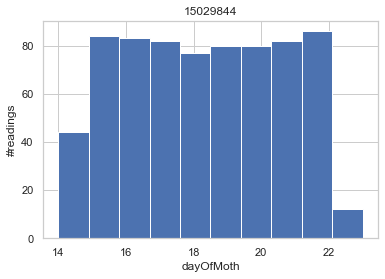

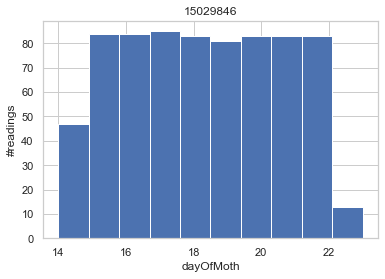

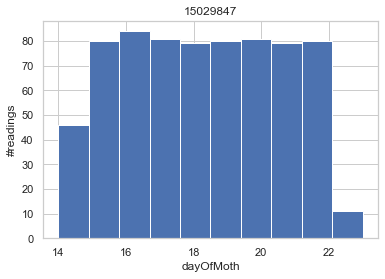

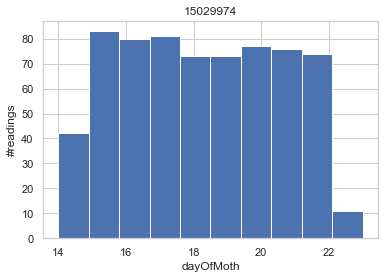

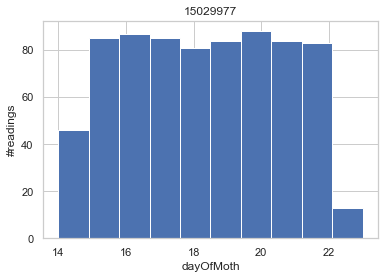

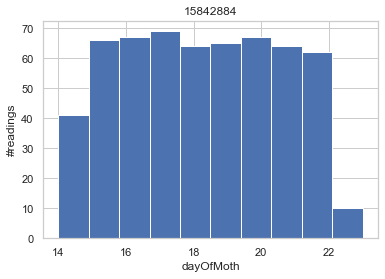

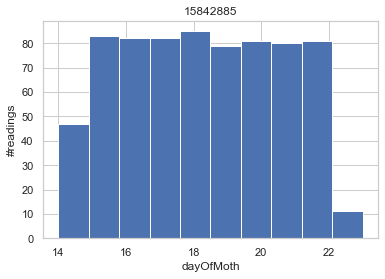

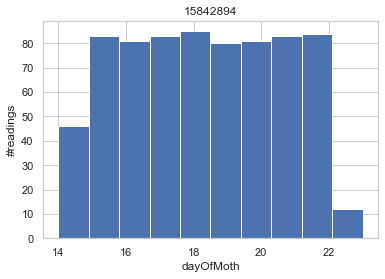

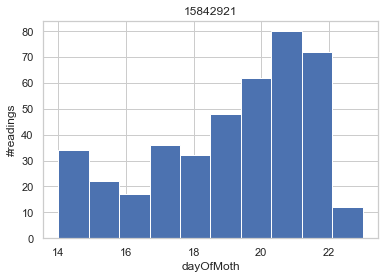

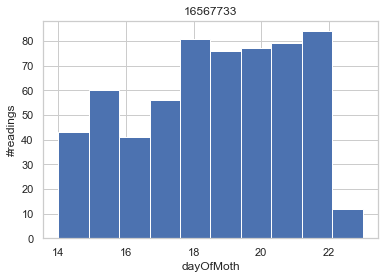

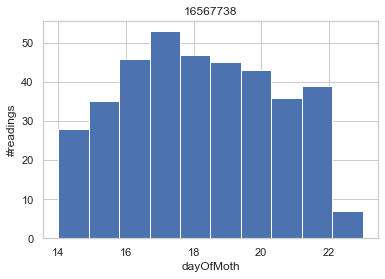

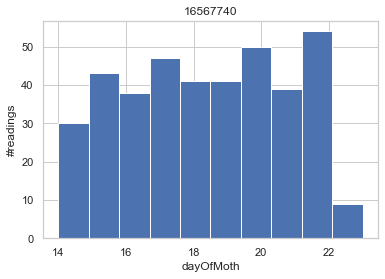

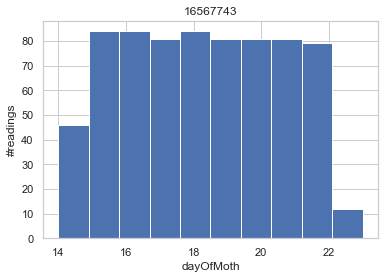

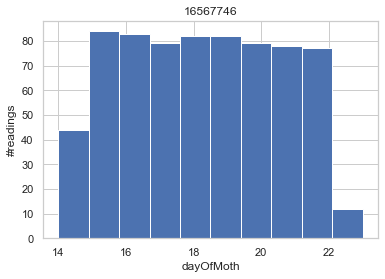

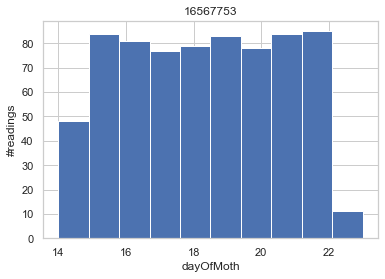

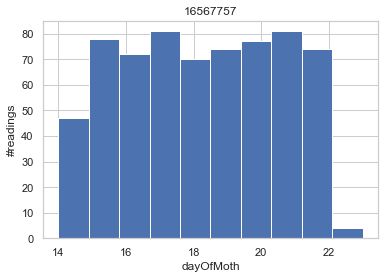

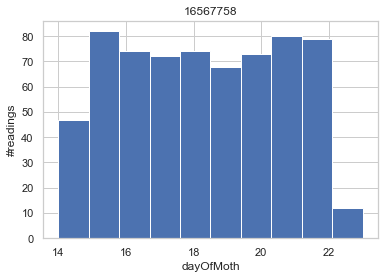

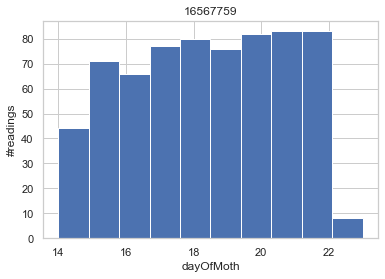

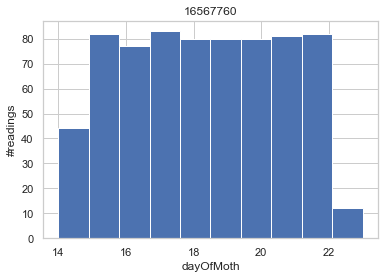

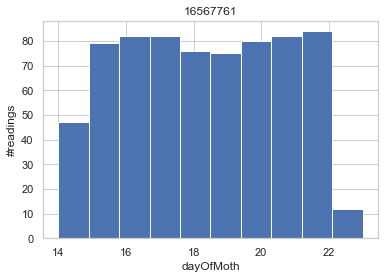

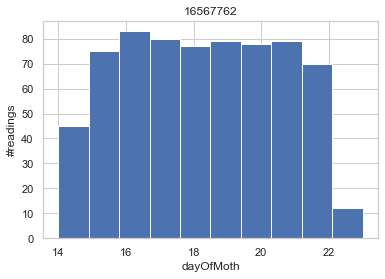

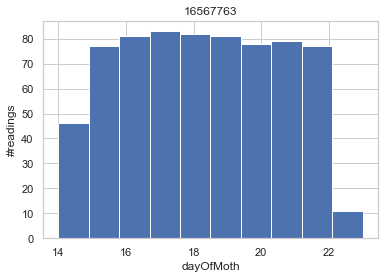

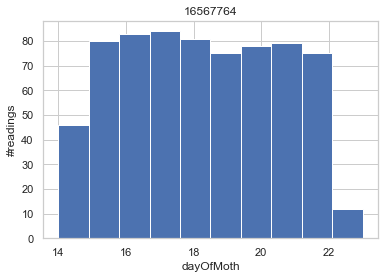

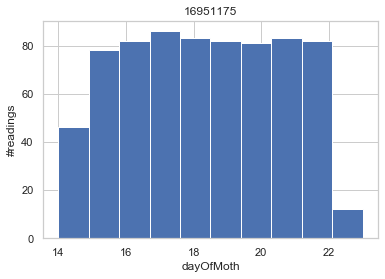

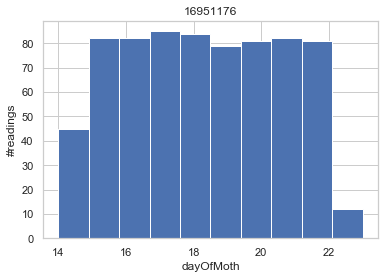

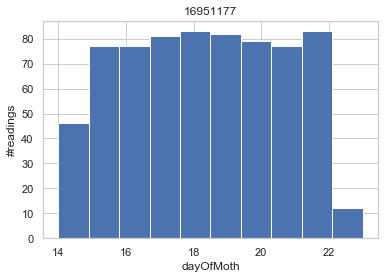

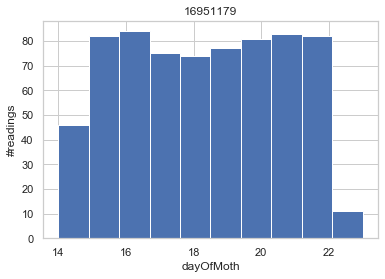

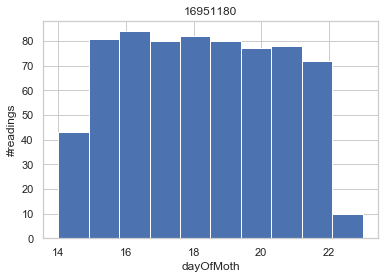

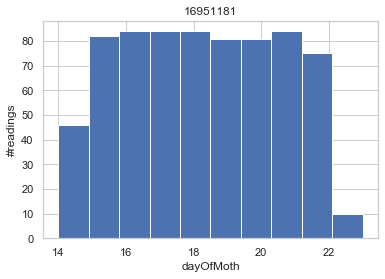

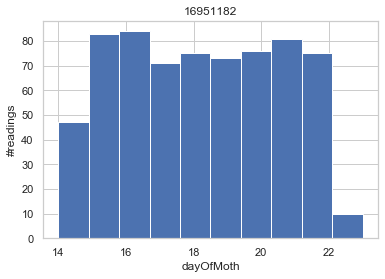

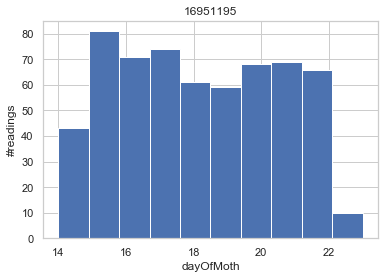

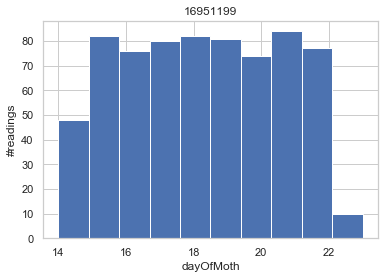

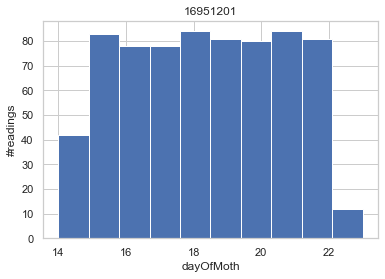

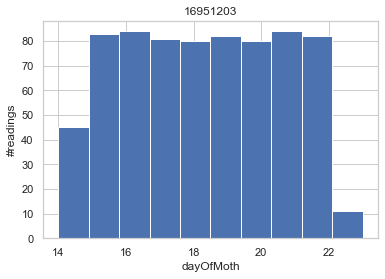

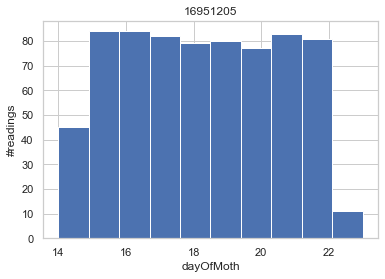

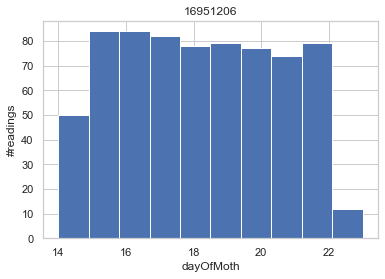

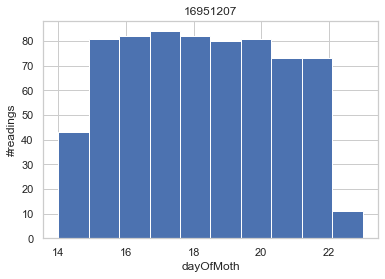

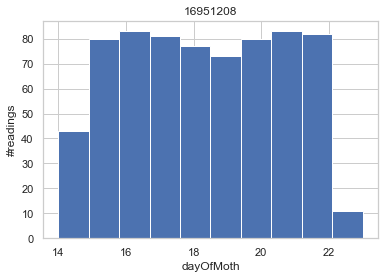

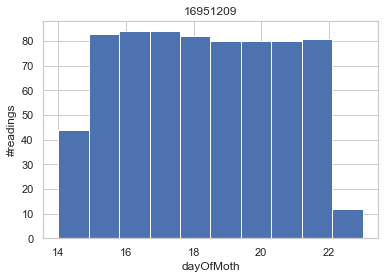

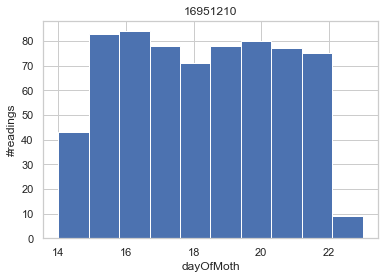

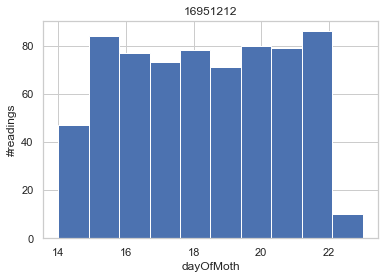

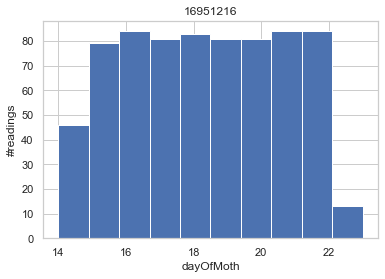

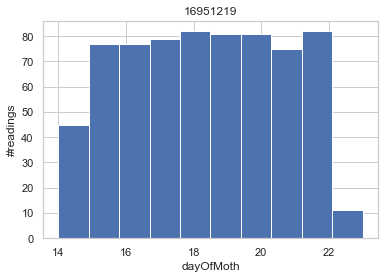

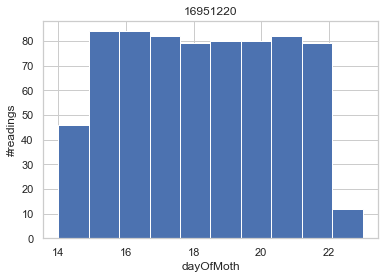

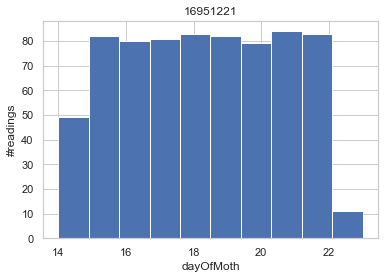

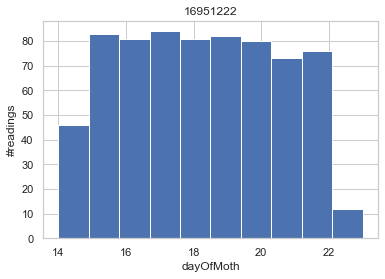

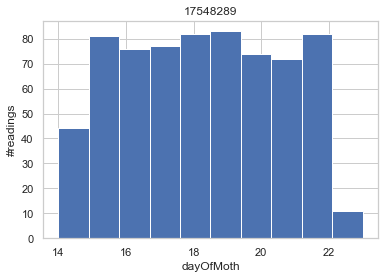

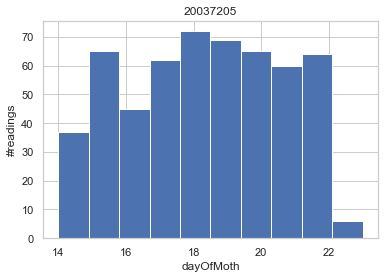

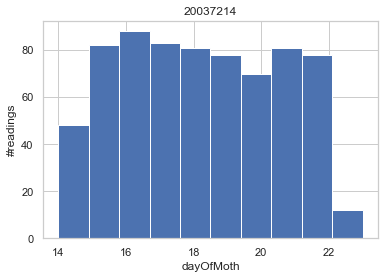

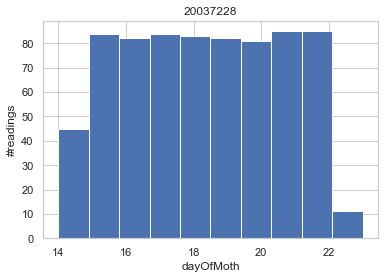

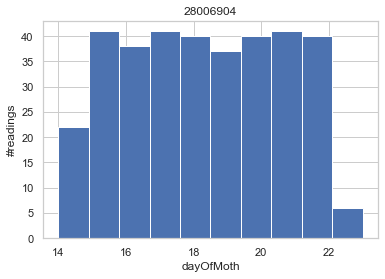

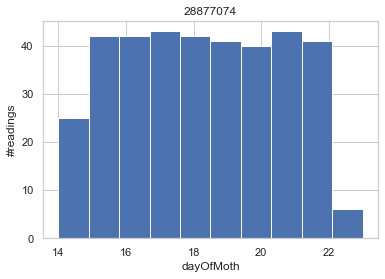

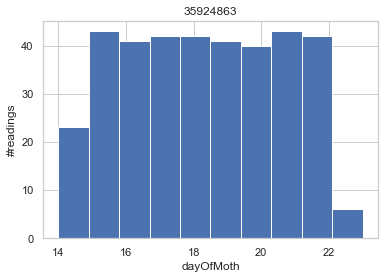

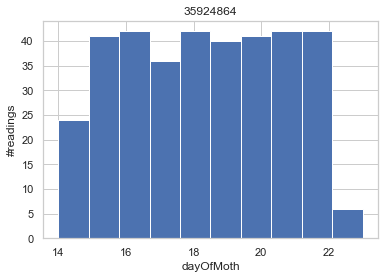

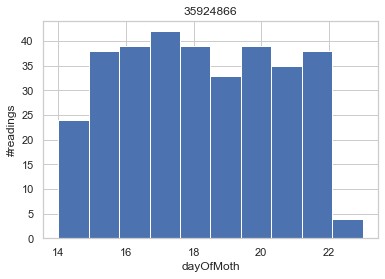

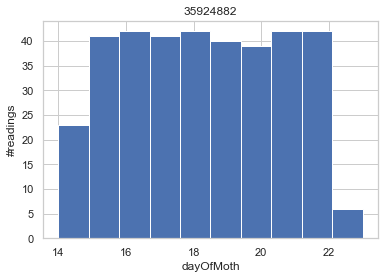

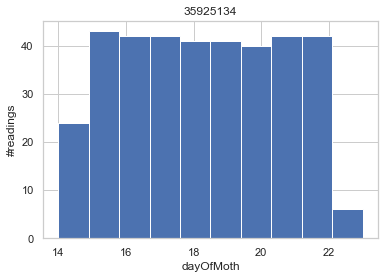

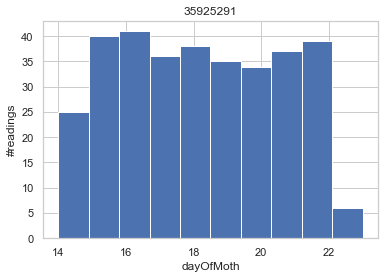

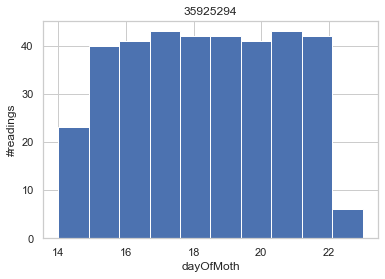

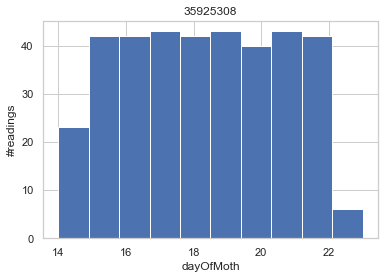

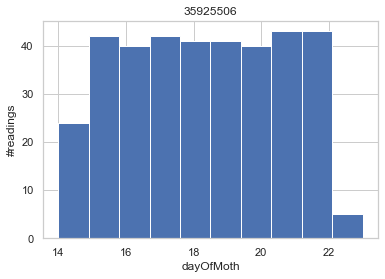

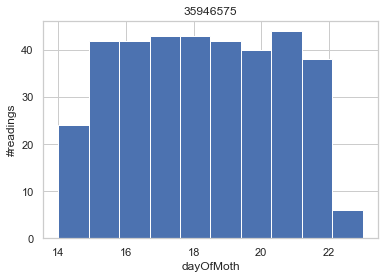

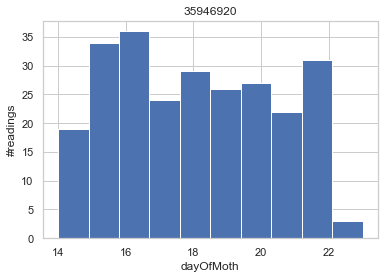

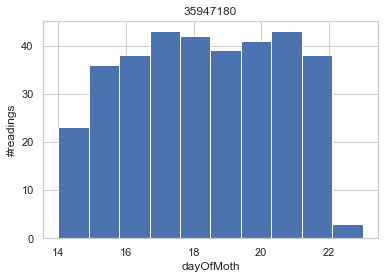

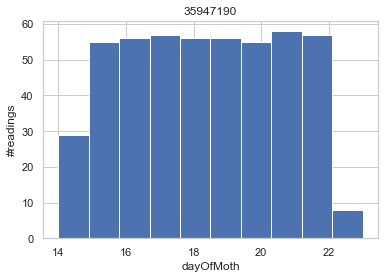

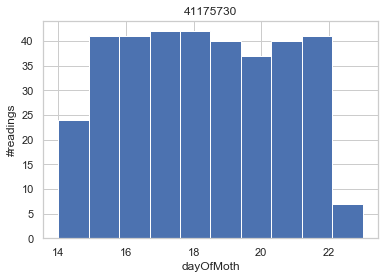

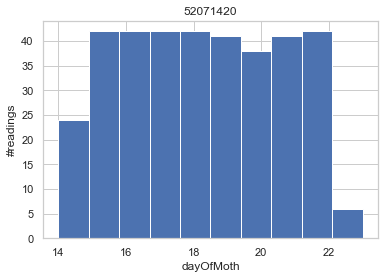

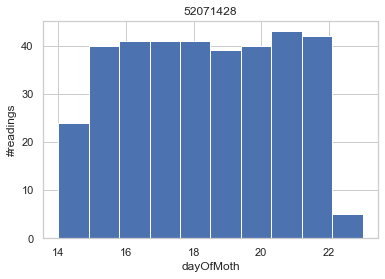

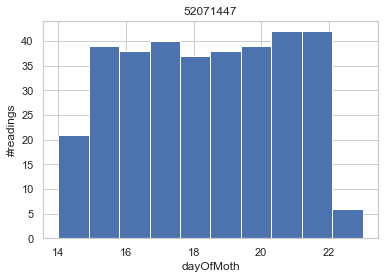

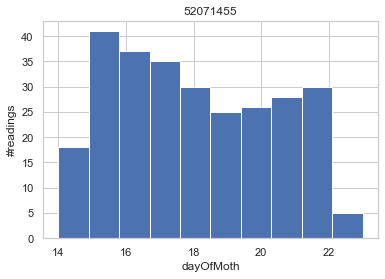

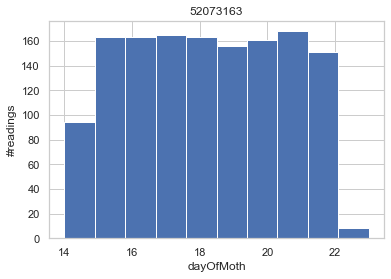

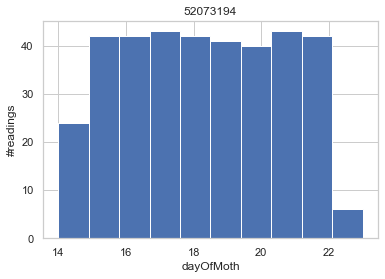

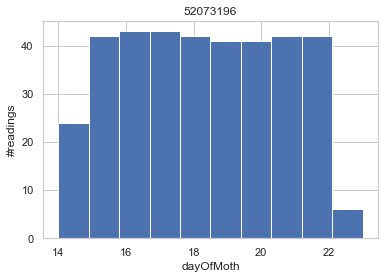

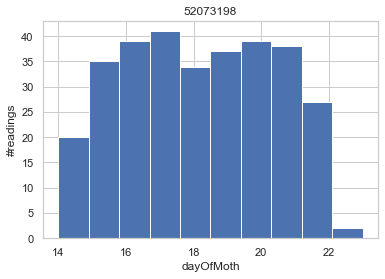

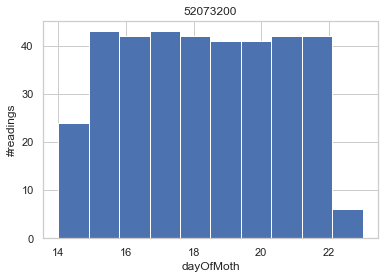

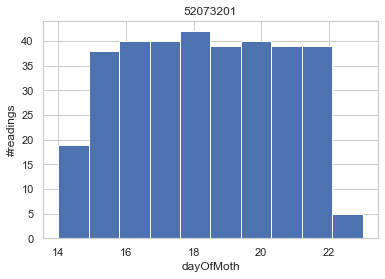

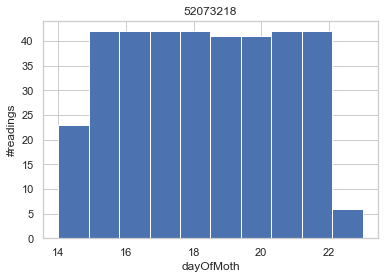

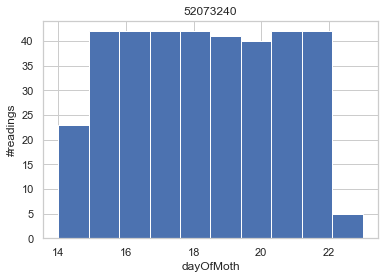

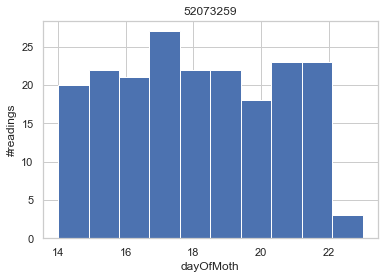

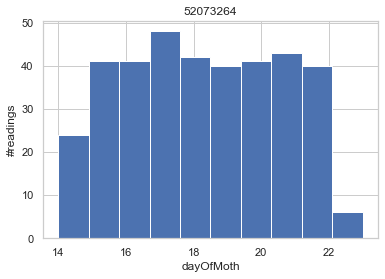

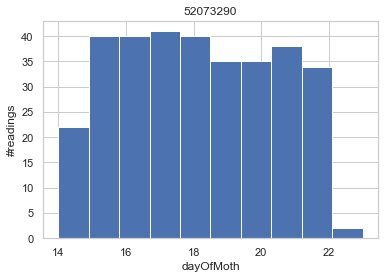

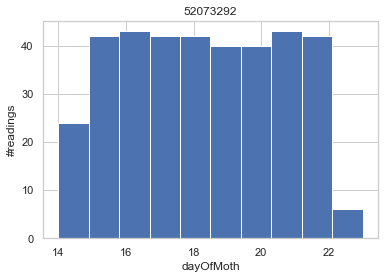

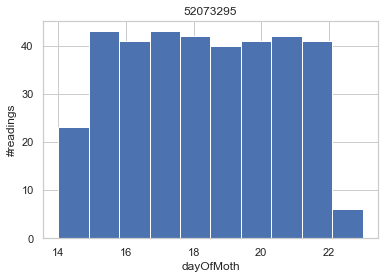

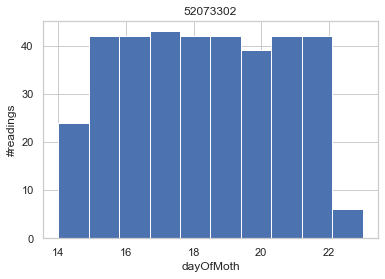

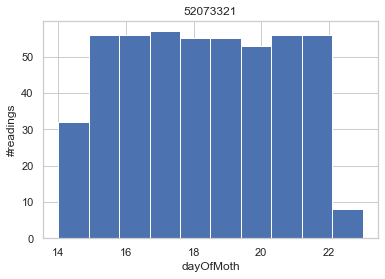

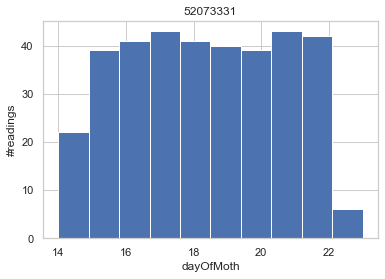

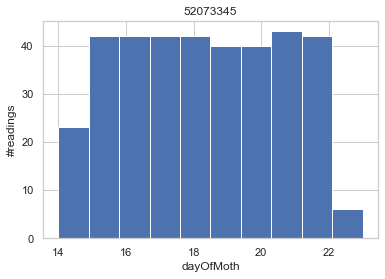

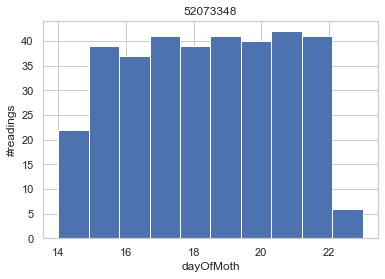

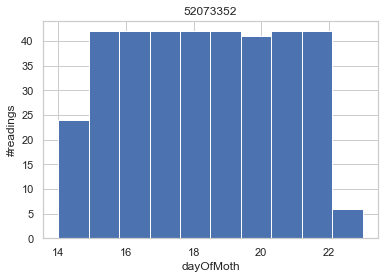

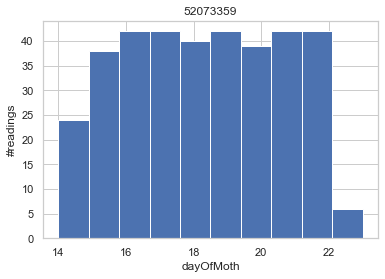

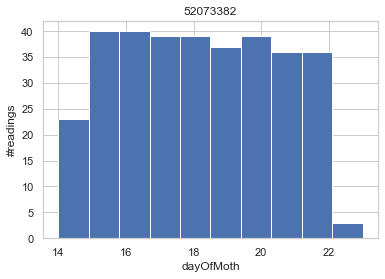

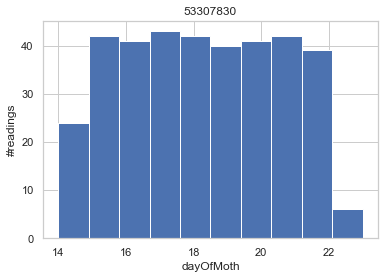

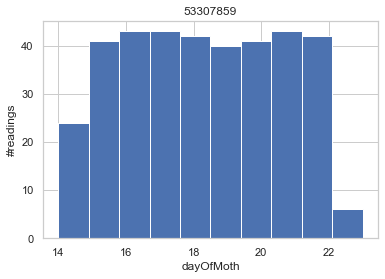

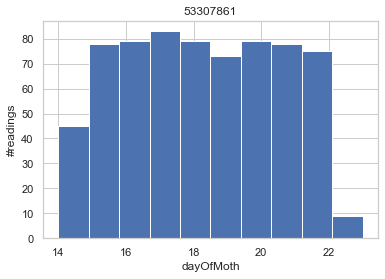

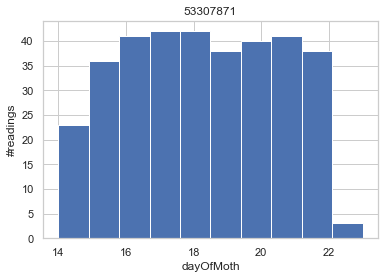

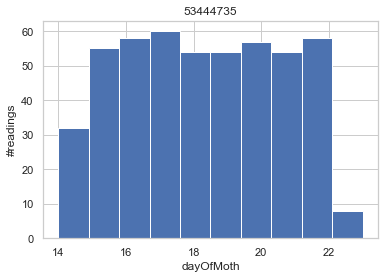

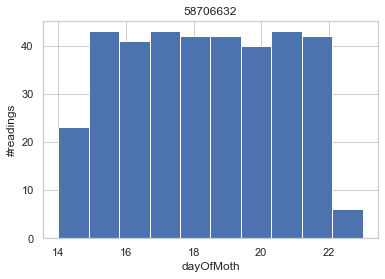

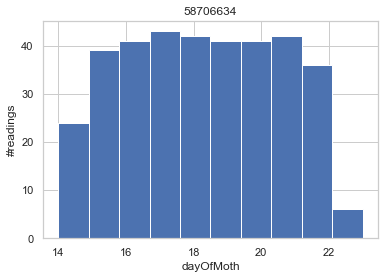

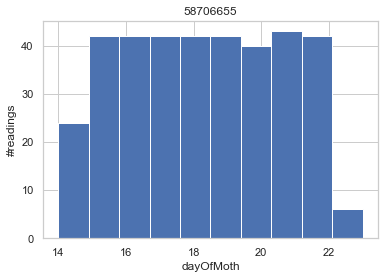

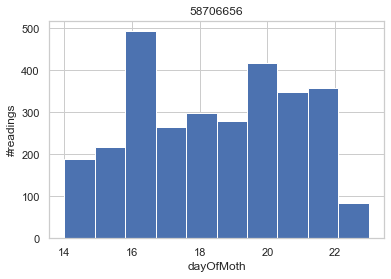

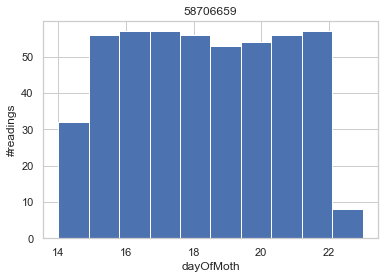

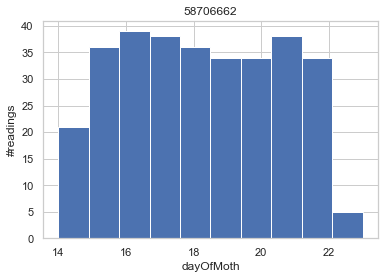

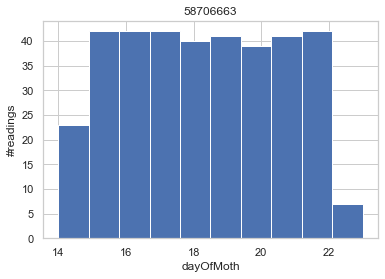

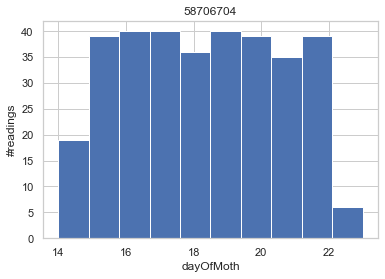

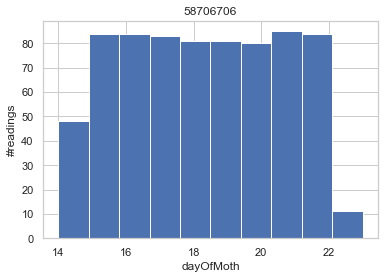

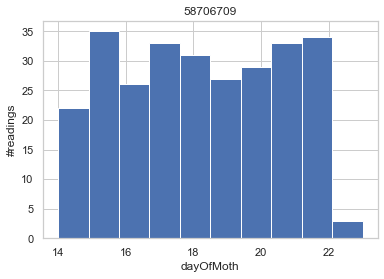

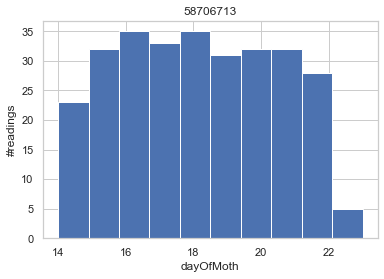

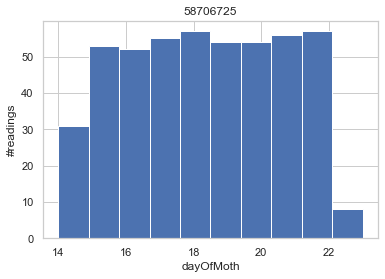

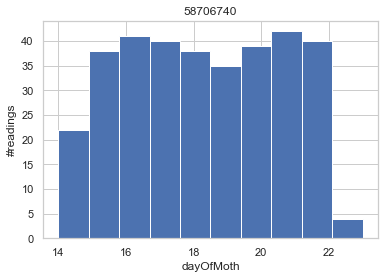

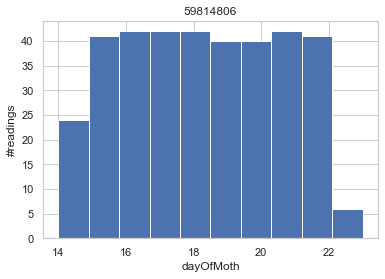

In [8]:

with PdfPages(dir_export + "Number of readings per day of Month _windows.pdf") as pdf:

    for n,g in df.groupby("medidor")["dayMonth"]:
        fig = plt.figure()
        plt.title(n)
        plt.xlabel("dayOfMoth")
        plt.ylabel("#readings")
        g.hist()
        pdf.savefig(fig)

In [9]:
'''
def unique(df):
    a_month =df["fecha"].apply(lambda x: x.day)
    a_month =df["fecha"].apply(lambda x: x.month)

    b = df["fecha"].shift()
    b_day = b.apply(lambda x: x.day)
    b_month = b.apply(lambda x: x.month)
    diff = ((a_month != b_month) | (a_month != b_day))     
    count = -1
    before = 0
    serie = []
    for i in diff:
        if (count == -1):
            before = i
            count +=1
        else:
            if (i != before):
                count += 1
            before = i
            serie.append(count)
    dataframe = pd.DataFrame(serie)
    return dataframe

for n,g in df.groupby("medidor"):
    reading_per_day = unique(df)
    figure = plt.figure()
    reading_per_day.hist()
'''

'\ndef unique(df):\n    a_month =df["fecha"].apply(lambda x: x.day)\n    a_month =df["fecha"].apply(lambda x: x.month)\n\n    b = df["fecha"].shift()\n    b_day = b.apply(lambda x: x.day)\n    b_month = b.apply(lambda x: x.month)\n    diff = ((a_month != b_month) | (a_month != b_day))     \n    count = -1\n    before = 0\n    serie = []\n    for i in diff:\n        if (count == -1):\n            before = i\n            count +=1\n        else:\n            if (i != before):\n                count += 1\n            before = i\n            serie.append(count)\n    dataframe = pd.DataFrame(serie)\n    return dataframe\n\nfor n,g in df.groupby("medidor"):\n    reading_per_day = unique(df)\n    figure = plt.figure()\n    reading_per_day.hist()\n'

### Frequency number of readings: barplot

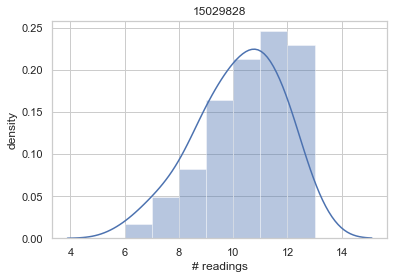

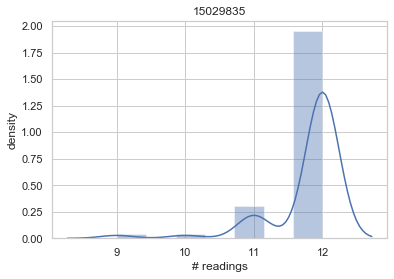

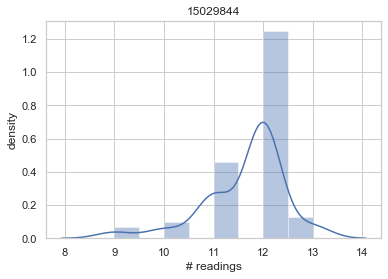

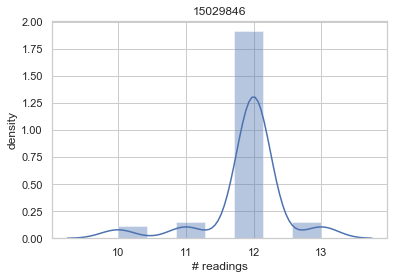

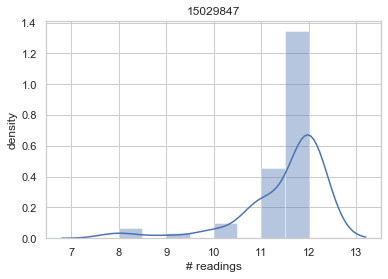

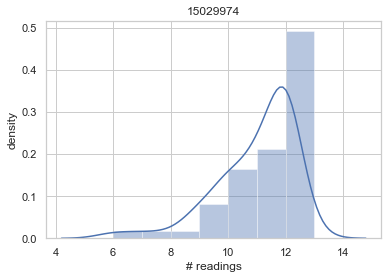

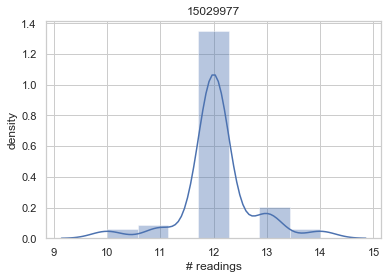

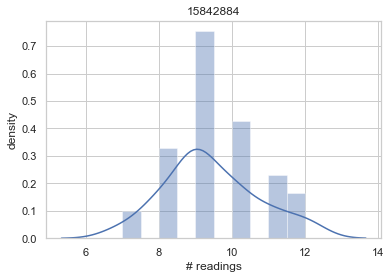

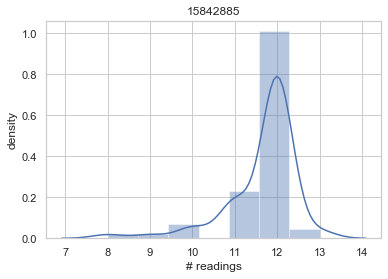

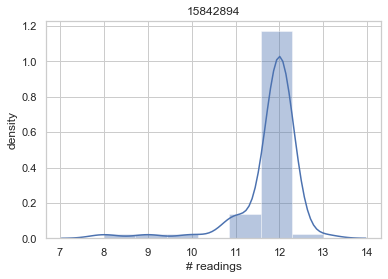

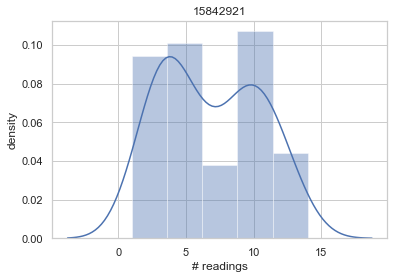

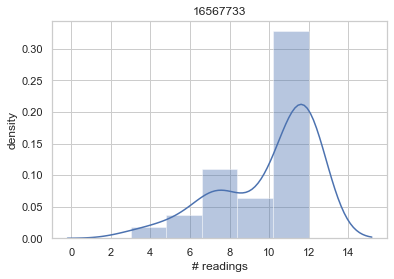

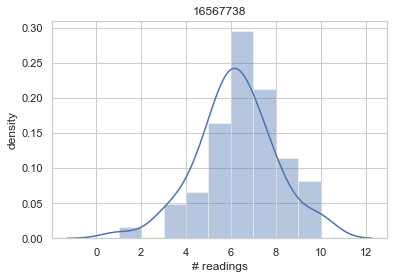

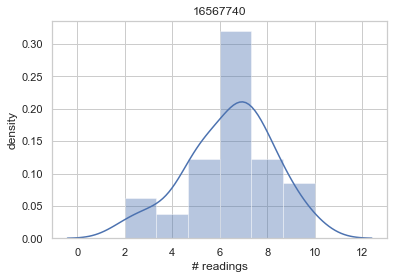

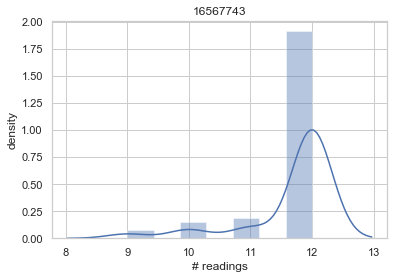

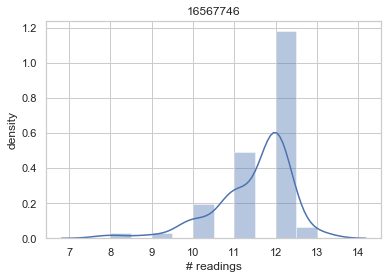

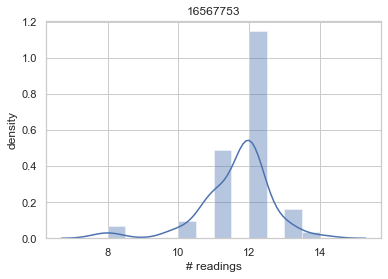

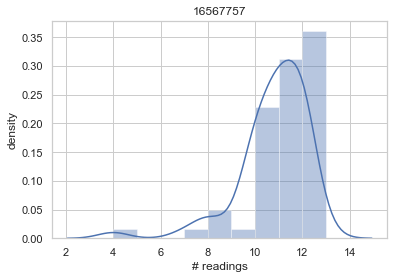

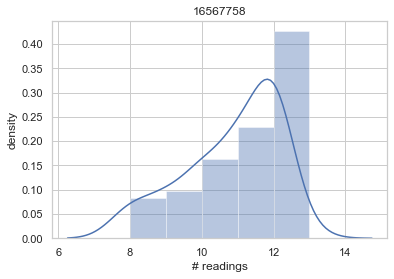

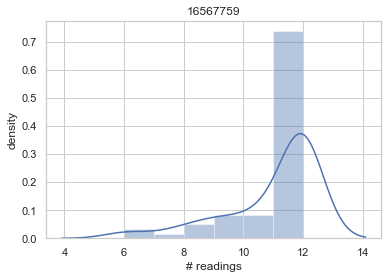

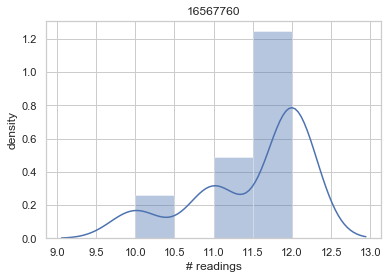

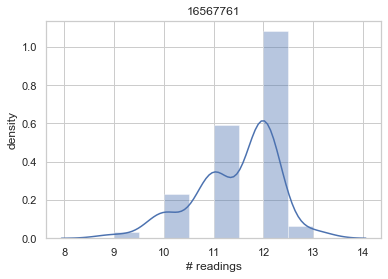

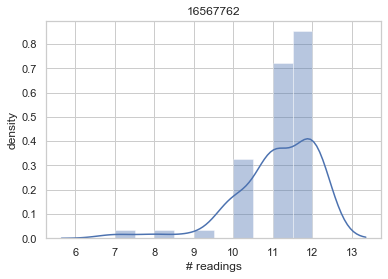

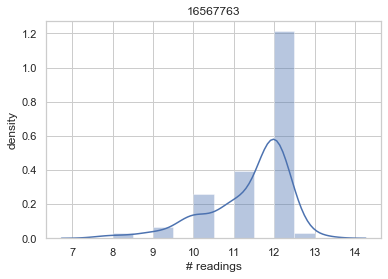

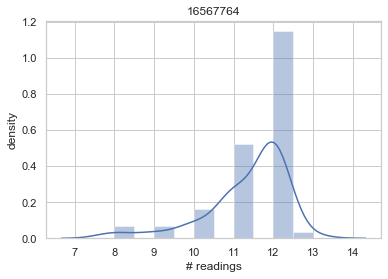

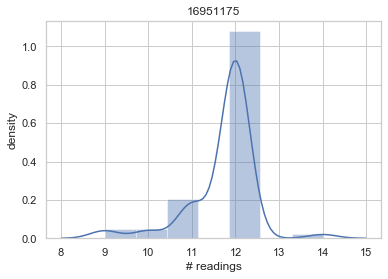

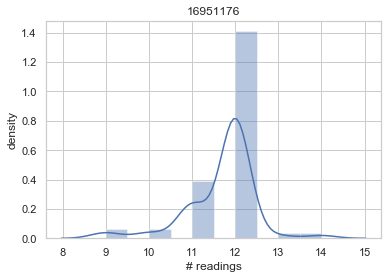

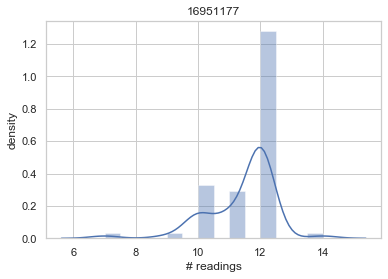

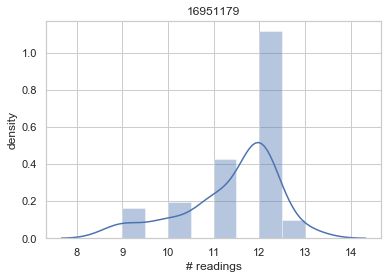

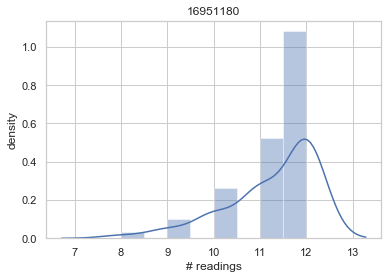

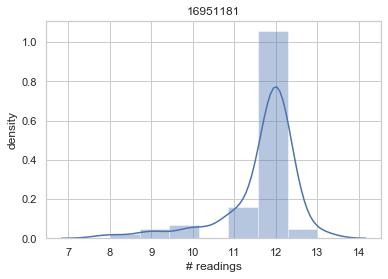

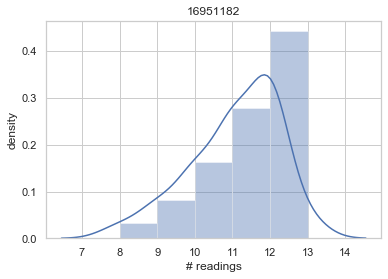

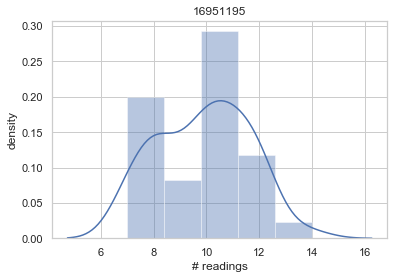

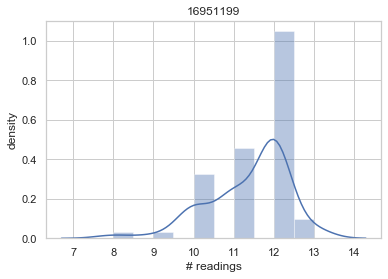

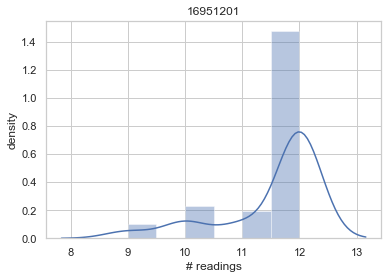

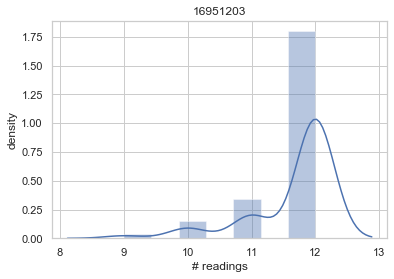

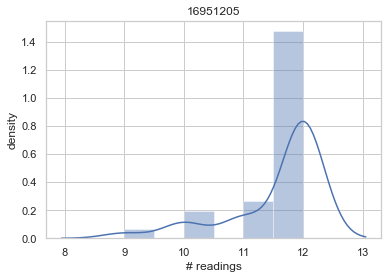

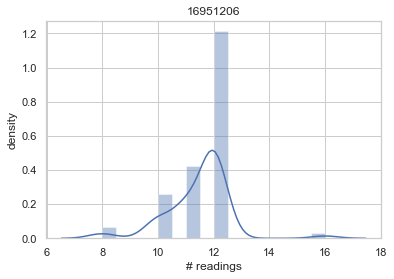

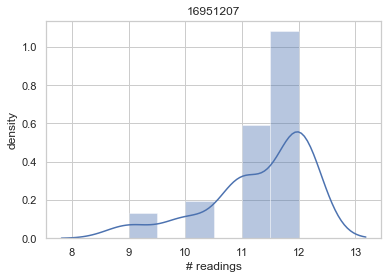

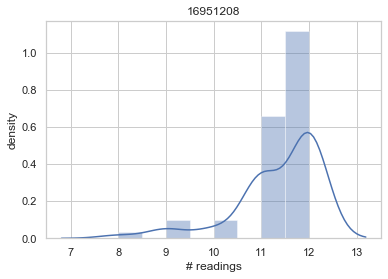

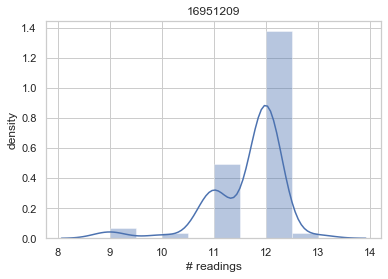

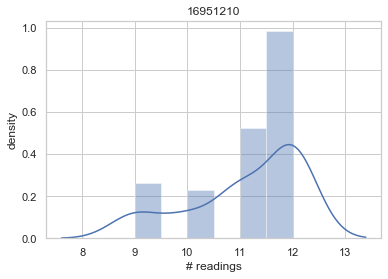

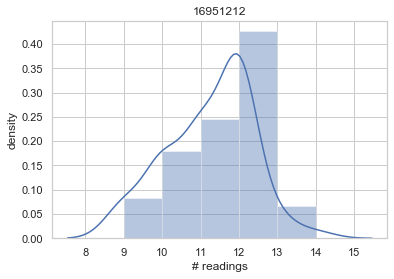

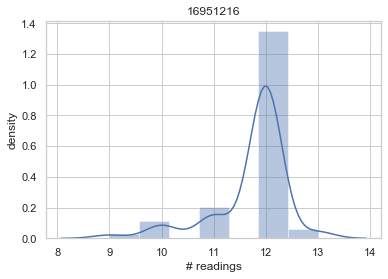

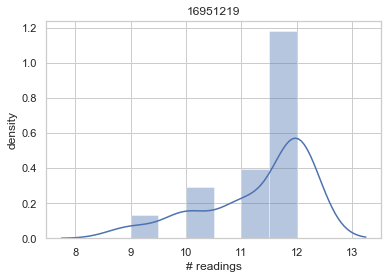

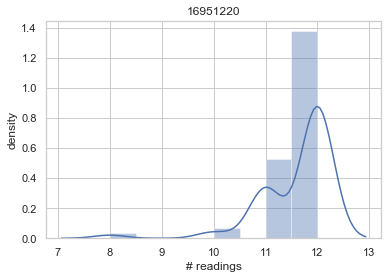

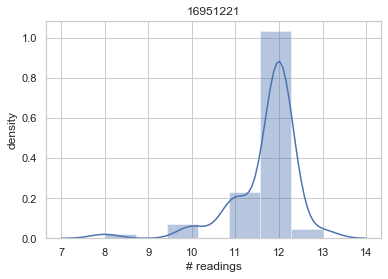

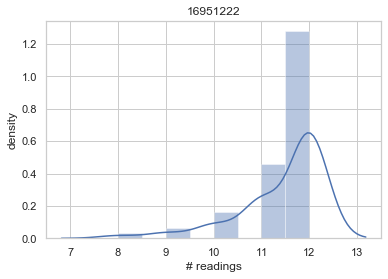

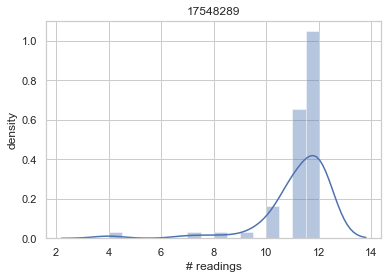

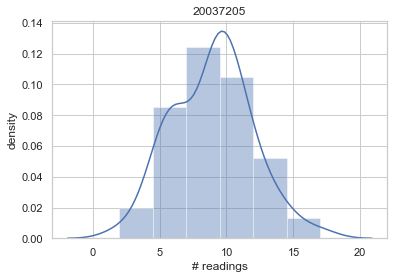

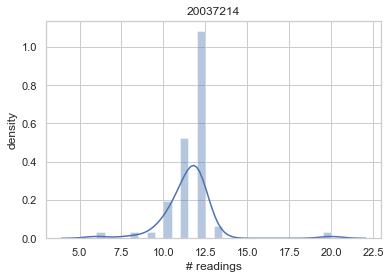

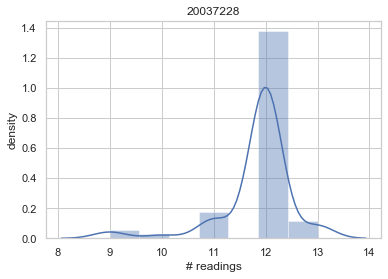

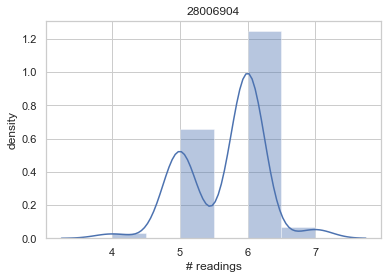

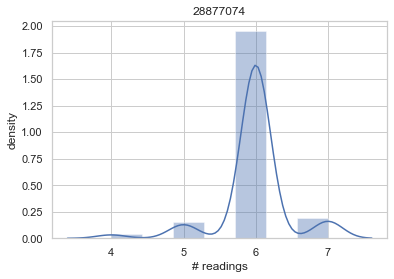

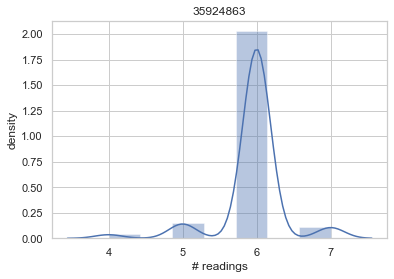

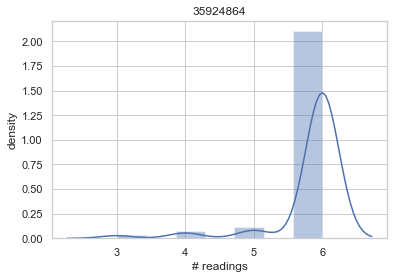

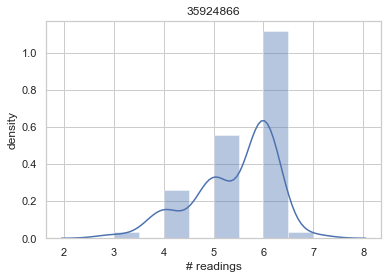

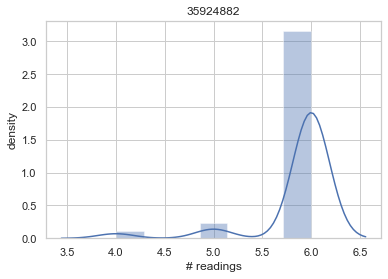

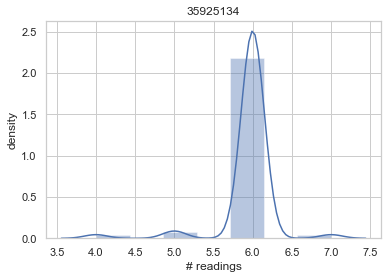

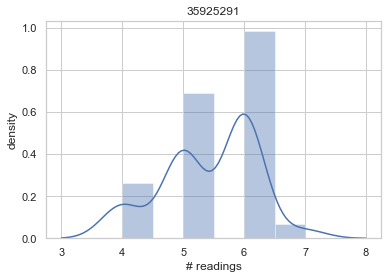

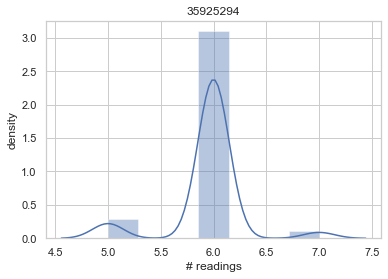

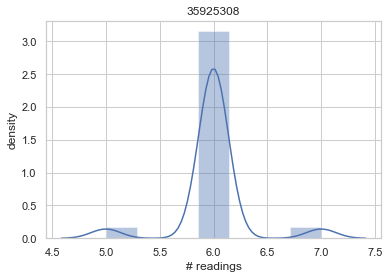

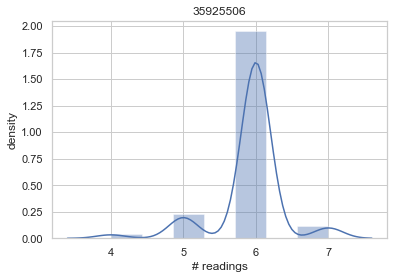

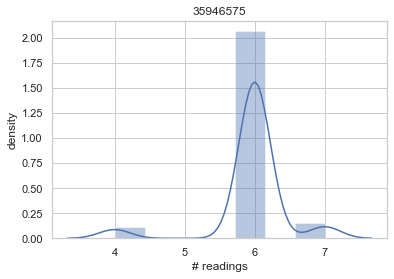

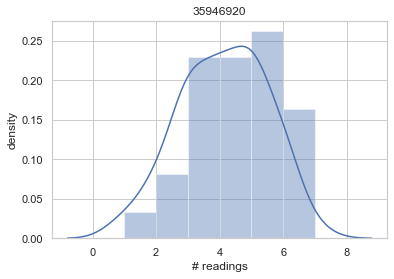

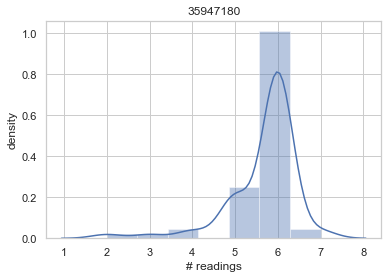

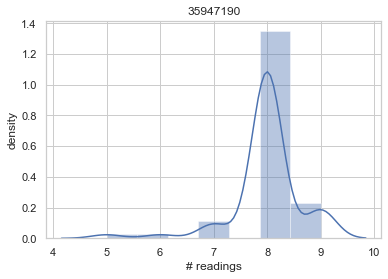

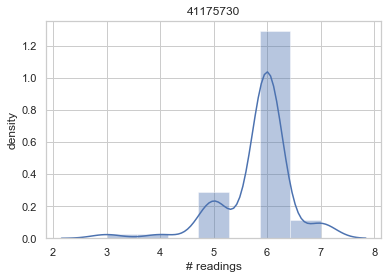

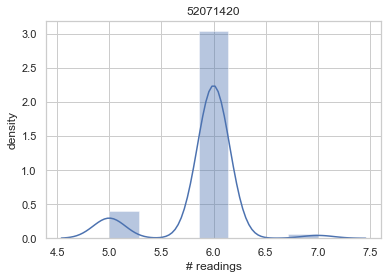

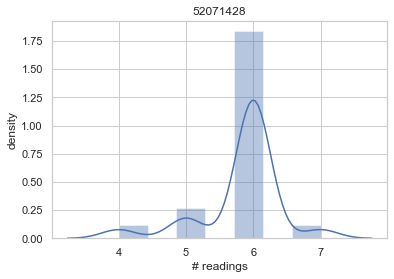

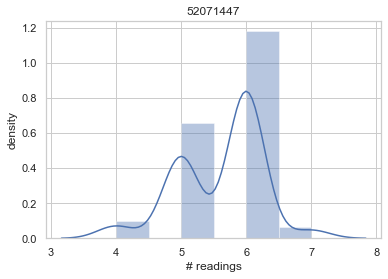

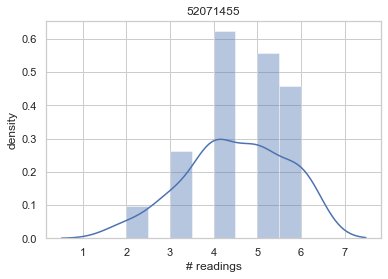

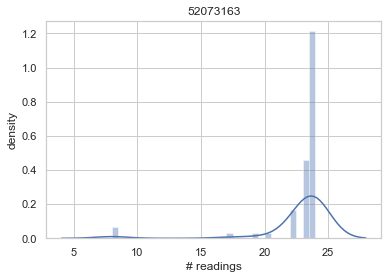

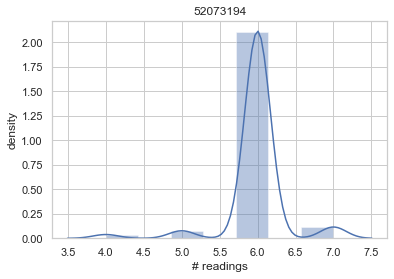

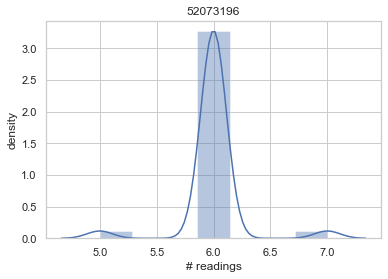

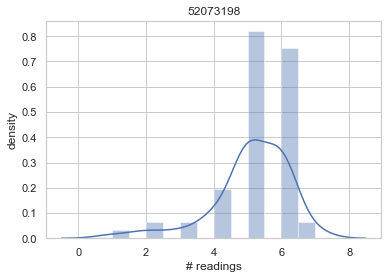

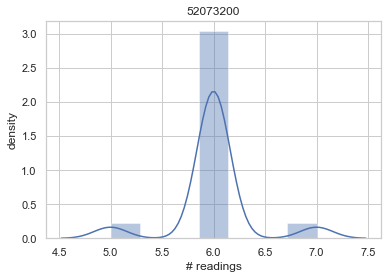

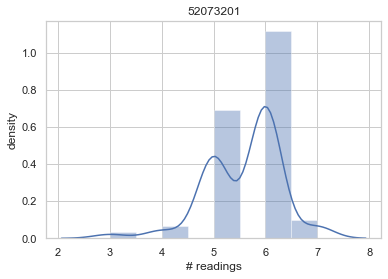

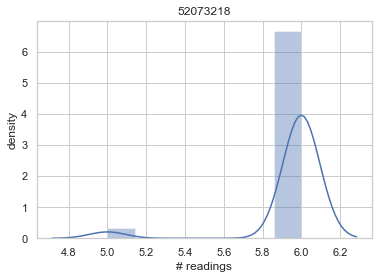

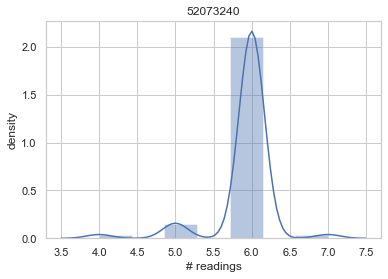

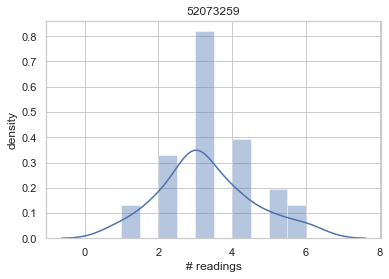

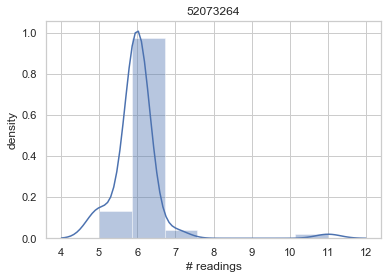

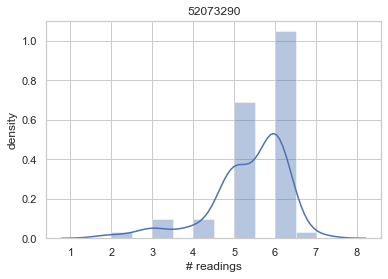

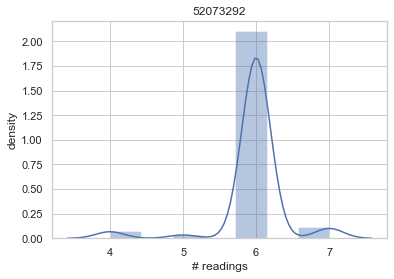

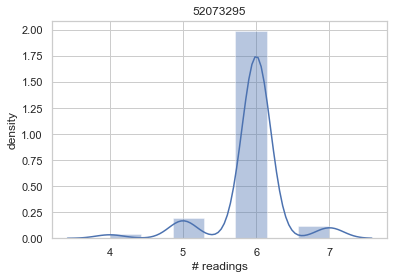

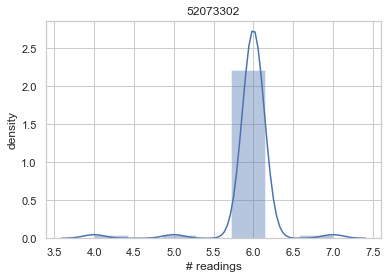

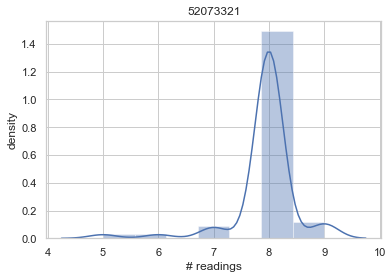

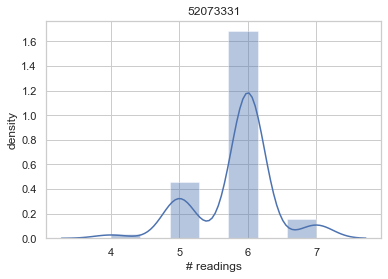

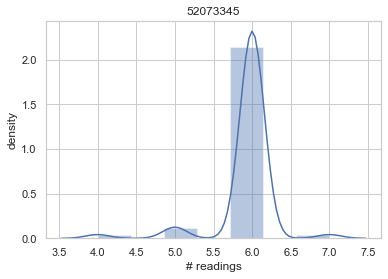

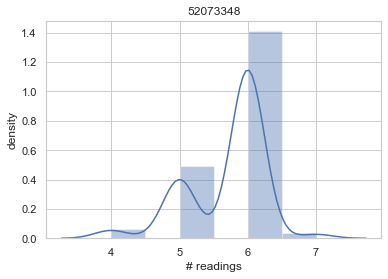

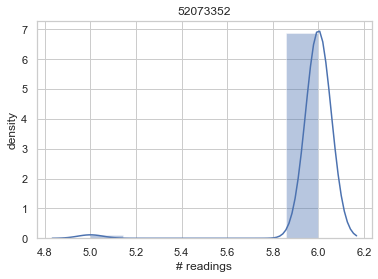

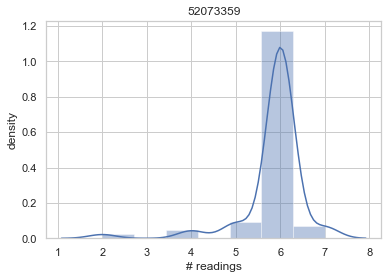

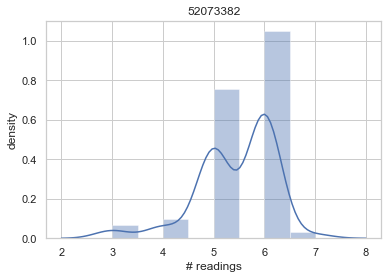

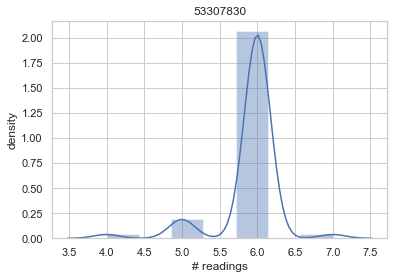

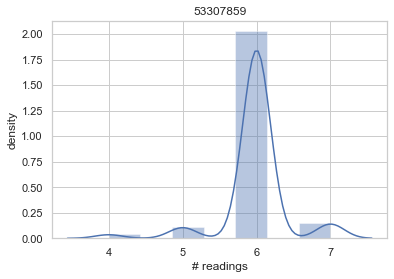

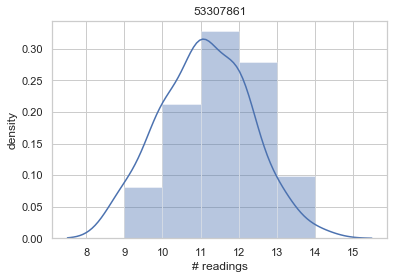

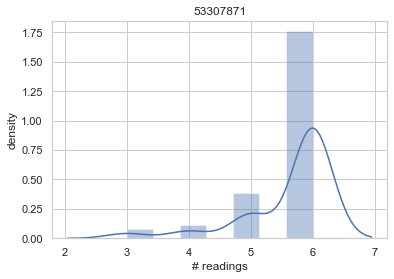

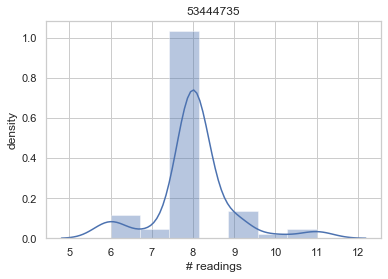

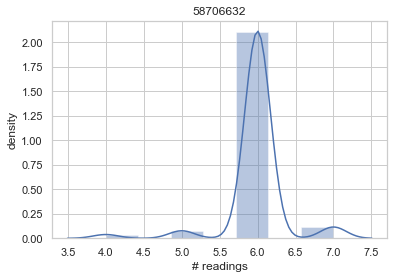

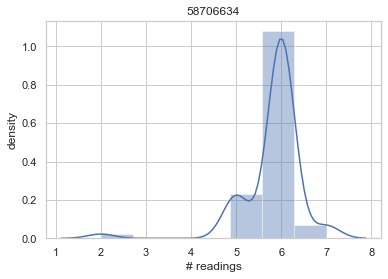

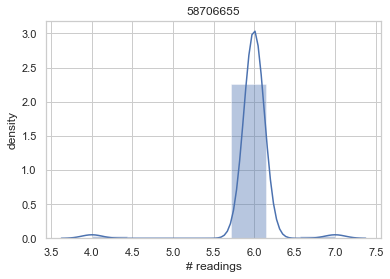

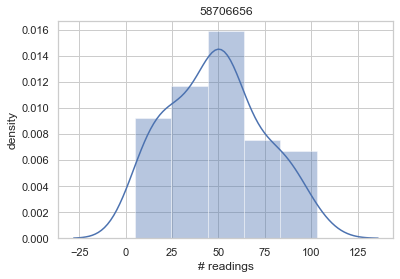

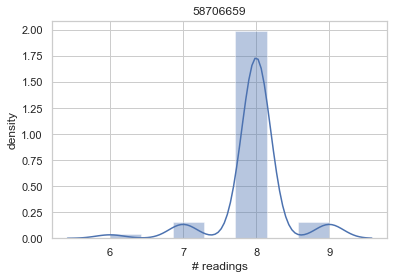

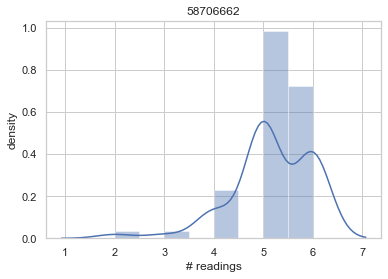

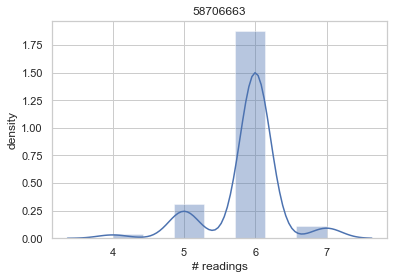

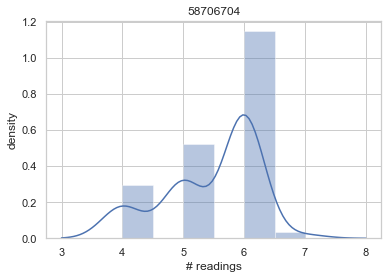

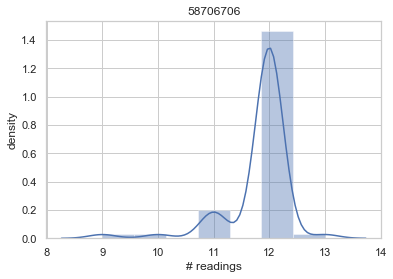

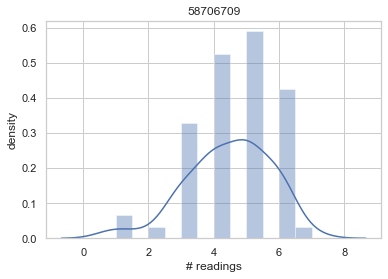

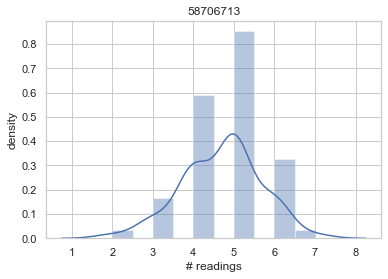

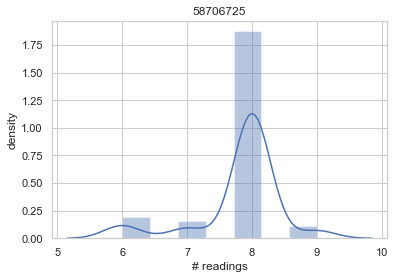

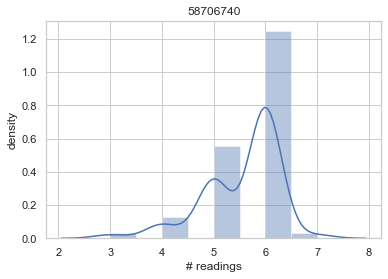

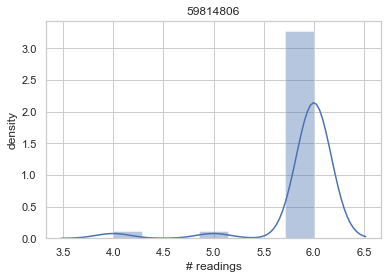

In [10]:
with PdfPages(dir_export +"Frequency number of readings barplot _windows.pdf") as pdf:
    for n, g in df.groupby("medidor"):
        #g["fecha"] = pd.to_datetime(g["fecha"])
        g.set_index("fecha", inplace = True)
        g = g.resample("D").count()
        figure = plt.figure()
#         data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAYQAAAEXCAYAAACtTzM+AAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADh0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uMy4xLjAsIGh0dHA6Ly9tYXRwbG90bGliLm9yZy+17YcXAAAgAElEQVR4nO3deXxU9b3/8dfMZN+AhGwECCDyVQyiBAFxbdXaWuvVn9tV216rFr217b3W9ra9atW6tHbx2kVb666V1lZbd22rokXZJCgY0S+yExIIECD7ZLbfH2ewETFMwpycJPN+Ph48yMw5c87nZJn3fM/3fL/HF4vFEBER8XtdgIiIDAwKBBERARQIIiISp0AQERFAgSAiInEKBBERASDN6wJE+psxxgc8CLxjrf1Z/LntQF231X5qrX3UGFMMPAxUAlFgjrV2Qfw1XwS+A8SAduCb1tqlxphM4JfAp4FW4BngBmtt1BgzFbgLGAY0A9daa18xxnwZ+Fa3/Q8DRgOjrbVbu9X+F6DeWvv1pH5TRFAgSIoxxhwK3AnMBN6JP2eAJmvtEft4yZ3AfGvt54wxRwDPGWMOBsYAPwWmWWsbjDGnAX8BxgL/ixMgU4Ag8Dvga8CvgaeAG621DxhjyoDXjDEnWGsfxgkejDHpwD+BH+8VBv8DHAc8ltRvikicThlJqrkSuBf4c7fnZgMRY8x8Y8wKY8wPjDEBY0wacDpwD4C19m3gA+CzOG/0l1lrG+LbWAqUGWMygGrgj9baTmttDHgSOMcYMxInSB6Ob28LsCK+ve6+CzRaa+/e84Qx5sT4er9N0vdB5GMUCJJSrLVft9bO3evpNOAlnDfc44FTgW8AIwG/tXZbt3XrcE7jrLfWPgcfnoK6HXjaWtsFLAbON8bkxQPiQqDcWrsdWAf8R/x1E3A+8Zfv2Xg8NK4Grur23CjgF8BFQCQp3wiRfdApI0l51tp7uj82xtwOfBP4E07/QHc+ur0pG2NycfojxvCvT/q3AbcCC4GdOKd4Do8vOwP4mTHmKmA58BzQ1W37c4CnrLVr49tPB/4AXBU/NXUghyrSI7UQJOUZY75kjDm821M+IAQ0Aj5jTGG3ZaOIdz4bY8YCC3AC4lPW2l3xdQqBn1trp1hrj8cJhdXxZX7gjPiyL+IEyepu2z8feKDb4+nABOB2Y8zbwBU4rY97D/S4RfamFoIIVAFnG2POBjKArwOPWmvDxpjncD61/zgeGpOBV40x+cCrwEPW2hv32t4ZwOnGmH8DcnFO/9wWX/Y7nNNLjxtjZgOH4ZyuwhgzApiIEzIAWGsX4oQG8XVuAEbqKiNxgwJBBG7EuQLoHSAdp8N5zyfwrwH3GmNqcU4ffclau9sY832cK4nOMsac1W1bJwH341zFVAsEgHustY/Hl8+Jb+96nEtSz7DWtsWXTQQarLUhl45TpEc+TX8tIiKgPgQREYlTIIiICKBAEBGROAWCiIgAg/Qqo5qamkzgKKABjdwUEUlUAGdk/JvV1dXBvRcOykDACYP5XhchIjJIHQe8vveTgzUQGgAmTZpERkZGjyvW1tZSVVXVL0V5JRWOEVLjOFPhGCE1jnMgHmNXVxerVq2C+Hvo3gZrIEQAMjIyyMzM3O/Kiawz2KXCMUJqHGcqHCOkxnEO4GPc56l2VwPBGHMhcC3O6M87rLV37rX8euASnLlewBnReSciItLvXAsEY0wFcAvO3PBBYIExZp61dmW31aYD/x6fr0VERDzk5mWnJwOvWGub4nO1PA6cs9c604H/jd+U5NfGmCwX6xERkR64GQij+GjHRQPOPWIBMMbkAW/h3JN2GjAcuM7FekREpAdu9iH4+ejNRXw4NykHwFrbCpy257Ex5uc4s0Rek+gOamtrE1qvpqYm0U0OWqlwjJAax5kKxwipcZyD7RjdDIQ6nGtd9ygD6vc8iN9c5GRr7f3xp/bclCRhVVVV++3Fr6mpobq6ujebHXRS4RghNY4zFY4RUuM4B+IxBoPBHj9IuxkILwE3GGOKgTbgbJy54PfoAH5ijJkHrMe5+flfXaxHRER64FogWGs3G2OuAebh3IXqXmvtEmPM88APrLVLjTGXA8/El78O/NytekRk4MjKHU5jU3u/7S87K438nJ4HsYrL4xCstXOBuXs9d1q3r58AnnCzBhEZeMJRWGYb+21/00yJAiEBmu1UREQABYKIiMQpEEREBFAgiIhInAJBREQABYKIiMQpEEREBFAgiIhInAJBREQABYKIiMQpEEREBFAgiIhInAJBREQABYKIiMQpEEREBFAgiIhInAJBREQABYKIiMQpEEREBFAgiIhInAJBREQABYKIiMQpEEREBFAgiIhInAJBREQABYKIiMQpEEREBFAgiIhInAJBREQABYKIiMQpEEREBFAgiIhInAJBREQAlwPBGHOhMWalMeYDY8yVPaz3eWPMOjdrERGRnrkWCMaYCuAW4FjgCGCOMWbyPtYrBX4G+NyqRURE9s/NFsLJwCvW2iZrbRvwOHDOPta7F7jRxTpERCQBbgbCKKCh2+MGYHT3FYwx3wSWAYtcrENERBKQ5uK2/UCs22MfEN3zwBhTBZwNnMReQZGo2trahNarqanpy+YHlVQ4RkiN40yFY0zLHs6GjRv6bX/lwyJsWrer3/a3x2D7WboZCHXAcd0elwH13R6fC5QDS4EMYJQxZr61tvtrelRVVUVmZmaP69TU1FBdXZ1w0YNRKhwjpMZxpsIxAixfuYbKsZX9tr/yshJKCg/qt/3BwPxZBoPBHj9IuxkILwE3GGOKgTac1sCcPQuttdcD1wMYY8YBr/YmDEREJLlc60Ow1m4GrgHmAW8Dc621S4wxzxtjpru1XxER6Rs3WwhYa+cCc/d67rR9rLceGOdmLSIi0jONVBYREUCBICIicQoEEREBFAgiIhKnQBAREUCBICIicQoEEREBFAgiIhKnQBAREUCBICIicQoEEREBXJ7LSERSUyQS5al/rqV+eyuhcJRwJMqnqscw/dBSr0uTHigQRCSpgqEIP31kKYvf3cLw/Ewy0vx0haK8vryeqy+cxvFH9ul+WNIPFAgikjStHSFuvn8xK9ft4IqzpvD5YycA0N4Z4of3Lebnj9YQjkQpyvG4UNkn9SGISFJ0BsP8712vYzc08Z2Lpn8YBgA5WenccNkspkwcyR1/fIvla/r/dpayfwoEEUmKP/7Dsq6+mf+9eAbHHVnxseVZmWlcd+kszNgRPL+ogVA4uo+tiJcUCCJywNY3NPPka2s4ZcZYjppc9onrZaYHuPj0w2jrjPDu2h39WKEkQoEgIgckGo1x1+PLyc1O5+LTD9vv+odNKGJCeS7LbKNaCQOMAkFEDsg/lmzgvfVNXPKFwyjIzUjoNZ86soSOYJiV69RKGEgUCCLSZ81tXTz47EqqDiri09PHJPy68eW5VBTnscw2Eo6olTBQKBBEpM+emb+W1o4Ql591OD6fr1evPWpyKe2dYfUlDCAKBBHpk/bOEM+8vpZZVWWMKy/o9esrivMoL8qhdu0OYrGYCxVKbykQRKRPXly4nraOEOeeNKnP25g0dgS7WoI0NXcmrzDpMwWCiPRaVyjCX19bwxGTipk0dkSftzOhYhg+YPUmDVQbCBQIItJrL725kV0tQc47gNYBOCOYK0ryWF23W6eNBgAFgoj0SjgS5Yl5qzmkcgRVBxUd8PYmjh7OrtYgO3brtJHXFAgi0isLVzTQ2NTOuSdN6vWVRfsyoWIYPh+srtNpI68pEESkV559Yy3lRblJu7dBdmYaFcV5rK7bpdNGHlMgiEjC1m7ezcp1TZx2zHj8/gNvHewxcfRwdrd2sV2njTylQBCRhD33xjoyMwKcfFTio5IT8eFpI11t5CkFgogkpKW9i1eX1XHitNHk5SQ2Z1GisjPTGF2cx7r63UndrvSOAkFEEvLSko10hSJ8/pjxrmx/TFk+O1uCtHaEXNm+7J8CQUT2KxKN8fyCdRw2oYjxo4a5so/RJfkA1DW2uLJ92T9X76lsjLkQuBZIB+6w1t651/KzgBuBAPAmMMda2+VmTSLSe8ve38qWHe18+XOTXdvHyGFZZGUEqGts5ZDKQtf2I5/MtRaCMaYCuAU4FjgCmGOMmdxteS7wa+AUa+1hQBZwsVv1iEjfvbBwPSPyMzn68HLX9uHz+Rhdkkfd1hZdfuoRN08ZnQy8Yq1tsta2AY8D5+xZGH9unLV2qzEmBygBdrpYj4j0QePOdmre28opMytJC7h7lnl0ST5tnWF2tQRd3Y/sm5s/3VFAQ7fHDcDo7itYa0PGmM8Bm4CRwN9drEdE+uDvizcQA06dWen6vkaX5AFQ19jq+r7k49zsQ/AD3dt9PuBjt0ay1r4AFBljbgV+A1yY6A5qa2sTWq+mpibRTQ5aqXCMkBrHOZCOMRKN8dzrDUwsz2LTuvfYtC45203LHs6GjRv2uSw7w4/d0EhBRltydgaUD4uwaV3/j3EYSD/LRCQUCMaYJ4DfWGtf6sW264Djuj0uA+q7bbMQmG6t3dMqeBR4rBfbp6qqiszMzB7Xqampobq6ujebHXRS4RghNY5zoB3jghX1tHZs5t8vnEr15LKkbXf5yjVUjt13i2P8tk2srtvFmDFj8SdhriSA8rISSgoPSsq2EjXQfpYAwWCwxw/SiZ4y+gtwnTFmlTHm2/E38/15CTjJGFMc7yM4G3ix23If8HtjzNj443OB1xOsR0T6wQsL1zNyeDbVhyRn3qJEjC7JoysUZdvOjn7bpzgSCgRr7aPW2hOAM3A6f980xjxijJnRw2s2A9cA84C3gbnW2iXGmOeNMdOttTuAOcCzxpjlgAG+e4DHIyJJUr+9lbdXbeOzsyoJJHHeov2pKN7Tj6DxCP0t4T4EY4wfOBiYFH9dI3CXMeY5a+31+3qNtXYuMHev507r9vWTwJN9qFtEXPbiwg0E/D5OnjF2/ysnUU5WOkXDsti0tbVfWyaSYAvBGHMzzpVA/4Nznn+itfZq4ATg6+6VJyJeCIYivLRkA7OmlFM0LLvf919RnMfWpjYiUY1H6E+JthBKgNOstcu7P2mtbTPGXJD8skTES6+/vZmW9hCfn+3OvEX7Uz4ylxWrt7N9VwelhTme1JCKEu1UDuwdBsaYxwG6XSUkIkPE8wvWMaY0Lym3yOyLsqJcALbsSN6lp7J/PbYQjDG/ASqA44wxxd0WpQMT3CxMRLzxwaadrNq4i8vPmpKUW2T2RV52Ovk56TTsaGPqwcX7f4Ekxf5OGd0HVAFTgSe6PR8GFrlVlIh454UF68nMCPCp6uTeBKe3yopyqd/WSiwW8yyYUk2PgWCtXQosNcb8I34ZqYgMYa3tXby2rI5PTR9Dbna6p7WUFeXywaZdtLSHKMhN7g15ZN/2d8roT9ba84AXjTEf6+631h7uWmUi0u9eenMjXeEop3nUmdxdeZHTmbxlR5sCoZ/s75TRbfH/dWmpyBAXiUR5Zv5aDptQxIQKd26C0xtFw7JJC/jZsqONSWNHeF1OSujxKiNrbU38/9eATfH/84DjcUYfi8gQsejdLTTu7ODfjh8Y14v4/T7KinJo2NHudSkpI9GBaXcD3zXGHArcg3OF0f1uFiYi/eup19ZQWpjDjMPcuwlOb5UV5bJjVwdd4YjXpaSERMchVAP/CZwFPGSt/Qrg/uToItIvVm3cyXvrm/jCcRP6dd6i/SkryiEGNDapldAfEg0Ev7U2CpwCvBJ/TsMHRYaIp/+5luzMNE7p53mL9qes0Bmg1rBdgdAfEg2E1caY53FOFb1qjHkUWOFeWSLSX3bs7uD15Zv5zMxKcrK8vdR0b5kZAQoLsjRiuZ8kGghfwZm19ARrbQiYD1ziWlUi0m+emb+WWCzG6cd6f6npvpQV5bClqY1YTBPduS3R+yG04YTACGPMNGAJcIibhYmI+1rbu3h+wXqOmVrx4fxBA01ZUS5doSi7WoJelzLkJXoLzR8C38a5B8KemI6h+YxEBrVnXl9HRzDMuScd7HUpn6hkhNNduXVnOyMKsjyuZmhLdPrrL+HcA6F+v2uKyKDQ3hnimflrmDG5jPGjvB+I9klGFGSSnuansamdQyoTuXuv9FWifQibFAYiQ8uLC9fT0h7ivJMHbusAwO/zUTIih6269NR1ibYQXjbG/AR4CvjwztfW2mWuVCUirgqGIvz1tTVMPXgkZhB86i4tzObtVdsJR6KkBRL9HCu9lWggXBz//9xuz6kPQWSQemnxBna1BPnOF6u9LiUhJYU5RGMxtu/qGLCd30NBQoFgrR2Y16OJSK91BsM89tIqJo8vZMpBI70uJyGl8QFqW5vaFQguSvQqozzgx8ChOK2EHwFXW2tbXaxNRFzw9Py17GwJ8r3/OGrQ3HgmLzud3Kw0GneqH8FNiZ6M+yWwGygFOoEC4HduFSUi7mhu6+KJeR8w87AyJo/35n7JfVVamKuOZZclGghHWmuvAULW2nbgIuAI98oSETf8+eVVdAbDfOm0Q70upddKCrPZ3dpFZ1fY61KGrEQDYe+5ZwNANMm1iIiLGpvaefb1dXx6+lgqywq8LqfXSgudAWqa+dQ9iQbCP40xtwHZxphTgb8Cr7pWlYgk3SMvvofPBxeeOjhnnflwxLICwTWJBsJ3gVacfoSbce6WdrVbRYlIctWu2c6rNXWcecJBFI/I9rqcPslIDzCiIFOB4KIerzIyxszjX3MXAez5ScwGXgA+7VJdIpIk4UiU3/xlBSUjsjnv5Elel3NASkfksL6hmVgsNmiukBpM9tdC+DVwJ1APtOFcbXQ7sB1Y7W5pIpIMz8xfy8YtLcw5cwpZGYmORR2YSgtz6OyK0NLe5XUpQ1KPvx3W2icAjDHfAWbH75qGMeY5YKH75YnIgdi+q4O5f3ufoyaXMrNq4Nwrua/2dCxvbeqgIDfT42qGnkT7EEYC3eedzQcG/gQoIiksFovxuyffIRqNMefMKV6XkxSFw7IJ+H260sglibYf5wKLjTF/AXw4o5U1ME1kAHt1WR0L32ngPz4/echM9xDw+ygens1WjVh2RaJzGf3AGFMDnBR/6lvW2hfcK0tEDsS2nR3c/ZcVHDqukLNOnNjjui3tXXR09u9gr7T0LCDUp9eWFOawcl0T0WgMv18dy8mUcA+TtfYpnOmvE2aMuRC4FkgH7rDW3rnX8n8DbsRpdawDvmKt3dmbfYjIR0WjMX7x2DIi0RhXXTCNwH7eNDs6wyyzjf1UnaOiKL3Pry0pzGHF6u00NXcycvjgvIR2oHJtYnFjTAVwC3AszjQXc4wxk7stLwB+A3zeWjsVWAHc4FY9Iqni2TfWsvyD7Vx6RhXlI4fGqaLuSuMD1DTRXfK5eaeJk4FXrLVN1to24HHgnG7L04ErrbWb449XAGNdrEdkyFu1cScPPLOS6YeWcuqsSq/LccWwvAwy0wMaoOYCNy9KHgU0dHvcAMzY88BauwNnCgyMMdnA94BfuViPyJC2uzXIjx56k8JhWVx1wbQhO3DL5/NRUpitQHCBm4Hg56OjnH3sY0I8Y8wwnGBYbq19qDc7qK2tTWi9mpqa3mx2UEqFY4TUOM6+HGMkGuP387azqyXIJaeU8MH77yT82rTs4WzYWNfrfR6IiqKJbNi4oc+vzwqEqNsdZO269QQC+w++8mERNq3b1ef99dVg+311MxDqgOO6PS7DGfH8IWNMOfA34BXgqt7uoKqqiszMngen1NTUUF09OG4T2FepcIyQGsfZ12N88Nl3Wbc1yH+dfyQnz+jdmdfGpnYqdwd6vc8DVTm276e0omm7+aB+Pdn5xQn1k5SXlVBSeFCf99cXA/H3NRgM9vhB2s1AeAm4wRhTjDPtxdnAnD0LjTEB4BngT9bam12sQ2RI+9uiDTwxbzWfO3pcr8NgsCop/NfMp0Ox49wrrgWCtXazMeYaYB6QAdxrrV1ijHke+AEwBpgGpBlj9nQ2L7XWXuZWTSJDzdL3tnLXE8uZdkgJc84aGqORE5GblU5eTrquNEoyV2e6stbOxRnl3P250+JfLsXdq5xEhrQPNu3kxw+/ybjyAr77pemkBVLrz6l0RI46lpMstX6DRIaITVtb+OG9ixmWm8H1l80iJ6vvA70Gq5LCHJrbuugI6paayaJAEBlkGra3ce1vFwBww1ePprAgaz+vGJrKCnUHtWRTIIgMIo1N7Vzz2zcIhaPcdMVsxpTme12SZ4pHZOPzwdYdbV6XMmQoEEQGicadThi0d4b54eVHM668wOuSPJWeFmDksGy2qIWQNAoEkUFgy442vn/XG7S0dXHjV2cxcfRwr0saEEqLnI7laCy2/5VlvxQIIgNc/fZWvn/XG7R3hLj5imMwlbo31R5lhTmEwlF2Nnd6XcqQoEAQGcA2bW3h+3e+Tlcowq1fO4aJY9Qy6K600BmUpo7l5FAgiAxQazfv5vt3vU40Brf+5zGMHzXM65IGnGF5GWRmBNiyQ4GQDK4OTBORvrEbmrj+nkVkZ6ZxyxWzGVWc53VJA5LP56OsUAPUkkUtBJEB5t21O7ju7gXk56Rz25XHKgz2o7Qwl6bmToKhiNelDHpqIYgMIHW70nj4zwsoKsjm6gunAc7YAzcN9jfSsqL4HdSa2lN6XEYyKBBEBohl7zfy4N82UJCbyWePrmRdQzPrGppd36+pHOH6Pty0Z+bTLTsUCAdKgSAyACx9byu3PLCE4mGZfO6Yg8jO1J9mojLTAxQWZLG1SSOWD5T6EEQ8tuz9Rm59cAmV5fl85bRxCoM+KC3MYUtTOzENUDsgCgQRD71lG7n5gcWMKcnnpstnk6Mw6JOyohyCXRF2tQa9LmVQUyCIeOSd1du5+f7FjC7J46YrZpOfk+F1SYNWeZEzQK1hu04bHQgFgogH7IYmbrp/EWUjc7np8tkU5CoMDsTw/EyyM9MUCAdIgSDSz9bV7+aGexYxPC+Lmy6fzbC8TK9LGvR8Ph/lRbnUKxAOiAJBpB/Vb2/lB79bSGZGgJuumJ2yN7dxw6jiXJrbumht7/K6lEFLgSDST5qaO/nB3QuJRmPcdPlsSuPXz0tylI90+hHUSug7BYJIP2jrCHHDPQvZ3Rrk+stmaQCVC0YOyyY9za9+hAOgQBBxWVcowi0PLGHjlha+f/EMJo0d3CODByq/X/0IB0qBIOKiaDTG7XOX8c6a7fz3BdOYZkq8LmlIKx/pTHTXGQx7XcqgpEAQcdF9z9Tyxop6LvnCYZw4bbTX5Qx5o+L9CA071EroCwWCiEuefG01T/9zLWccN4EzTzjI63JSQklhDn6/j/ptCoS+UCCIuGD+25u57+l3OebwUVx6RhU+n8/rklJCWsBPaWGO+hH6SIEgkmS1a7Zz+9xlTB5fyLcunIbfrzDoT6NG5rJtVztd4cF9nwcvKBBEkmjjlmZufmAJZUU5XHvJTDLSA16XlHJGjcwlFoMtaiX0mgJBJEmamju54d5FpKf5ueGrR2uyOo+Uj8zF7/exaWur16UMOgoEkSRo7wxx472LaGnr4vpLZ2kUsofS0wKUF+WyqbHF61IGHQWCyAEKhaP8+KE3Wd/QzHe/fBQTxwz3uqSUN7Y0nx27O2nrCHldyqCiQBA5ALFYjF//+W3eWrWNb5w7lemHlnpdkgBjSvMAqFMroVcUCCIH4JEX3uOVpZu46LOHcPKMSq/LkbiRw7PJzkxjo/oRekWBINJHT89fw59f/oBTZ1Vy/smTvC5HuvH5fIwuyWPT1hbdZ7kXXA0EY8yFxpiVxpgPjDFX9rDew8aYi92sRSSZ/vlWHfc+VcvRU8r5z7OnauDZADS2NJ+OYJgduzu9LmXQcC0QjDEVwC3AscARwBxjzOS91hlljHkGOMetOkSS7e1VjfzfH5YxeXwR376omoAGng1Ie6YY37hV/QiJcrOFcDLwirW2yVrbBjzOx9/4LwKeAv7kYh0iSbNq405ueWAJo0vyNfBsgMvNTqewIItNCoSEpbm47VFAQ7fHDcCM7itYa38KYIw5ti87qK2tTWi9mpqavmx+UEmFYwRvj7Nxd4gH/rGN7AwfZ8/Kxa5ckfR9pGUPZ8PGDUnfbk8qitI92OfEftnn8JwY67e2sqFuM5vWNbu+v70Ntr9LNwPBD3TvzfEB0WTuoKqqiszMnm9QXlNTQ3V1dTJ3O+CkwjGCt8e5tamdX/5qPtlZ6dz29eMoK8p1ZT/LV66hcmz/Xq2Ul5fX7/sE+mWfvoxm1m5ZR3NnJifN6N/fnYH4dxkMBnv8IO3mKaM6oLzb4zKg3sX9ibiiqbmT6367gK5QhB/Ome1aGEjyjSrOIz3NzzLb6HUpg4KbLYSXgBuMMcVAG3A2MMfF/Ykk3e7WINfdvYCdLZ3cdMVsKssLvC5JeiEt4GdceQFvrWokEo3pAoD9cK2FYK3dDFwDzAPeBuZaa5cYY543xkx3a78iydLWEeL6exayZXsb1106k0MqC70uSfpgQsUwWtpDrFy7w+tSBjw3WwhYa+cCc/d67rR9rHexm3WI9FZHMMyN9y5ifX0z13xlBodPLPa6JOmjyrJ8MtL8LFhRz5SJI70uZ0DTSGWRvQRDEW6+fzF2QxPf/mI1R00u87okOQDpaQGqDhrJgncaiEY1arknCgSRbkLhCLc+sIR31mznqgumcezUCq9LkiSYZkpoau5k1aadXpcyoLl6ykhkMAmFo9z28FKW2Ua+ed4RVB9aSmNTe7/WkJaeBWjK5mSbevBI0gI+FqxoUF9QDxQIIkA4EuUnj7zJ4ne38J9nH84pMytpbGrv98sVK4rS+3V/qSInK52pBxezYEU9Xzl9suae+gQ6ZSQpzwmDpSyq3cLlZ03htNnjvS5JXDD78FFsbWpn7ebdXpcyYCkQJKWFI1F+9mgNC99p4KtnVnH6sRO8LklcMvOwMtICPubV1HldyoClQJCUFY5E+envl/LG8nouPeMwzjjuIK9LEhcNy8tkZlU5ryzdRFco4nU5A5ICQVKS04H8JgtWNHDpGVWcecJEr0uSfvDZWZW0tHex8J2G/a+cghQIknJC4Qi3Pfwmi2q38NUzqzjzBLUMUsXhE4spLczhb4v6d3bXwUKBIF+CbsQAAA+USURBVCmlsyvMzfcvYfG7W7jirCk6TZRi/H4fp86q5J0129m8Tfdb3psCQVJGe2eIG+9dxFurGvnGeUfweXUgp6STjhqL3+/j72olfIwCQVJCS3sXP7h7ISvXNXH1hdV8Zmb/z/8vA0NhQRYzDyvj5aUbCYWTeouWQU+BIEPe9l0dfPfXr7Nm826+9+WjOGHaaK9LEo99ZmYlu1u7WKTO5Y9QIMiQtmlrC9/51Xy27+rgxjmzOHpK+f5fJEPekaaEUSNz+fMrqzThXTcKBBmyVq7bwXd/PZ9wJMqPvnaMprCWDwX8Ps4/xbCuvpnF76qVsIcCQYakeTWbuOY3C8jPyeAnXz+Og0YP97okGWBOOLKCiuJc5v7NqpUQp0CQISUajfH7F97j9rnLOHRcIT/7r+MpH6l7IMvHBQJ+zj/FsL6hmUW1aiWAAkGGkNb2Lm59cAmPvbSKU2aM5cY5R5Ofk+F1WTKAHX/kaCqKc/nD39VKAAWCDBGr63bx3//3GjXvb+WrZ1bxjfOOID1Nv97Ss4Dfx7/HWwkL3qn3uhzP6S9GBrVoNMbT89fwP7+aTyQS5UdXHssZxx2k+e4lYccdOZrKsnzue6qW9s7UvjmRAkEGrS072rjmt29wz5O1TD24mDu+daLuhiW9FvD7+Ob5R9LU3MkDz670uhxP6Y5pMuiEI1Gee2Mdv3/hPXw+H9887whOnjFWrQLps0ljR3DG8Qfx5GtrOP6ICqZMHOl1SZ5QIMigUvP+Vu59qpa6xlamHVLCledMpWREjtdlyRBw0WcPYfG7W/jVn97ml98+kayM1Ht71CkjGfBisRjLP9jGQy9v44Z7FhGNxrju0pnccNkshYEkTVZGGt847wgadrRx39PvEoul3lVHqReBMmiEwhEW1W7hqdfWYDfuJC/Lz6VnVPH5Y8brCiJxxZSDRnL2pybyxLzVVBTnptyNkxQIMqBEozFW1+1iXs0mXltWR0t7iJLCHL529uGMSNvBrBm6f4G468unTWZLUzv3P/MuxSNyOObwUV6X1G8UCOKpWCzGtp0dvL+hiWW2kZr3GtnVGiQt4OfoKeWcfNRYpk4qJuD3UVPT5HW5kgL8fh9XXTCNpt2d3P5oDYX5WRw6PjWuXlMgSL8IhaM0NXeyfVcH9dtaqWtsZVNjC6s37WJnSxCA3Ox0qk0JR00upfrQUo0yFs9kpge45isz+M6v5nPd7xbw7YuqmVU19GfKVSCkkFgsRigcJRiK0BWK0BWK0hWOEApHCUeihMJRIpEo4UiMaDRGOBIlEo0RicaIRp3nI9EY0UiUcDT24bpd4QjhcJSucJTOYJjOrggdwTBtHSFa2rtoae9id2vXR2pJC/gZVZzL1EnFHFJZiKkcwfjyAgIB9Q3IwDAsL5PbrjyWm+5fzK0PLuErpx/GmScM7UGPCoRBLByJOp+4m9Opn7+GXa1d7G4N0toeorW9i9aOEB3B8If/gqEIbl04kRbwk57mJzM9QGZGgMz0ALnZ6ZQV5XJQxTCG52cyIj+L4fmZlBbmMHJYNn7/R/+wduzu7HEfBSPKaWxqd+cA9iEYivTbvmRgGlGQxa1fO4Y7/vAW9z/zLmvrd3PZGVUMy8v0ujRXKBAGuGg0RuPOducUy9YWNm9rpWF7G/Xb22ja3cHe83EF/D6yM9PIygyQlZFGdmYaw/IySU/zk5HmJy3NT1rgX/8CAR8Bv/PP7/fh98X/7/61z4fPx0e+NpUjWLN5N4H4Ool+agqFo9Q1OqeMequiKJ01trHXr+srUzmi3/YlA1dWRhr/86XpPPYPy2MvraLmvUYu+cJkPj197Mc+1Ax2CoQBpLW9i3X1zayr3836hmbWNzSzcWsLwa5/fVLNz8lgVHEuVQcVUVqYQ8mIHFqadxGMZpKTlUZmeqBfmrQ5WelkpAVc34/IQOD3+7jg1EOYffgo7npiOb947G2eX7Ces06cyOwp5UPmVKcCwQORSJT67W1s2NL8YQCsq29m+66OD9cpyM1gXHkBp86sZGxZPqNL8hlTmk9B7sc7WpevDNOwW2/OIm6rLC/gR187lleWbuRPL3/ATx5ZSvGIbD47axzHTB1FRXGe1yUeEFcDwRhzIXAtkA7cYa29c6/lRwD3AgXAP4ErrLVhN2vqTx3BMFt2tFG/rY1NjS3UbXVO+2xqbCEUjgLOJ4/RJXlMHl/IhFHDGD9qGONGFTAiP3NId16JDFZ+v4+TZ1TyqeljeXPlFp765xoeeeE9HnnhPcaU5jNjcimHjiuks3Pw9UG5FgjGmArgFqAaCAILjDHzrLXdpxP8PXCZtXaRMeY+4KvAb9yqKVlC4Wi3q2eC7GwOsrMlyI7dHWzb1cH2XR1sbWpnV/xyyj1KRmQzuiSfqZOKGVeez9iyAsaW5pORrk/3IoNNwO9jVlU5s6rKadzZzuLaLSyqbeDJ19bwxLzVADw87++MLs1ndEkeFcV5jByWTeGwLIoKssjPzSBtgJ1qcrOFcDLwirW2CcAY8zhwDvDD+ONKINtauyi+/oPAjSQWCAGArq6u/a0HQDD4rzfmrnCEV2vqaG3vIhqLEY06HbfhaJRoNBa/9DJGKOJcktkVitLVFaazK0pnV4iOoHPJ5r6kB/wf/rAPriihpDCHkhHZFI/Ioawol8x9vPHHomGCwQNrFMWikX6flCoSDuGnfz8BxaK+ft1nKhwjpMZxhkNdBIPuffAalhPgMzMq+MyMCrrCETY0NPNGjaUrlkvDjjYWrajb5/tGVmYaudnpZGcEyMxIIzPduVIvPS1Aeppz0Uea308g4Mfvd1onAb+PYw4fRXEf5vHq9p65z2+Gm4EwCuh+o9IGYMZ+lo9OcNvlAKtWrUpo5dra2o8Wlgv0eJtdH87360B+gWJAG0TaaNkOLdsPYFMJKOrnMVy7t+3q932G2vr3OFPhGCE1jrOhbhcNdf23P4DpE+P9CQfnAX3pW4jF/0U/tmTr5rVs3XwAxTnvoWv2ftLNQPDjHM0ePj56ZPtb3pM3geNwQmTwnagTEfFGACcM3tzXQjcDoQ7nTXuPMqB+r+XlPSz/RNXV1UHg9QMtUEQkBX2sZbCHm6eeXwJOMsYUG2NygLOBF/cstNZuADqNMcfEn/oS8IKL9YiISA9cCwRr7WbgGmAe8DYw11q7xBjzvDFmeny1i4D/M8a8j3OS7Zdu1SMiIj3zpeJdgURE5OMG1kWwIiLiGQWCiIgACgQREYlTIIiICJACs50aY34GjLTWXux1LclmjPkCcD3OuOu/W2v/y+OSXGGM+SLw/fjDF6y13/aynmQyxhQAC4DTrbXrjTEnA7cD2cBj1tprPS0wSfZxnHOAb+IMTl0KXG6tTWwumgFq72Ps9vzXgXOstSd6VFrChnQLwRhzEvAfXtfhBmPMBOC3wJnA4cA0Y8znvK0q+eJjWH4JnABMBY6Lv2kOesaYmTgDLCfFH2cD9wP/BhwKHDUUfqb7OM5JwHeA2Ti/u37gSs8KTIK9j7Hb85OB73lSVB8M2UAwxhTizLZ6q9e1uOQsnE+QddbaEHA+sNjjmtwQwPk9zcWZRj0d6OjxFYPHV3HeCPeM0J8BfGCtXRefBv73wLleFZdEex9nEPiatbbZWhsD3gHGelVckux9jBhjMoG7gR94VVRvDeVTRnfjDIwb43UhLpkIdBljnsb5Y3oWuM7bkpLPWttijLkOeB9oB17DaZYPetbaywCMMXueOpAJHwesvY8zPkvBhvhzxcDXgYs9Ki8p9vGzBPgRTotvnRc19cWQbCEYYy4DNllrX/a6Fhel4UwxfilwNDCTIXh6zBhzOHAJUInzhhkBhkwfwl4OZMLHQSd+z5SXgfusta96XE5SGWNOAcZaax/wupbeGJKBgHP65DPGmLdx7r9whjHm/zyuKdm2AC9Za7dZazuAv/LR6cWHilOBl621jdbaIM59M070tCL39HnCx8HGGHMITkvvIWvtTV7X44ILgMPi70H3AtONMY95XNN+DclTRtbaU/Z8bYy5GDjRWnuVdxW54lngIWPMcKAF+BzwpLcluWI58BNjTC7OKaMv8AlT9w4BiwFjjJmIc5rhQpxTDkOKMSYf+DtwjbX2Ea/rcYO19pI9XxtjTgRusNae711FiRmqLYQhz1q7GPgJzpUNK3HOyQ6q5mkirLV/B/4A1AArcDqVf+xpUS6x1nbinEt/Audn+j7wuJc1ueQyoBS42hjzdvzfD70uSjS5nYiIxKmFICIigAJBRETiFAgiIgIoEEREJE6BICIiwBAdhyDySYwxf8OZZXM9sMJaa3p+RdL22wpUASOB71lrz+mP/Yr0hloIkjKMMWnABGutBWYBS/q7BmvtUoWBDFQahyApwRjzPHAIUIAzRUQFzgjvn1tr7+y23onAL4A2IA84CvgMcC2QgTNa+tvW2oXGmFKcSRRLcaaZ2ACcZ61tNMYcB/wKZ26iN4EvApOBccCvrbVVxpgHgWZgCs4kjCuAL1trW40xpwG34czd9DbOvFXHAp3AwzgtDYDnrLVDblJD8YZaCJISrLWnAT/FCYAjgPnA2d3DoJsq4AJr7eE4M8neCpxmrT0SmAP8JT6Vxr8DC621RwMTcMLiS8aYDODPwNXx18zDueHNvlQDn8W5/8E44FxjTBHwCPDFeK3zcAIMnGmW11prpwHHAQcbY4b19fsi0p0CQVLJVOCt+NeHAe9+wnqb4lM0A5yCM+Hcy/GJyh7FmYF0orX2F8ACY8y3gLtwgiQP5xN/aM9su9baP+C0RvblRWttMH5Pi3eAQuB4YKW1dnn89Q/htCQAXgTOjrd4Lsfpj9jdy++DyD4pECQlxN9Avwz8zBhTi3OfgSXGmH3dqau129cBnNlWj9jzD6f/odYYcxvObLrbgN/hTNjmi7/Ox0eFP6G07jf7icVfF97H66MA1to3gfHx/Y2LH0P1J2xbpFcUCJIqzgPWW2urcPoD7ou/we/rlFF3L+NMpX4IQPzc/gqcU0CnAnfEZ+xsxGlNBOLLffF1McacAYzoRa1vAJPi94LAGHM2MByIGWN+DFxnrX0S+C+cVk5VL7Yt8okUCJIqjsZ5owXn3PtribzIWrsSp9/gj8aY5cBNwBnW2lac1sHPjDErgKdxZp6dGD/9cyZwU/w00//DCYyEWGubcObTf9gYswwneMI4fRR3AEfEWzlLcabJ/mOi2xbpia4yEhlgjDEFOK2YG6y17caYacBzwKj4PYhFXKFAEBmAjDE3A2cBofi/b1lr53tblQx1CgQREQHUhyAiInEKBBERARQIIiISp0AQERFAgSAiInEKBBERAeD/A9WYutqKkGvmAAAAAElFTkSuQmCC
        ax = sns.distplot(g["voltajeA"]) #any columns will work
        ax.set(xlabel='# readings', ylabel='density', title = n)
        pdf.savefig(figure)

    

### Number of readings per each day of the data: LinePLot

In [ ]:
with PdfPages(dir_export + "Number of readings per each day of the data LinePLot _windows.pdf") as pdf:
    for n, g in df.groupby("medidor"):
        #g["fecha"] = pd.to_datetime(g["fecha"])
        g.set_index("fecha", inplace = True)
        g = g.resample("D").count()
        figure = plt.figure()
        plt.title(n)
        plt.ylabel("#readings")
        plt.xlabel("days")
        g["voltajeA"].plot()
        pdf.savefig(figure)

    

### Number of readings per each day of the data: BarPLot

In [ ]:
with PdfPages(dir_export + "Number of readings per each day of the data BarPLot _windows.pdf") as pdf:
    for n, g in df.groupby("medidor"):
        #g["fecha"] = pd.to_datetime(g["fecha"])
        g.set_index("fecha", inplace = True)
        g = g.resample("D").count()
        figure = plt.figure()
        ax = sns.barplot(x = g.index, y = "voltajeA", data =g)
        ax.set(xlabel='days', ylabel='#readings', title = n)
        pdf.savefig(figure)

    

## Generating graphs of variance and std of all meters acording to the numer of readings in each day 

In [13]:
var_dict = {}
std_dict = {}
for n, g in df.groupby("medidor"):
    #g["fecha"] = pd.to_datetime(g["fecha"])
    g.set_index("fecha", inplace = True)
    g = g.resample("D").count()
    variance = g["voltajeA"].var()
    std = g["voltajeA"].std()
    var_dict[n] = variance
    std_dict[n] = std

    

In [14]:
s1 = pd.Series(var_dict)
s2 = pd.Series(std_dict)

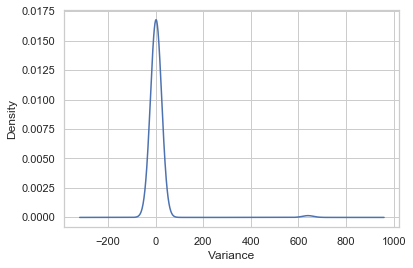

In [15]:
fig = plt.figure()
s1.plot.kde()
plt.xlabel("Variance")
plt.savefig(dir_export + "Densidad_var_numero_dias_windows.jpg")

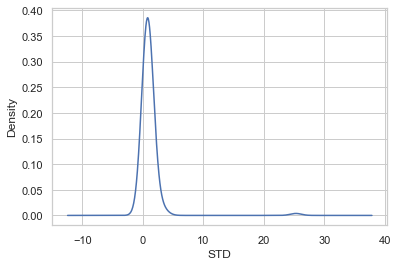

In [16]:
fig = plt.figure()
s2.plot.kde()
plt.xlabel("STD")
plt.savefig(dir_export + "Densidad_std_numero_dias_windows.jpg")

In [17]:
n = (s2 - s2.min()) / (s2.max() - s2.min())

In [18]:
quantil = s2.quantile(0.72)
meters_q = (s2[s2<quantil])

In [20]:
len(meters_q)

80

In [21]:
qqq = (s2[s2<= 1])

In [22]:
meters_q.max()

0.9815232947526394

In [23]:
meters_q.index

Int64Index([15029835, 15029844, 15029846, 15029847, 15029977, 15842885,
            15842894, 16567743, 16567746, 16567760, 16567761, 16567763,
            16951175, 16951176, 16951180, 16951181, 16951201, 16951203,
            16951205, 16951207, 16951208, 16951209, 16951216, 16951219,
            16951220, 16951221, 16951222, 20037228, 28006904, 28877074,
            35924863, 35924864, 35924866, 35924882, 35925134, 35925291,
            35925294, 35925308, 35925506, 35946575, 35947180, 35947190,
            41175730, 52071420, 52071428, 52071447, 52073194, 52073196,
            52073200, 52073201, 52073218, 52073240, 52073264, 52073290,
            52073292, 52073295, 52073302, 52073321, 52073331, 52073345,
            52073348, 52073352, 52073359, 52073382, 53307830, 53307859,
            53307871, 53444735, 58706632, 58706634, 58706655, 58706659,
            58706662, 58706663, 58706704, 58706706, 58706713, 58706725,
            58706740, 59814806],
           dtype='int64')

In [23]:
df_meters_uniform = df[df["medidor"].isin(qqq.index)]

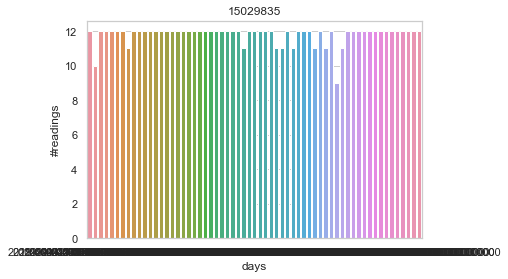

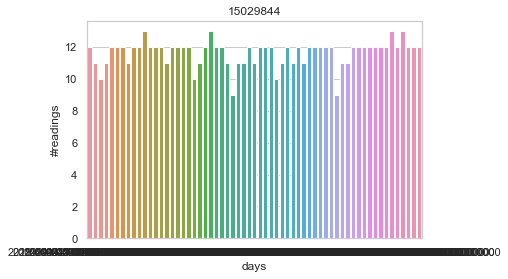

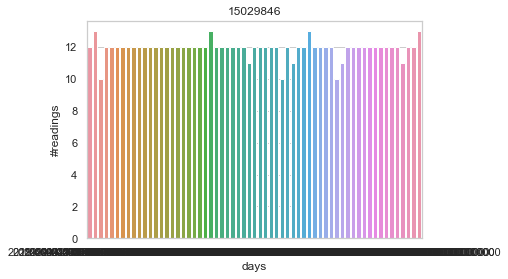

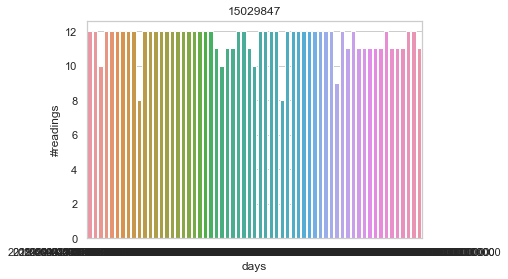

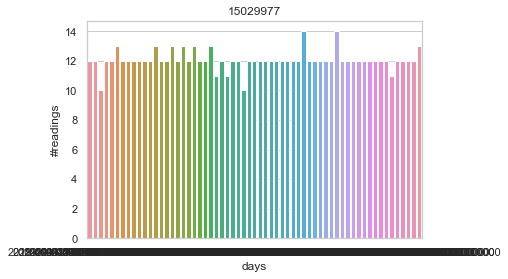

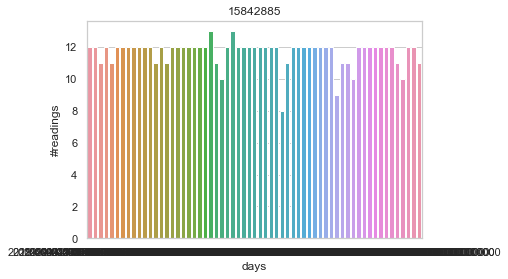

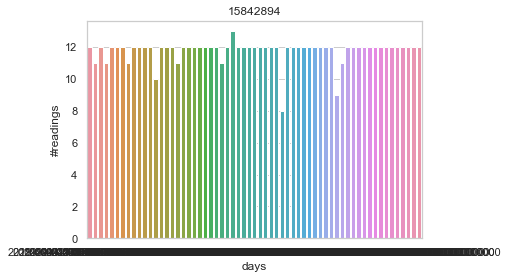

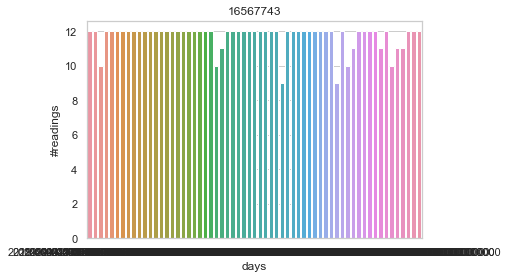

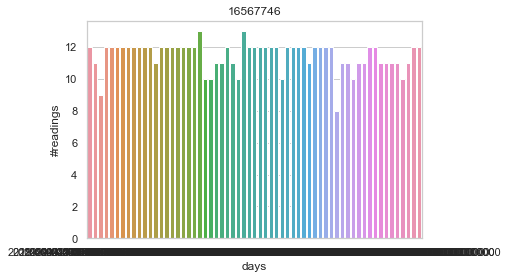

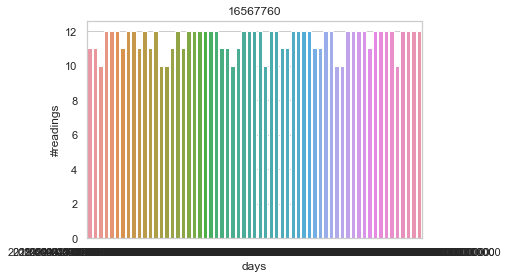

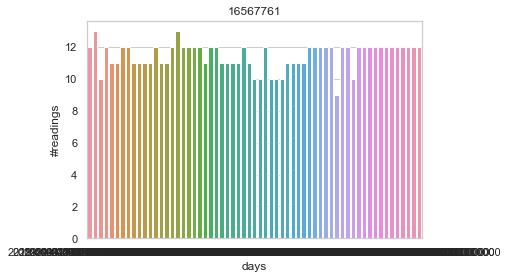

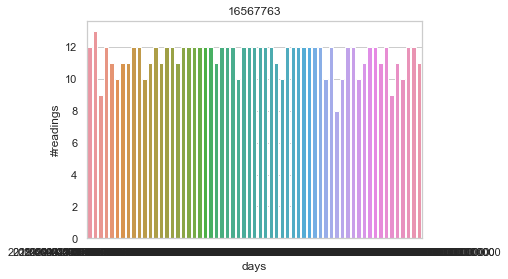

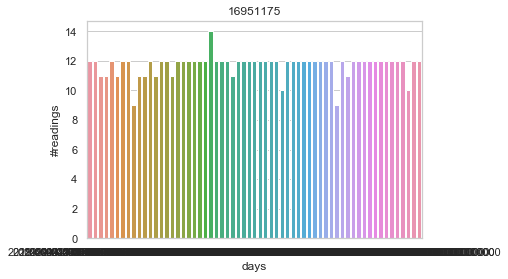

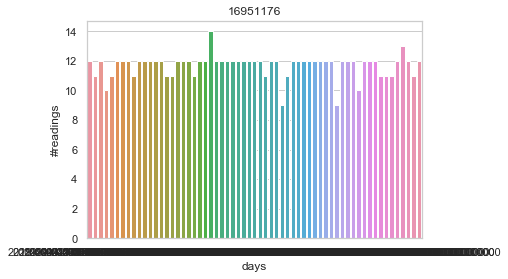

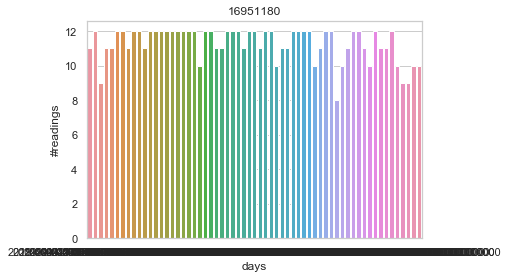

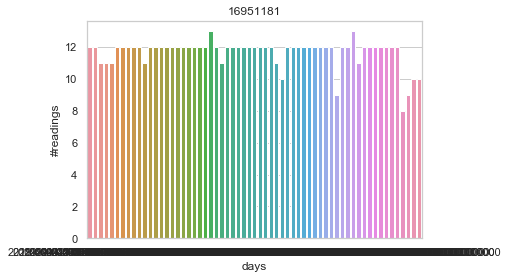

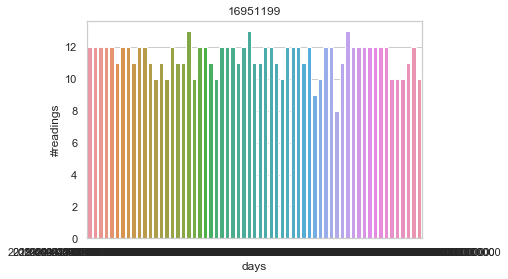

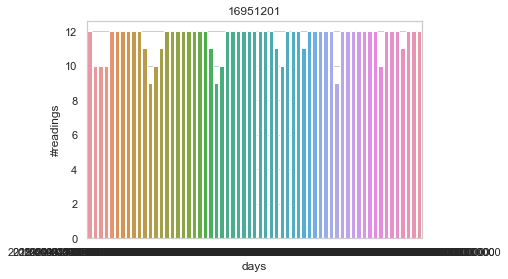

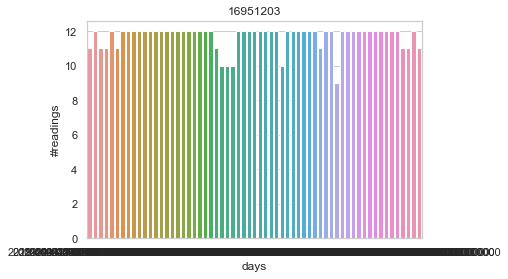

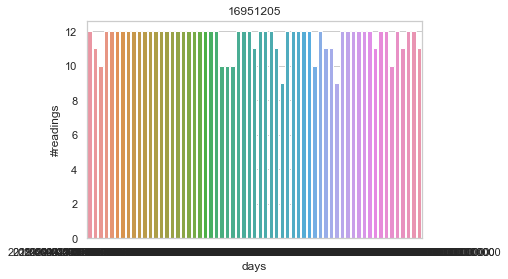

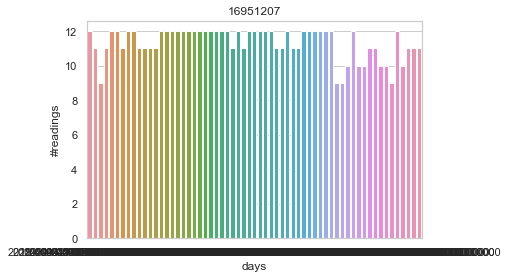

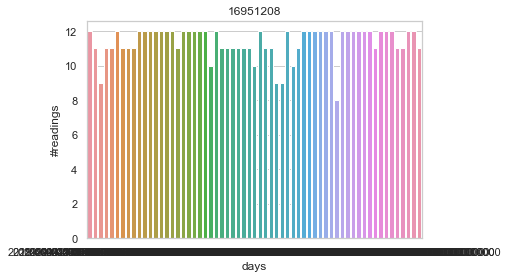

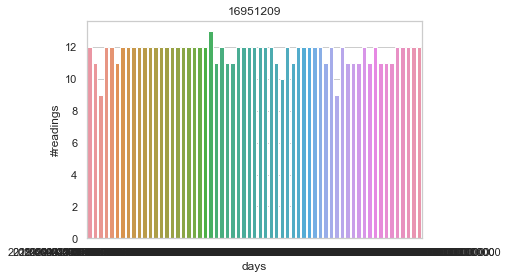

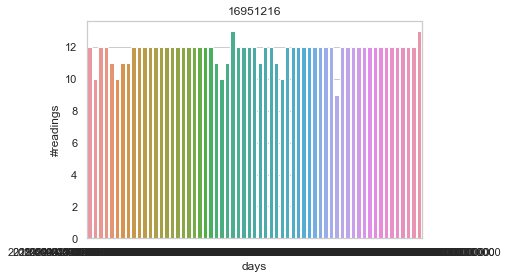

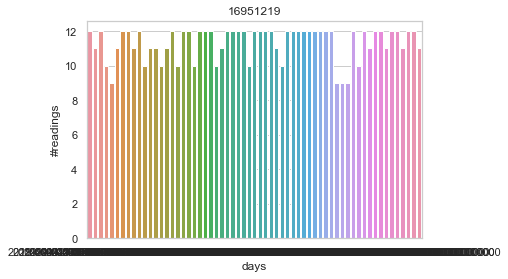

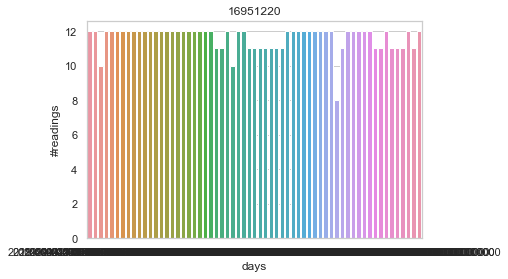

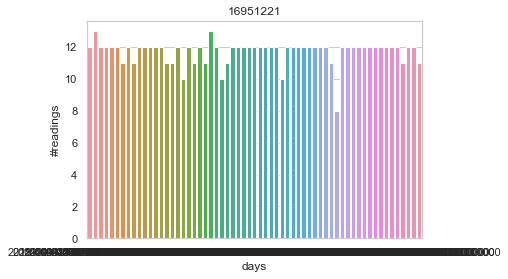

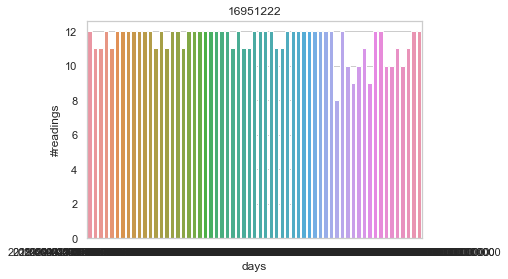

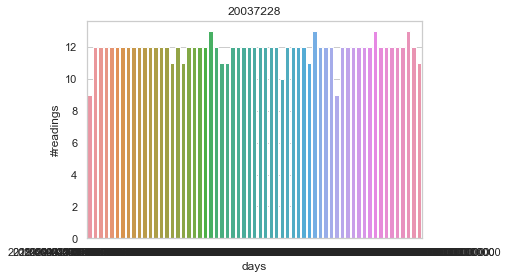

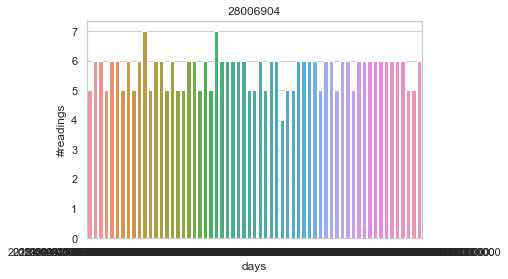

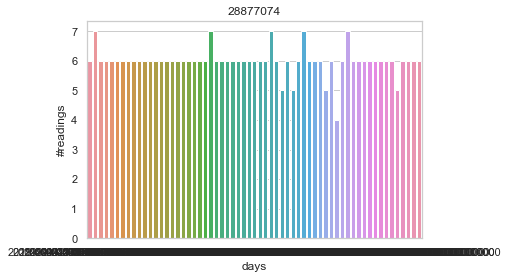

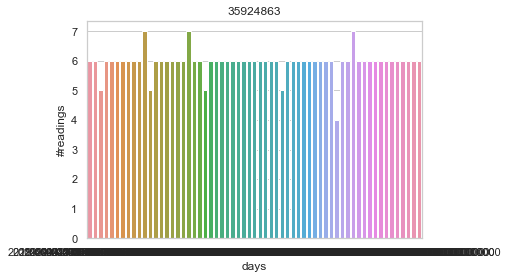

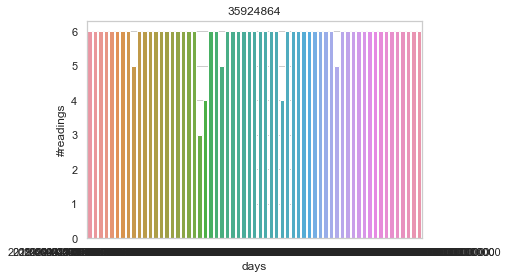

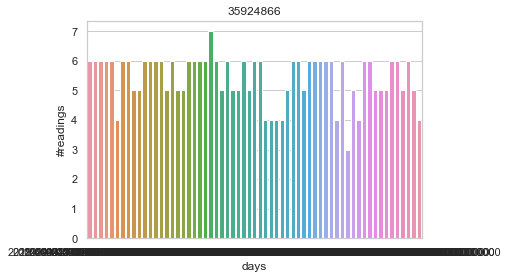

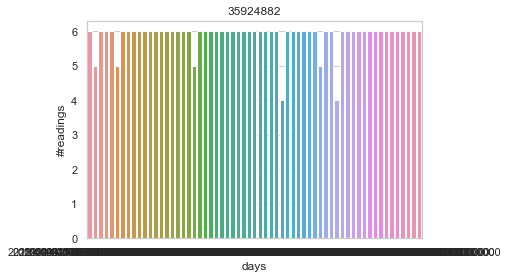

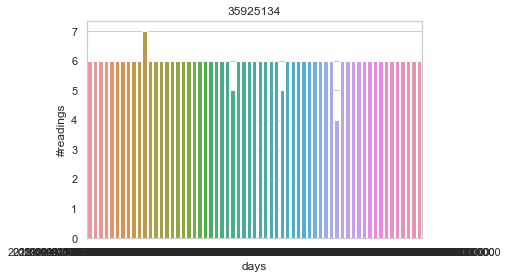

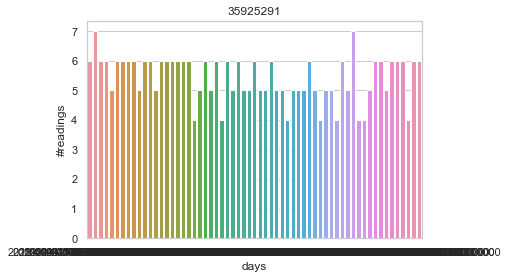

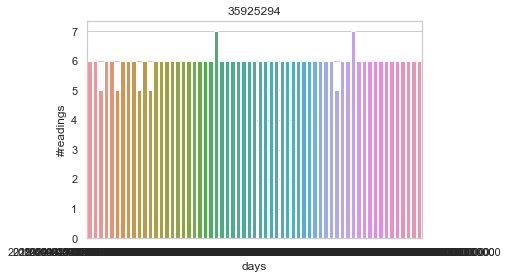

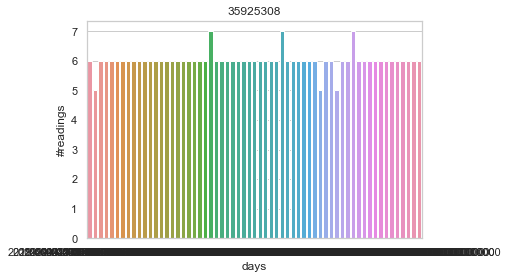

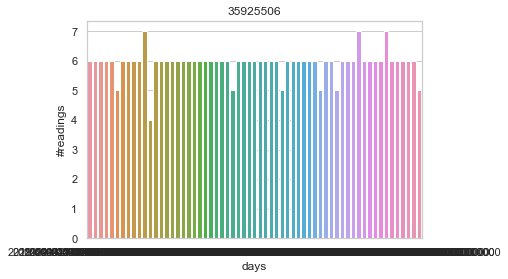

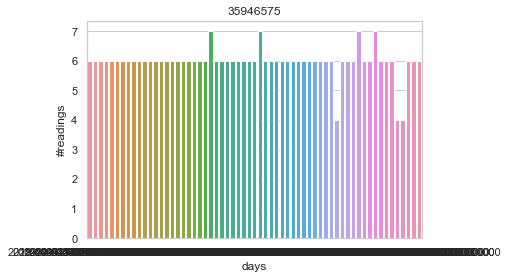

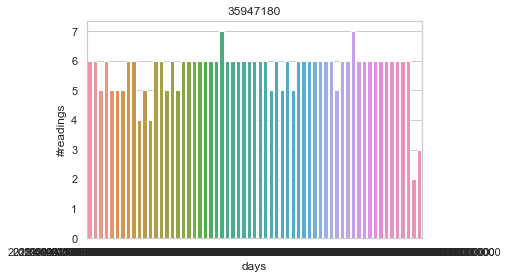

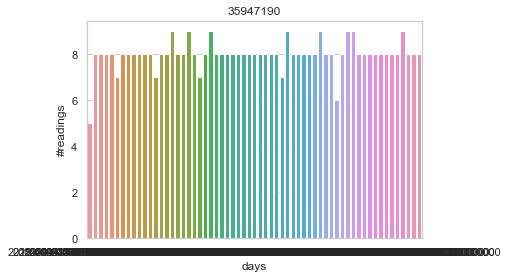

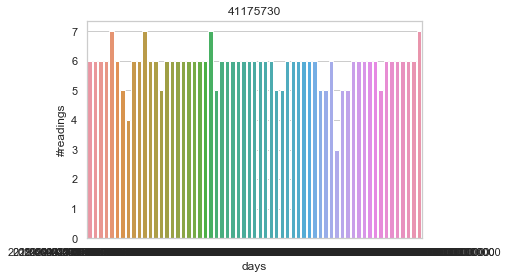

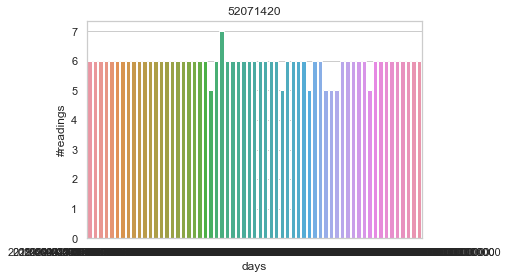

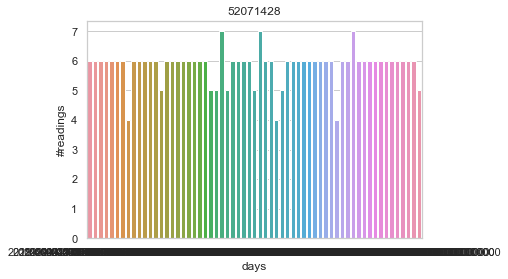

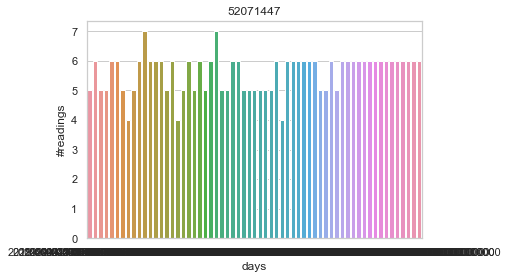

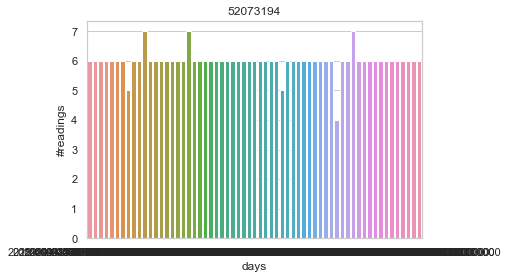

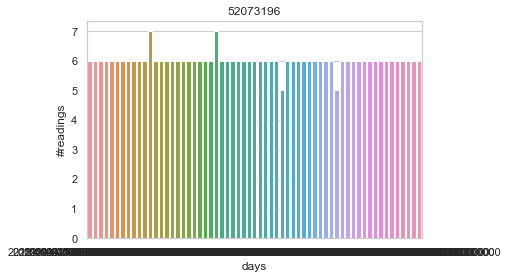

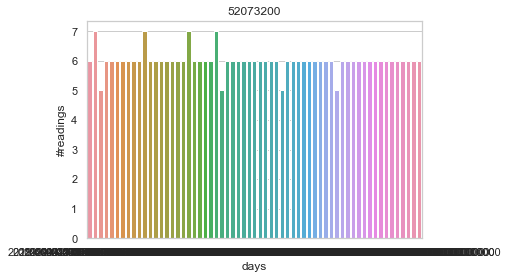

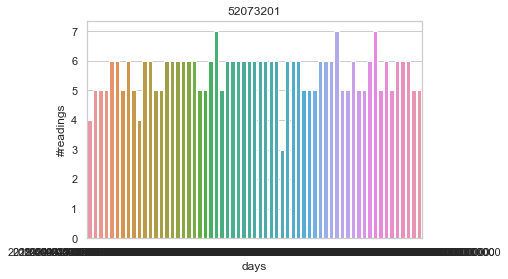

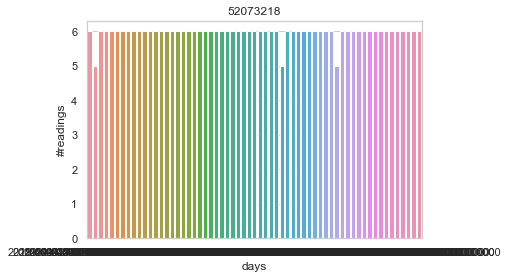

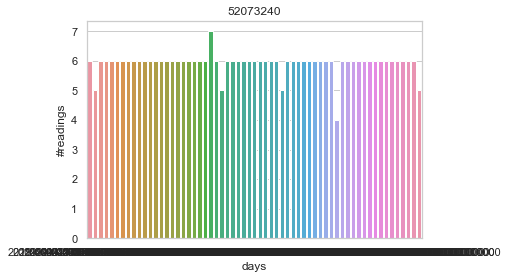

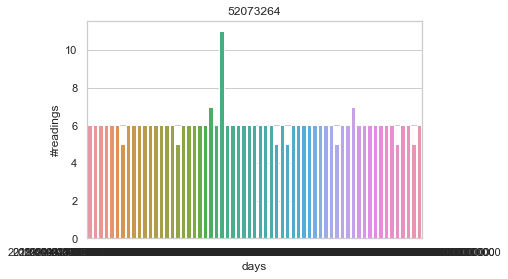

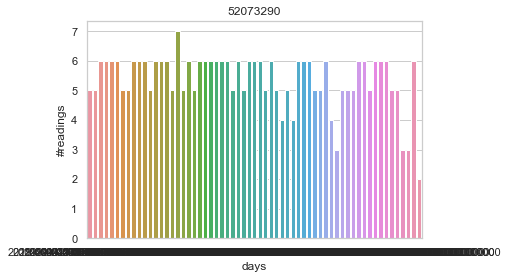

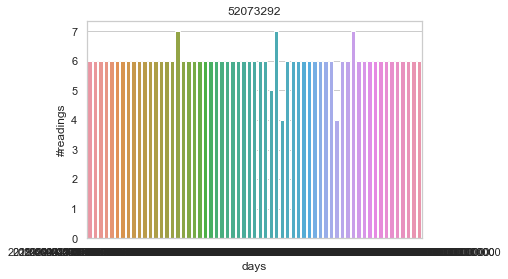

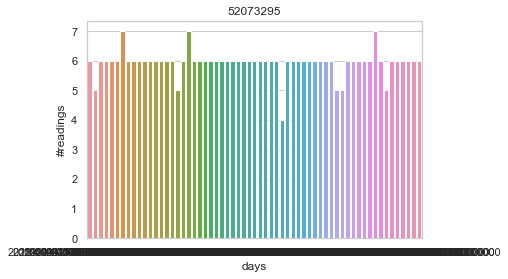

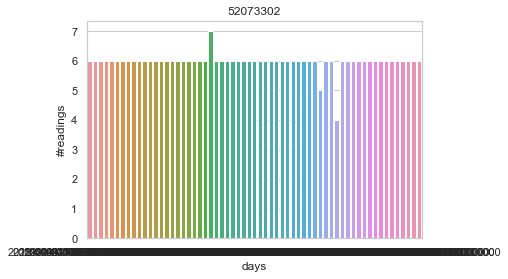

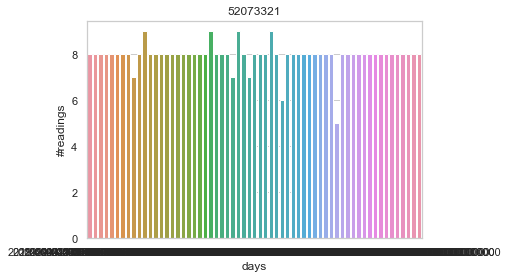

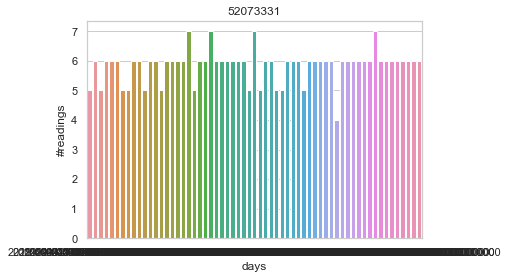

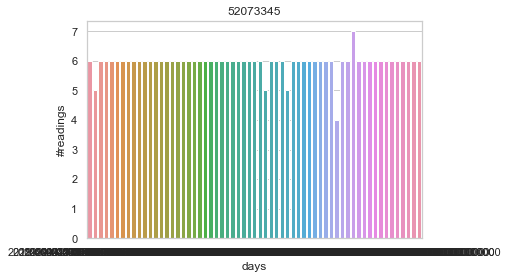

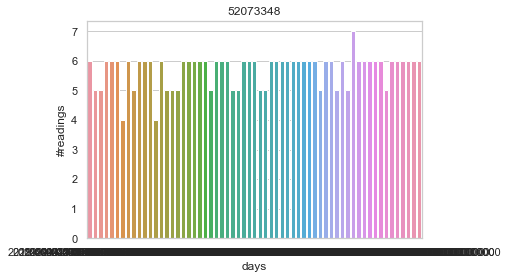

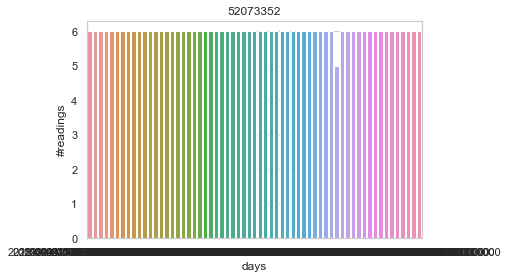

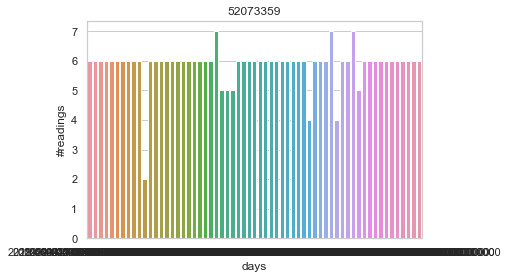

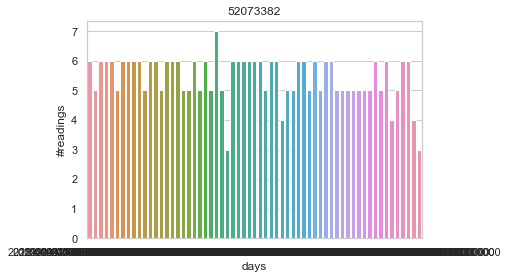

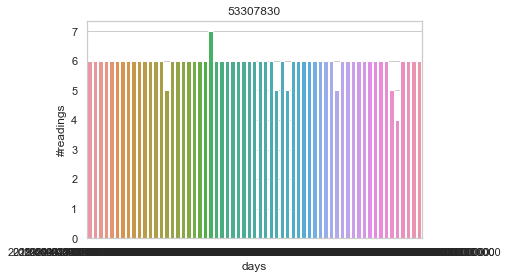

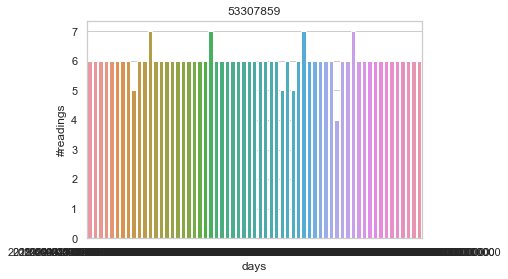

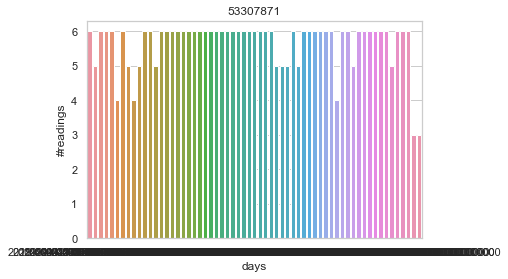

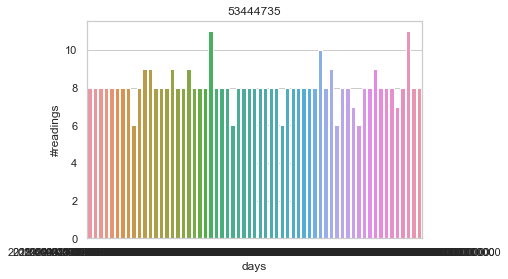

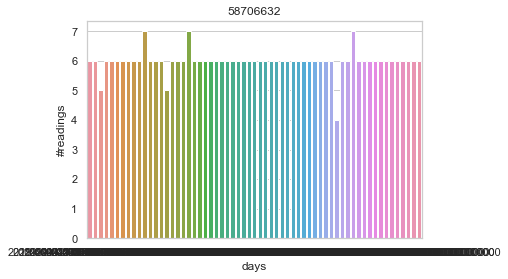

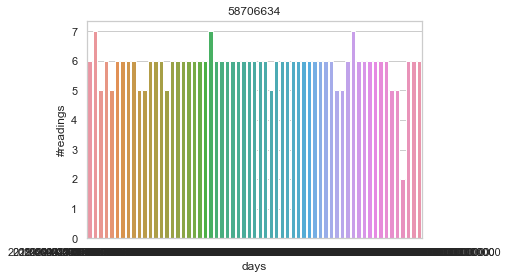

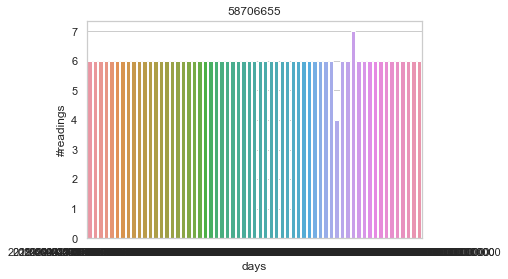

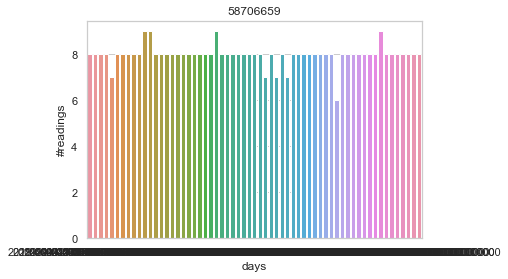

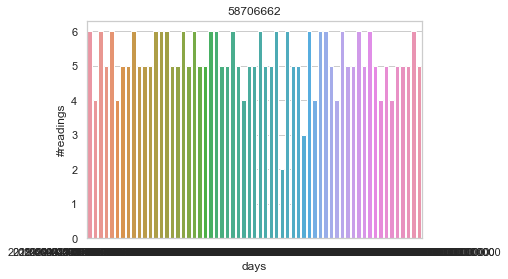

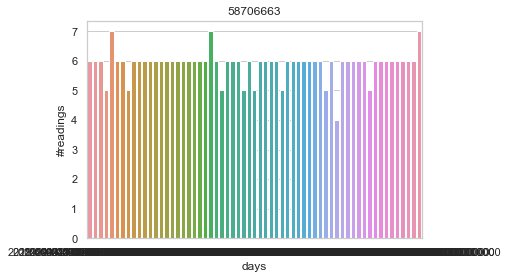

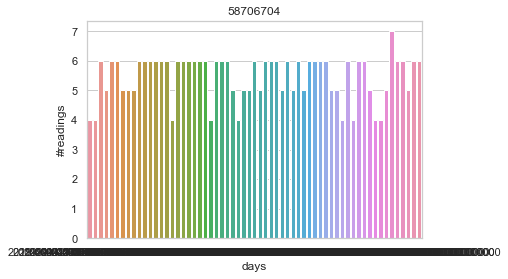

Error in callback <function flush_figures at 0x1B533C00> (for post_execute):


KeyboardInterrupt: 

In [24]:
for n,g in df_meters_uniform.groupby("medidor"):
    g.set_index("fecha", inplace = True)
    g = g.resample("D").count()
    figure = plt.figure()
    ax = sns.barplot(x = g.index, y = "voltajeA", data =g)
    ax.set(xlabel='days', ylabel='#readings', title = n)


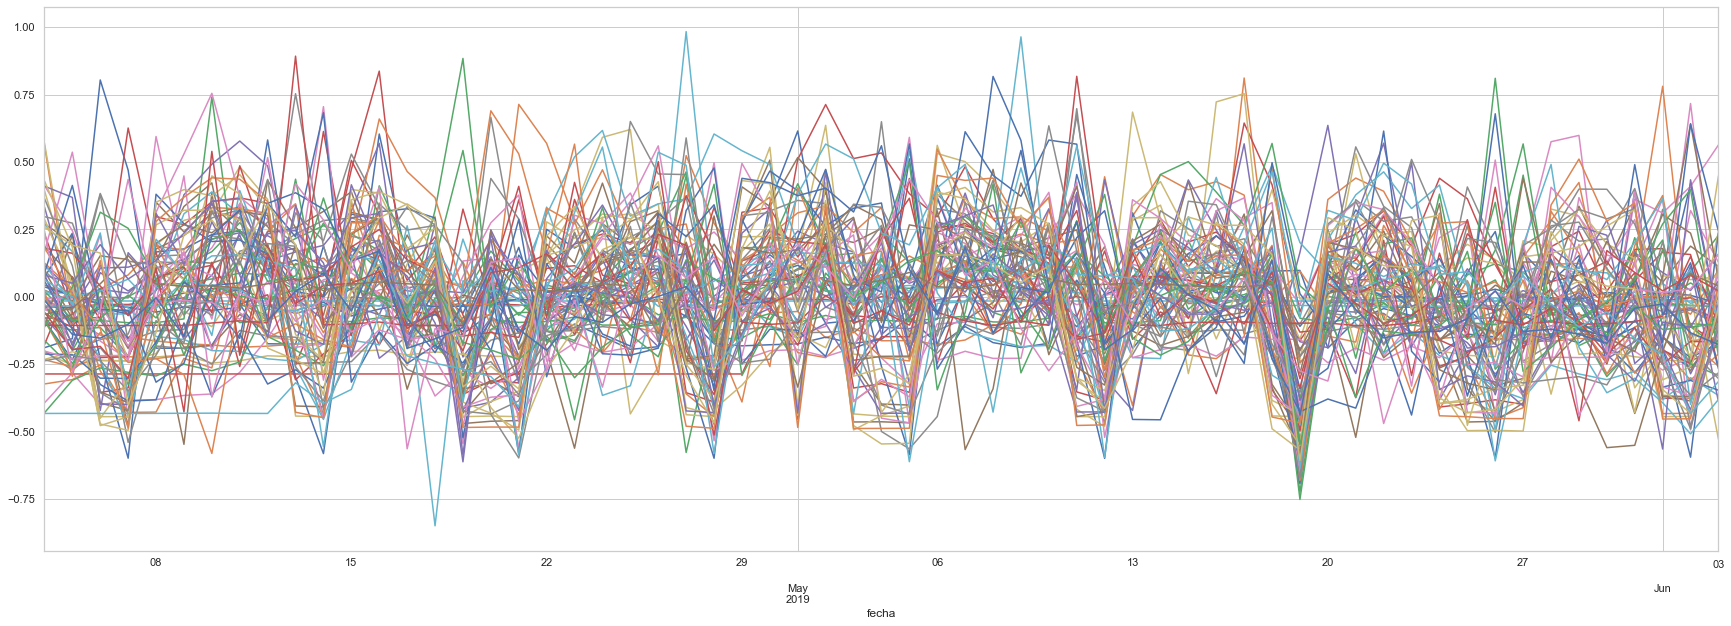

In [25]:
plt.figure(figsize=(30,10))
for n,g in df_meters_uniform.groupby("medidor"):
    g.set_index("fecha", inplace = True)
    g = g.resample("D").sum()
    g["kwh_consumido"] =(g["kwh_consumido"] - g["kwh_consumido"].mean()) / (g["kwh_consumido"].max() - g["kwh_consumido"].min())
    g["kwh_consumido"].plot()


In [26]:
df_ultima_medicion=df[df["medidor"].isin(qqq.index)]
df_ultima_medicion["hora"] = df_ultima_medicion["fecha"].dt.hour
df_ultima_medicion["date"] = df_ultima_medicion["fecha"].dt.date
df_max_dia=df_ultima_medicion.groupby(['medidor','date'])['hora'].max().unstack()
df_max_dia

date      2019-04-04  2019-04-05  2019-04-06  2019-04-07  2019-04-08  \
medidor                                                                
15029835          22          23          23          23          23   
15029844          23          22          22          22          23   
15029846          22          22          22          22          22   
15029847          23          22          22          22          22   
15029977          22          22          22          22          22   
15842885          22          22          22          22          22   
15842894          22          22          22          22          22   
16567743          23          22          22          22          22   
16567746          22          22          22          22          22   
16567760          22          22          22          22          22   
16567761          22          22          22          22          22   
16567763          22          22          22          22          21   
16951175          22          22          22          22          22   
16951176          22          23          23          23          23   
16951180          22          22          18          22          23   
16951181          22          22          22          22          22   
16951199          23          22          22          22          22   
16951201          22          22          22          22          22   
16951203          22          22          22          22          22   
16951205          22          22          22          22          22   
16951207          22          22          22          22          22   
16951208          22          22          22          22          22   
16951209          22          22          22          22          22   
16951216          23          22          22          22          21   
16951219          22          22          22          22          22   
16951220          22          22          22          22          22   
16951221          22          22          22          22          22   
16951222          23          22          22          22          22   
20037228          22          22          22          22          22   
28006904          23          22          22          22          22   
...              ...         ...         ...         ...         ...   
52073218          23          20          20          20          20   
52073240          23          20          20          20          20   
52073264          21          22          22          22          22   
52073290          23          20          20          20          20   
52073292          20          20          20          20          20   
52073295          21          20          20          20          20   
52073302          21          20          20          20          20   
52073321          23          20          20          20          20   
52073331          20          20          20          20          20   
52073345          23          22          22          22          22   
52073348          23          22          22          22          22   
52073352          22          22          22          22          22   
52073359          21          22          22          22          22   
52073382          21          22          22          22          22   
53307830          21          22          22          21          21   
53307859          21          20          20          20          20   
53307871          23          20          20          20          21   
53444735          20          23          21          21          21   
58706632          21          22          21          21          21   
58706634          20          22          22          22          22   
58706655          21          22          22          22          22   
58706659          23          20          20          20          20   
58706662          23          20        

In [94]:
df_max_dia['Min_hora_max']= df_max_dia.min(axis=1)
df_max_dia.head()

date      2019-04-04  2019-04-05  2019-04-06  2019-04-07  2019-04-08  \
medidor                                                                
15029835          22          23          23          23          23   
15029844          23          22          22          22          23   
15029846          22          22          22          22          22   
15029847          23          22          22          22          22   
15029977          22          22          22          22          22   

date      2019-04-09  2019-04-10  2019-04-11  2019-04-12  2019-04-13  ...  \
medidor                                                               ...   
15029835          23          23          23          23          23  ...   
15029844          23          23          22          22          22  ...   
15029846          22          22          22          22          22  ...   
15029847          22          22          22          22          23  ...   
15029977          23          23          23          23          23  ...   

date      2019-05-27  2019-05-28  2019-05-29  2019-05-30  2019-05-31  \
medidor                                                                
15029835          23          23          23          23          23   
15029844          22          22          23          23          23   
15029846          22          22          22          22          22   
15029847          22          22          22          22          22   
15029977          23          23          22          22          22   

date      2019-06-01  2019-06-02  2019-06-03  Min_hora_max  Max_hora_max  
medidor                                                                   
15029835          23          23          23            22            23  
15029844          23          23          23            18            23  
15029846          22          22          23            22            23  
15029847          22          22          21            20            23  
15029977          22          22          23            22            23  

[5 rows x 63 columns]

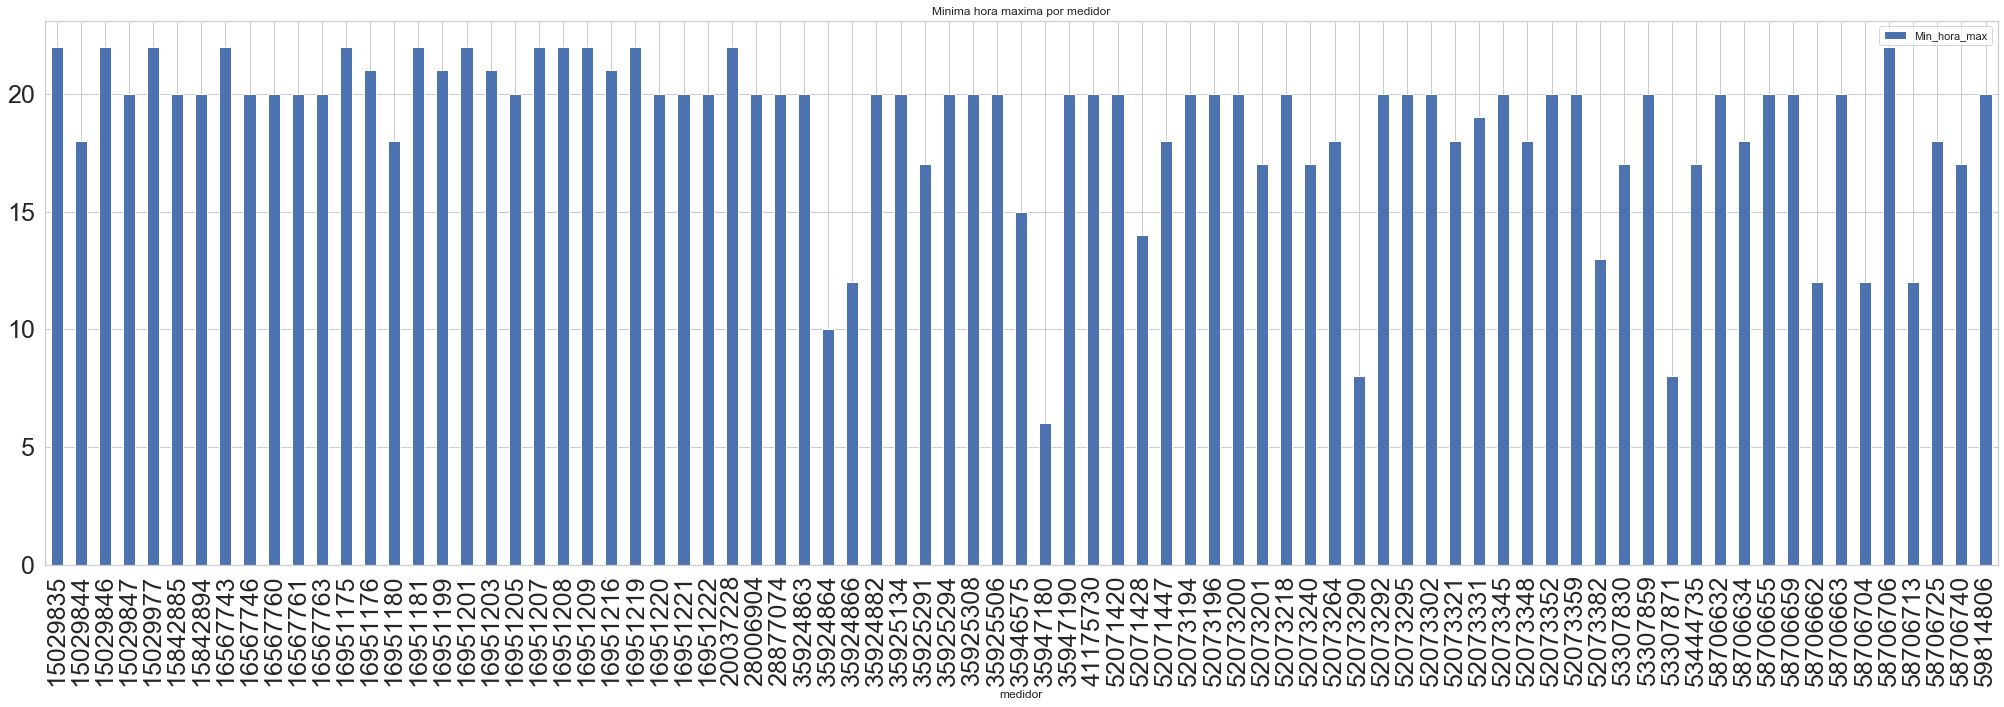

In [71]:
ax = df_max_dia['Min_hora_max'].plot(kind='bar', title ="Minima hora maxima por medidor",figsize=(35,10),legend=True, fontsize=25)
ax

In [95]:
df_max_dia['Max_hora_max']= df_max_dia.max(axis=1)
df_max_dia.head()

date      2019-04-04  2019-04-05  2019-04-06  2019-04-07  2019-04-08  \
medidor                                                                
15029835          22          23          23          23          23   
15029844          23          22          22          22          23   
15029846          22          22          22          22          22   
15029847          23          22          22          22          22   
15029977          22          22          22          22          22   

date      2019-04-09  2019-04-10  2019-04-11  2019-04-12  2019-04-13  ...  \
medidor                                                               ...   
15029835          23          23          23          23          23  ...   
15029844          23          23          22          22          22  ...   
15029846          22          22          22          22          22  ...   
15029847          22          22          22          22          23  ...   
15029977          23          23          23          23          23  ...   

date      2019-05-27  2019-05-28  2019-05-29  2019-05-30  2019-05-31  \
medidor                                                                
15029835          23          23          23          23          23   
15029844          22          22          23          23          23   
15029846          22          22          22          22          22   
15029847          22          22          22          22          22   
15029977          23          23          22          22          22   

date      2019-06-01  2019-06-02  2019-06-03  Min_hora_max  Max_hora_max  
medidor                                                                   
15029835          23          23          23            22            23  
15029844          23          23          23            18            23  
15029846          22          22          23            22            23  
15029847          22          22          21            20            23  
15029977          22          22          23            22            23  

[5 rows x 63 columns]

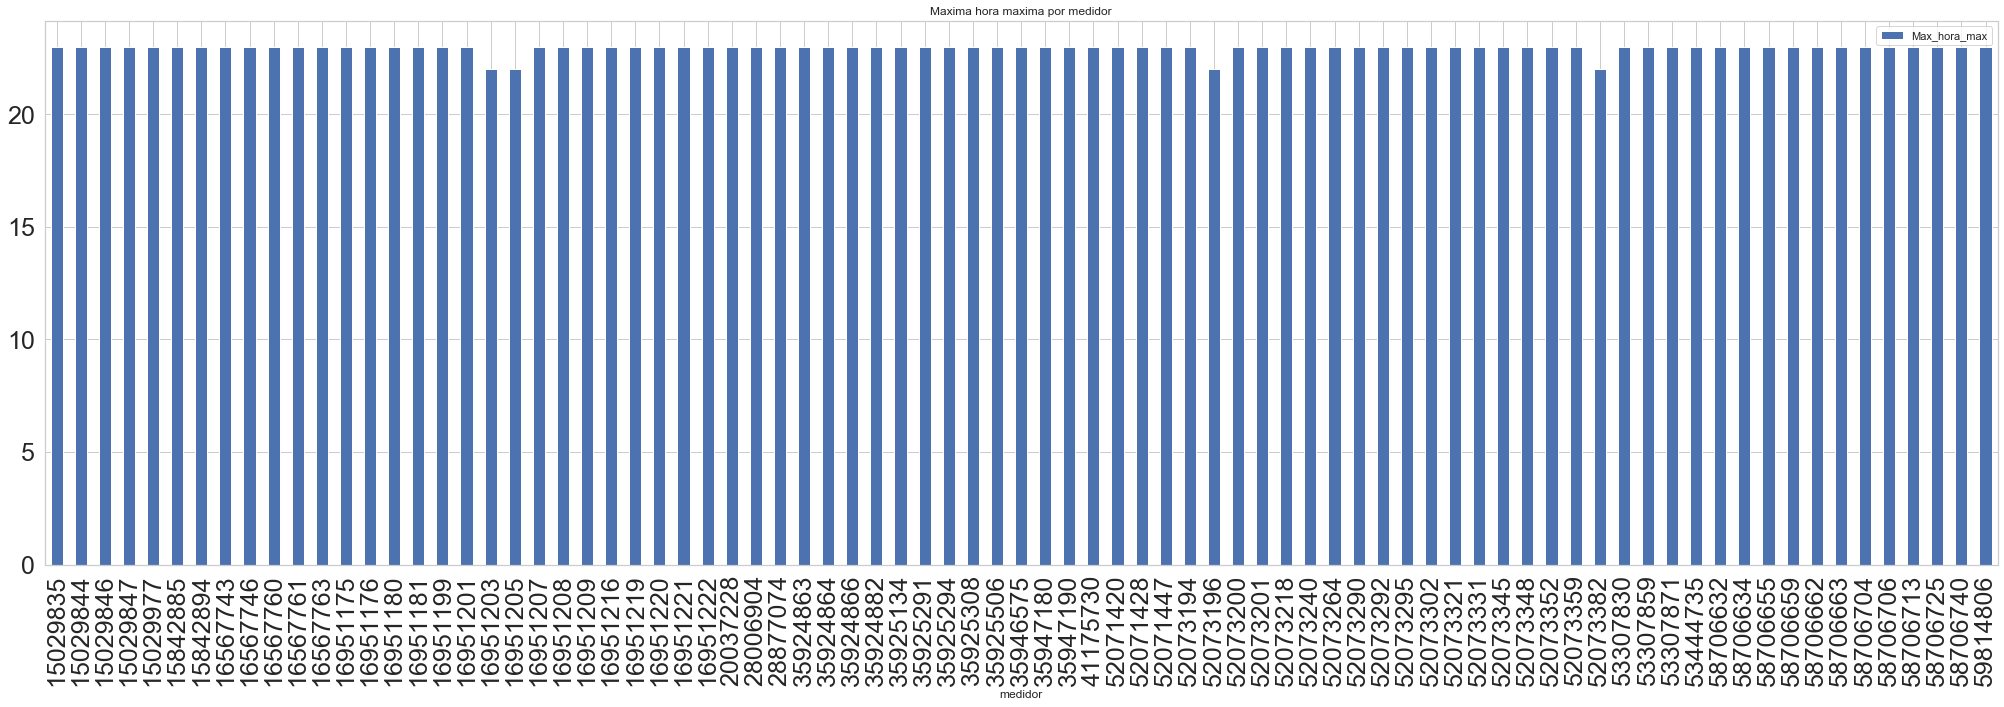

In [72]:
ax = df_max_dia['Max_hora_max'].plot(kind='bar', title ="Maxima hora maxima por medidor",figsize=(35,10),legend=True, fontsize=25)
ax

In [6]:
df['hora'] = df['fecha'].dt.hour

In [7]:
df_filtrado_horas = df.loc[(df['hora']>=6) & (df['hora']<=22),:]
df_filtrado_horas

medidor               fecha  lectura_id_orig  voltajeA  voltajeB  \
3      15029828 2019-04-04 07:01:01          1142711  119.8214  119.9720   
4      15029828 2019-04-04 09:01:02          1143130  114.6726  114.8017   
5      15029828 2019-04-04 11:00:58          1143509  114.6649  114.8677   
6      15029828 2019-04-04 13:00:59          1143880  114.8444  115.3403   
7      15029828 2019-04-04 15:01:02          1144272  114.6778  114.8357   
8      15029828 2019-04-04 17:01:02          1144628  116.9224  117.2767   
9      15029828 2019-04-04 19:01:02          1145053  114.1925  114.8132   
10     15029828 2019-04-04 21:01:05          1145457  117.5392  117.8100   
14     15029828 2019-04-05 09:01:03          1148042  116.4599  116.4413   
15     15029828 2019-04-05 13:08:58          1149035  114.3455  114.0721   
16     15029828 2019-04-05 15:40:19          1149560  117.0340  116.8882   
17     15029828 2019-04-05 17:40:18          1149951  117.3378  117.1492   
18     15029828 2019-04-05 19:40:17          1150347  115.3972  116.1736   
19     15029828 2019-04-05 21:10:21          1150696  115.7649  116.0876   
24     15029828 2019-04-06 07:10:23          1152796  118.7317  117.9507   
25     15029828 2019-04-06 11:10:26          1153513  116.4383  116.1652   
26     15029828 2019-04-06 13:10:26          1153845  116.6304  116.6429   
27     15029828 2019-04-06 15:10:26          1154204  116.2677  116.1883   
28     15029828 2019-04-06 17:10:26          1154528  117.7125  117.3089   
29     15029828 2019-04-06 19:10:24          1154910  114.8396  115.1581   
30     15029828 2019-04-06 21:10:24          1155297  115.8406  115.5660   
35     15029828 2019-04-07 07:10:26          1157371  119.2734  119.2492   
36     15029828 2019-04-07 09:10:26          1157757  117.4396  117.5319   
37     15029828 2019-04-07 11:10:26          1158113  116.9756  116.9406   
38     15029828 2019-04-07 15:10:28          1158841  115.3887  115.5478   
39     15029828 2019-04-07 17:10:30          1159208  117.0205  116.8766   
40     15029828 2019-04-07 21:10:28          1160012  115.0320  115.2359   
44     15029828 2019-04-08 07:10:30          1162137  117.6560  117.7750   
45     15029828 2019-04-08 09:10:29          1162522  116.0592  116.3544   
46     15029828 2019-04-08 11:10:29          1162881  113.9265  113.8277   
...         ...                 ...              ...       ...       ...   
60570  59814806 2019-05-27 13:24:13          1407242  125.2000    0.0000   
60571  59814806 2019-05-27 17:24:14          1408071  125.5000    0.0000   
60572  59814806 2019-05-27 21:24:14          1408894  125.1000    0.0000   
60575  59814806 2019-05-28 09:24:16          1411401  125.2000    0.0000   
60576  59814806 2019-05-28 13:24:16          1412170  124.5000    0.0000   
60577  59814806 2019-05-28 21:24:17          1413758  124.1000    0.0000   
60580  59814806 2019-05-29 09:24:21          1416242  125.4000    0.0000   
60581  59814806 2019-05-29 13:24:22          1417001  124.5000    0.0000   
60582  59814806 2019-05-29 17:24:23          1417789  124.6000    0.0000   
60583  59814806 2019-05-29 21:24:23          1418568  125.1000    0.0000   
60586  59814806 2019-05-30 09:24:22          1420977  124.9000    0.0000   
60587  59814806 2019-05-30 13:24:22          1421728  125.5000    0.0000   
60588  59814806 2019-05-30 17:24:23          1422537  125.4000    0.0000   
60589  59814806 2019-05-30 21:24:26          1423273  125.2000    0.0000   
60592  59814806 2019-05-31 09:24:25          1425605  125.2000    0.0000   
60593  59814806 2019-05-31 13:24:25          1426317  123.2000    0.0000   
60594  59814806 2019-05-31 17:24:26          1427012  125.7000    0.0000   
60595  59814806 2019-05-31 21:24:27          1427767  125.1000    0.0000   
60598  59814806 2019-06-01 09:24:28          1430349  125.3000    0.0000   
60599  59814806 2019-06-01 13:24:28          1431022  124.0000    0.0000   
60600  59814806 2019-06-01 17:24:29          1431759  12

In [24]:
df_filt_meters_uniform = df_filtrado_horas[df_filtrado_horas["medidor"].isin(qqq.index)]

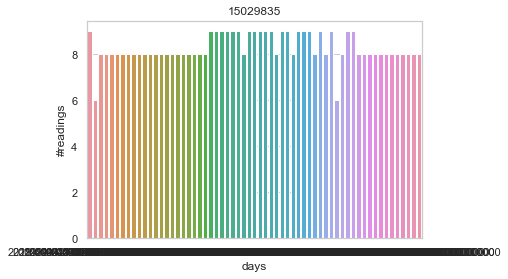

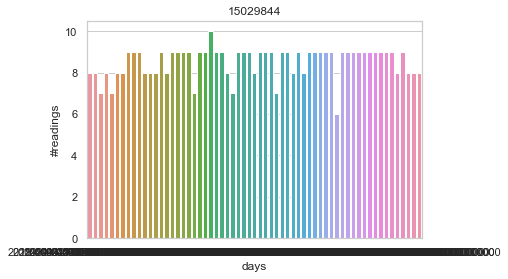

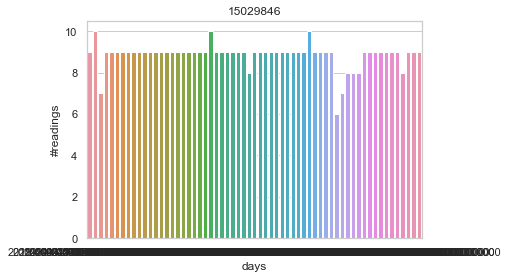

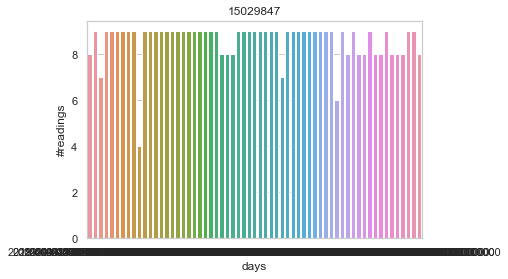

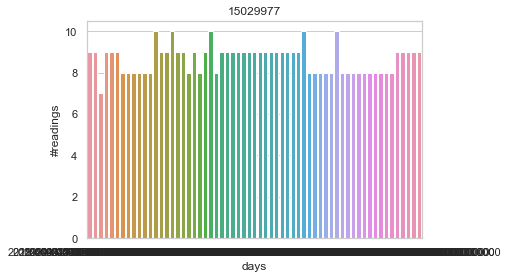

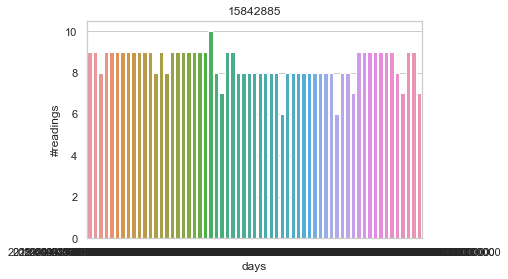

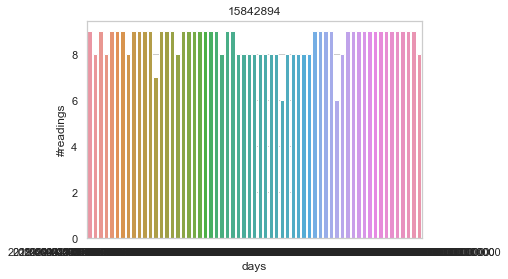

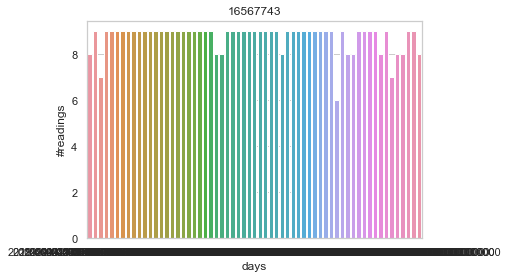

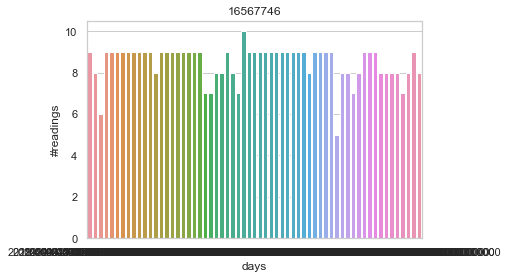

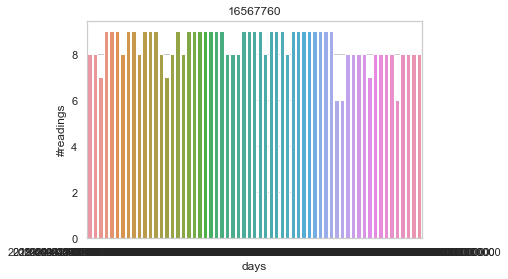

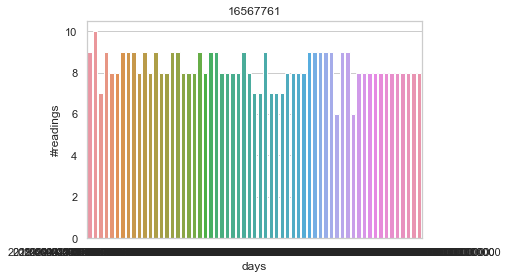

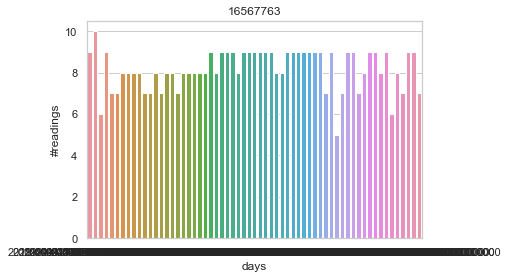

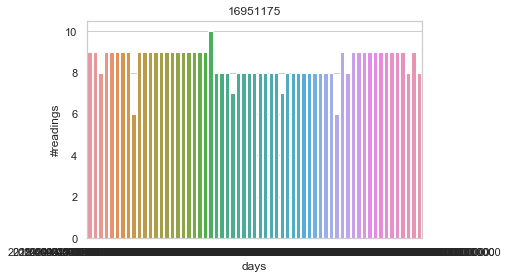

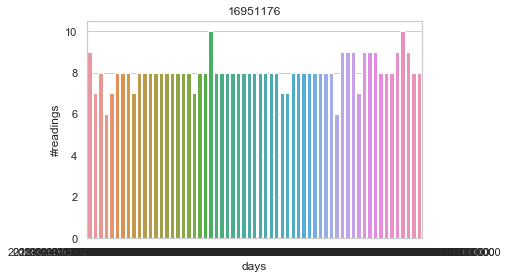

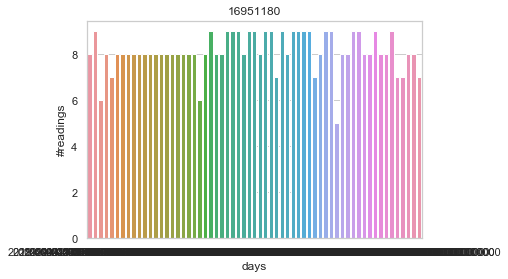

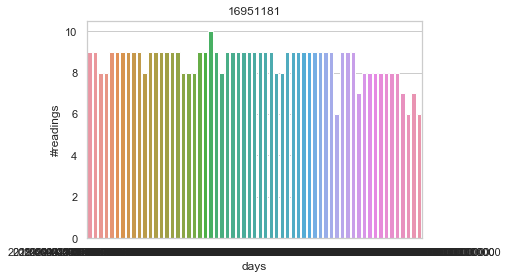

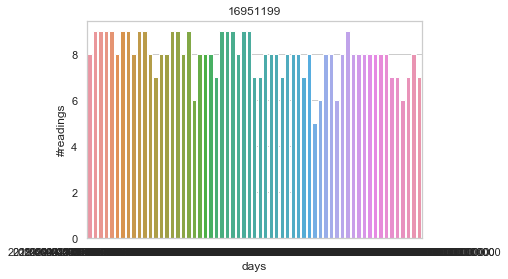

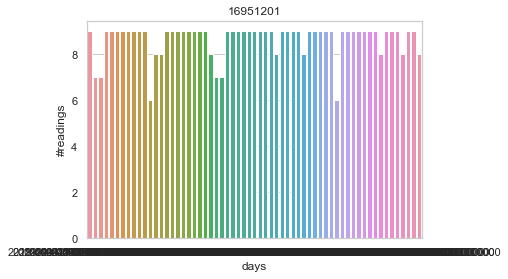

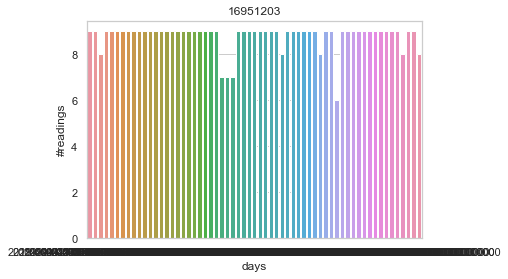

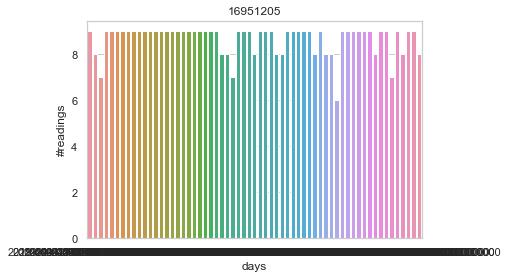

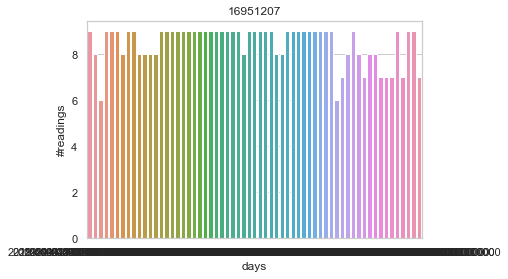

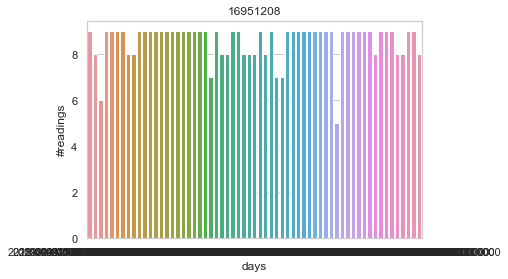

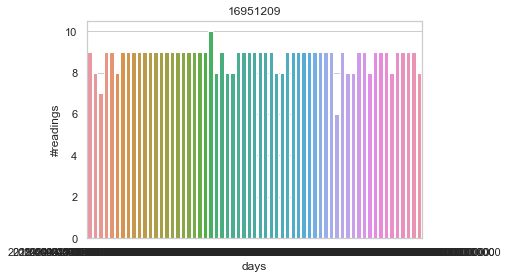

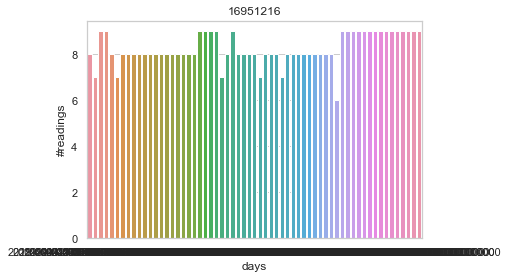

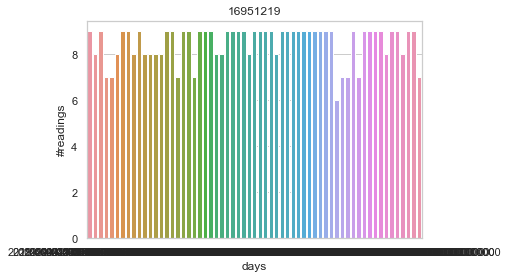

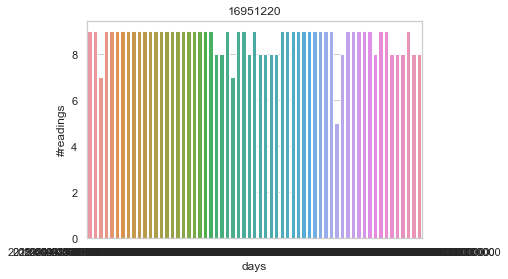

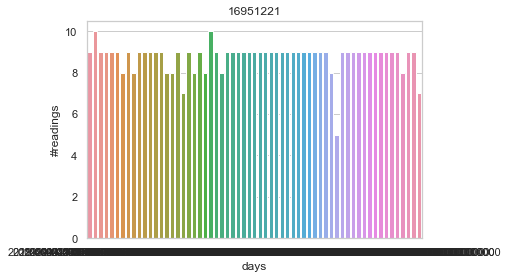

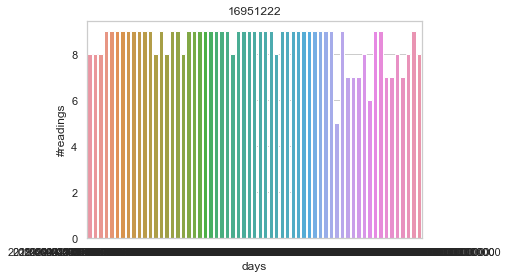

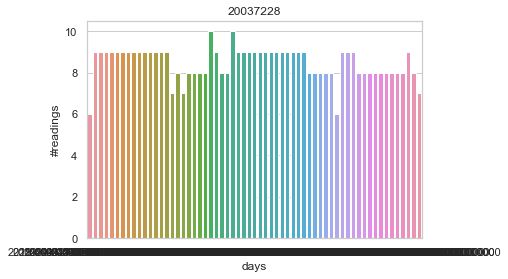

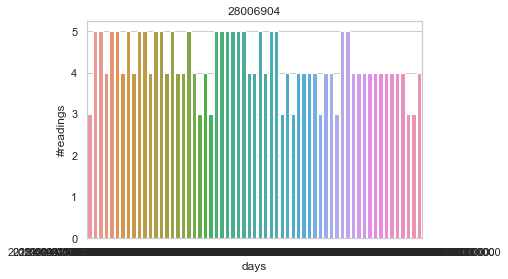

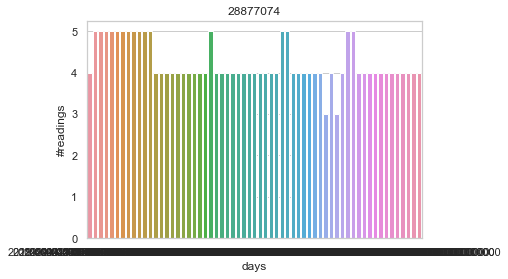

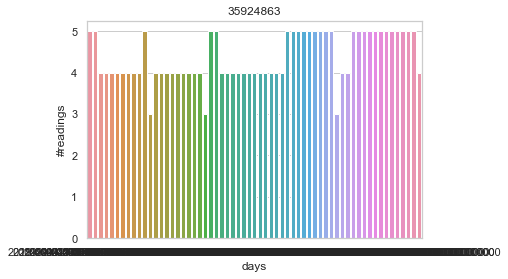

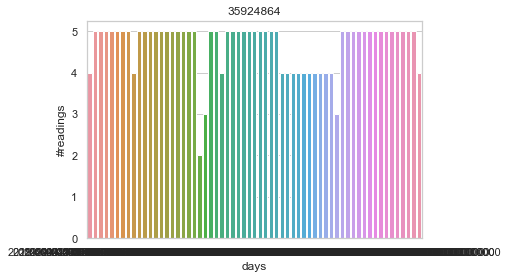

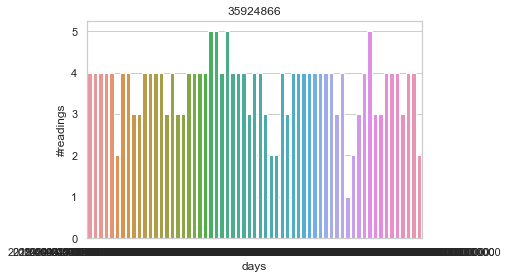

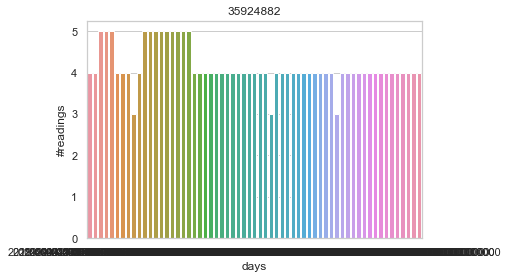

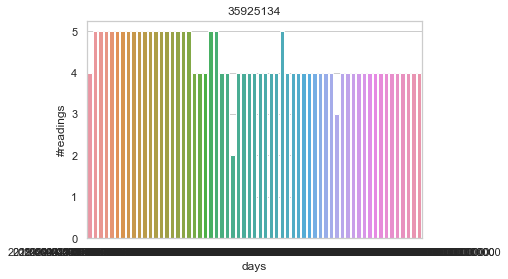

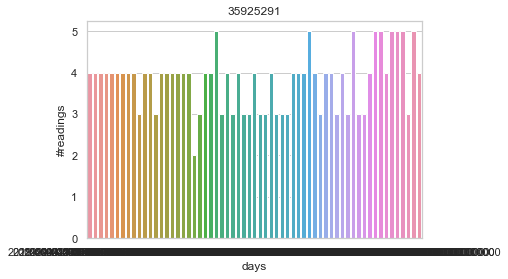

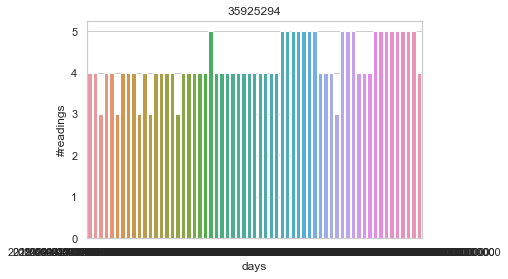

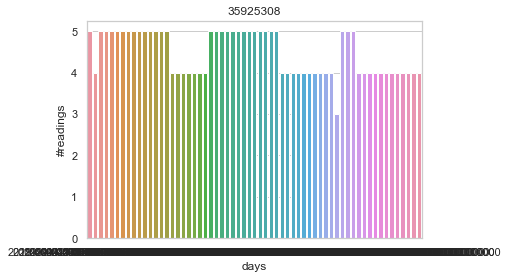

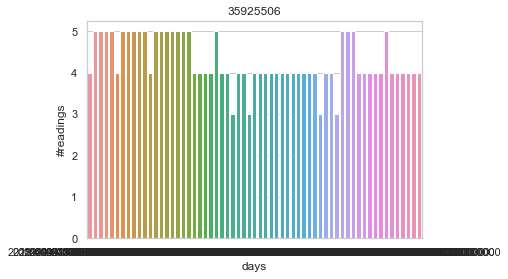

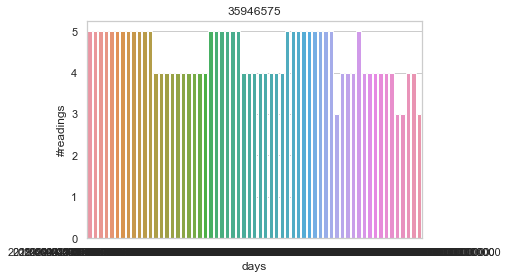

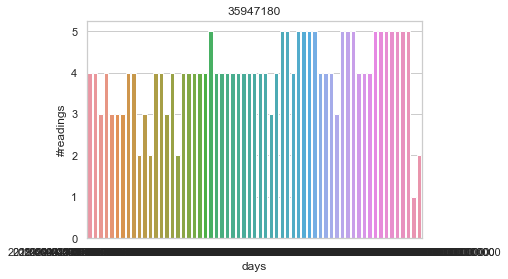

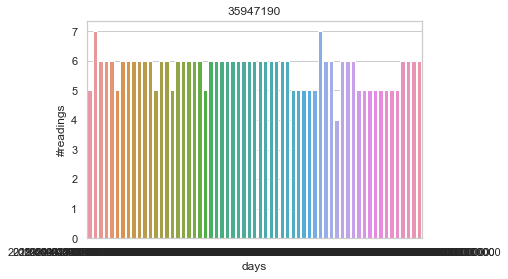

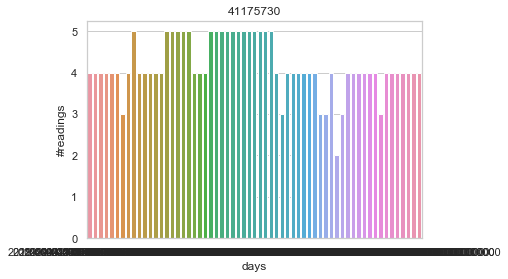

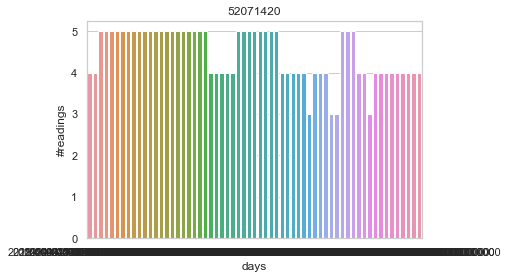

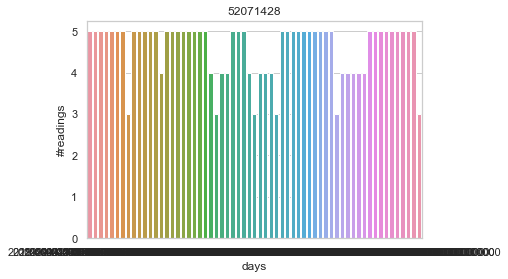

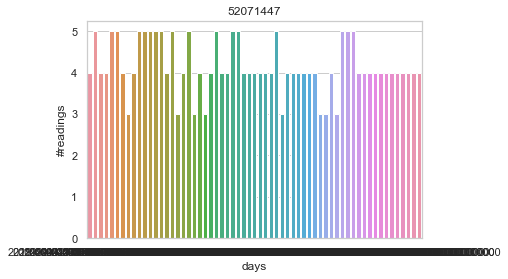

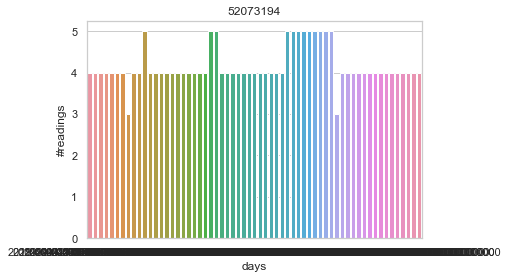

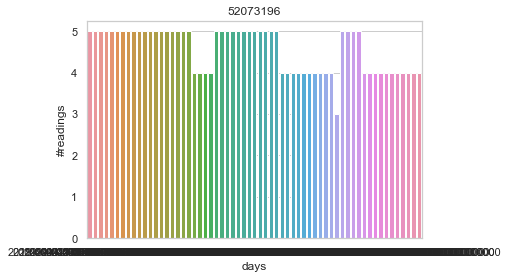

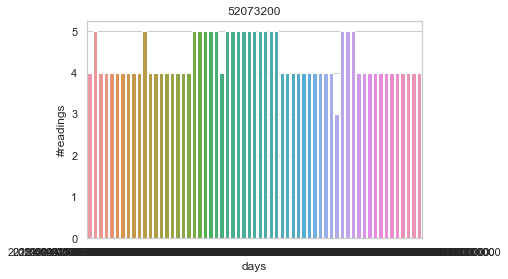

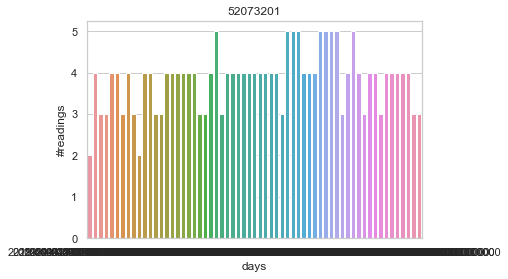

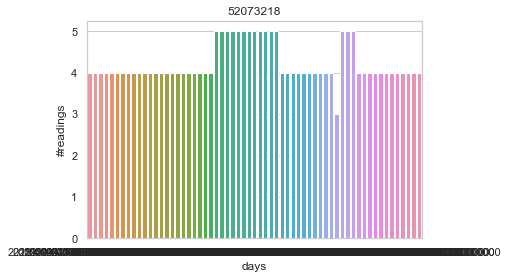

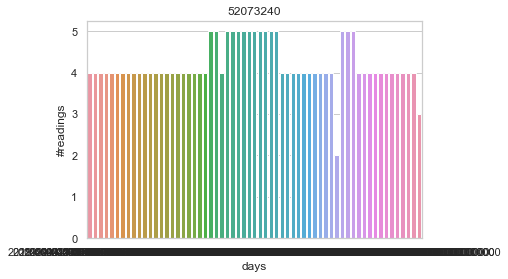

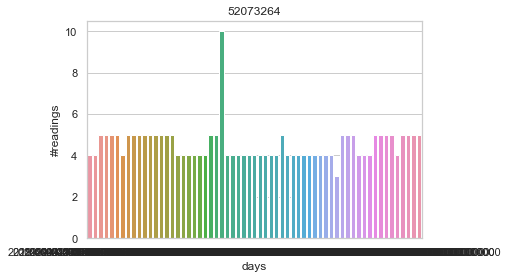

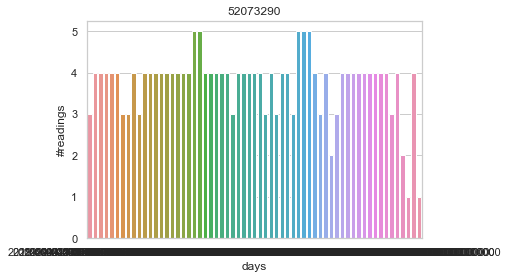

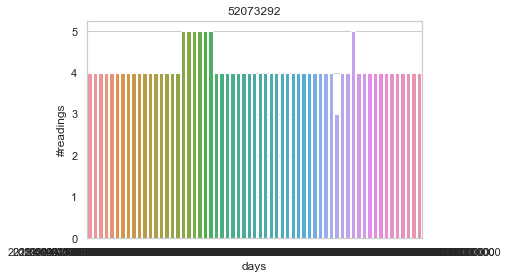

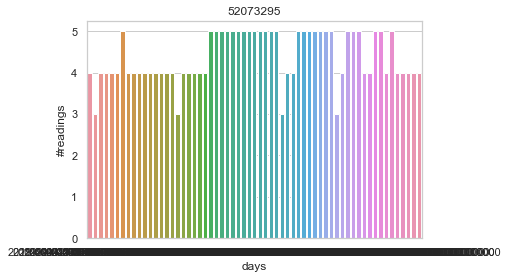

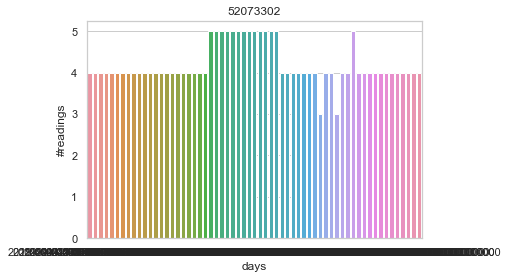

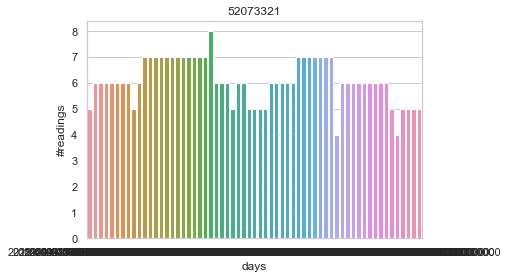

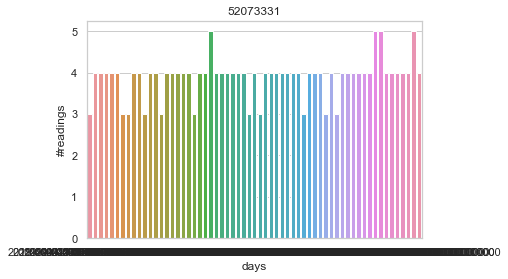

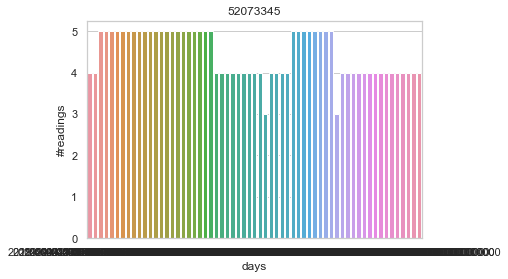

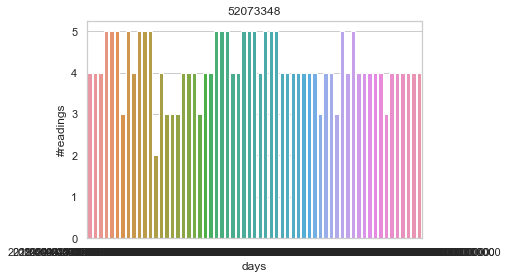

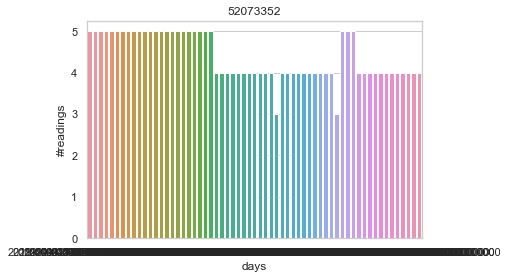

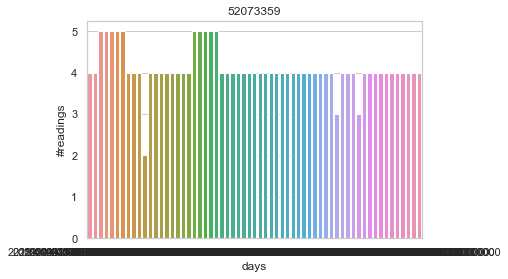

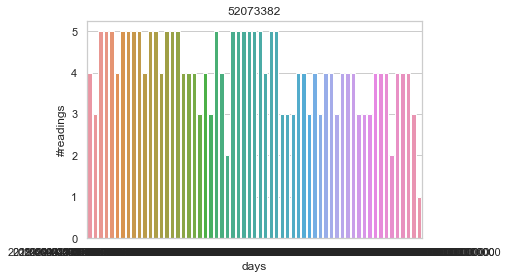

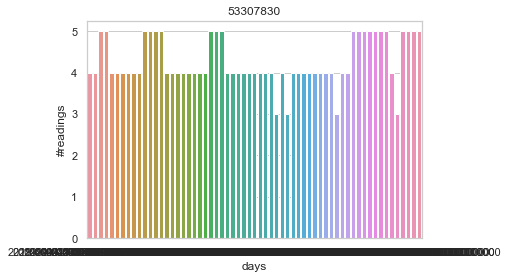

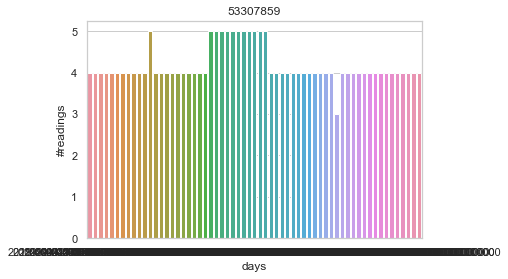

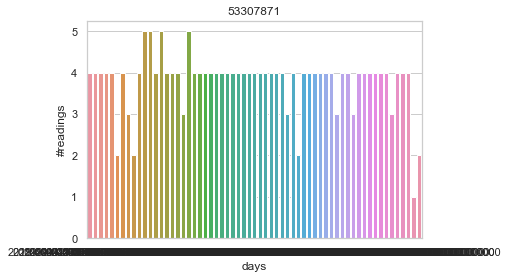

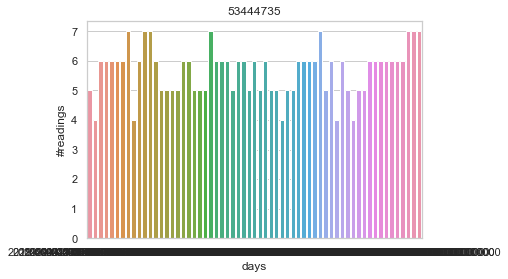

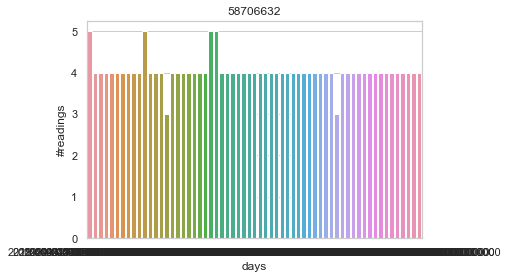

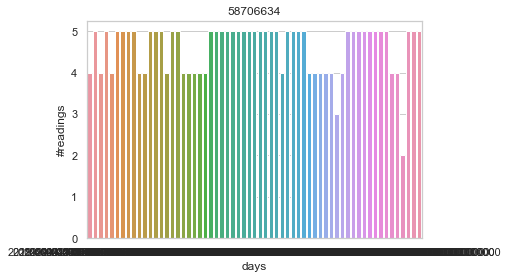

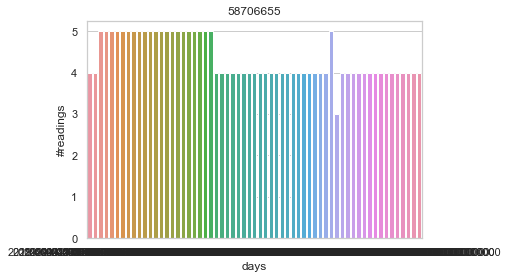

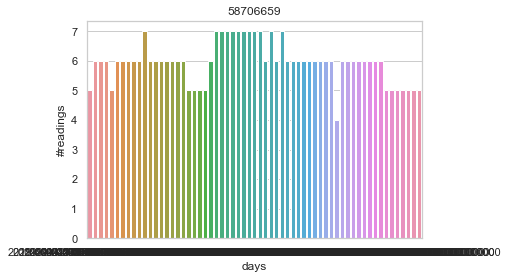

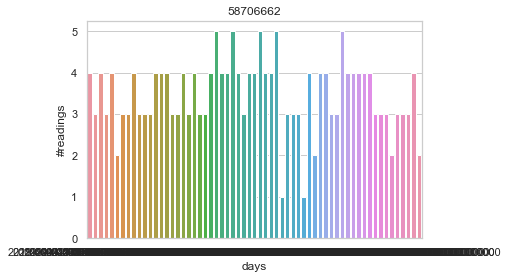

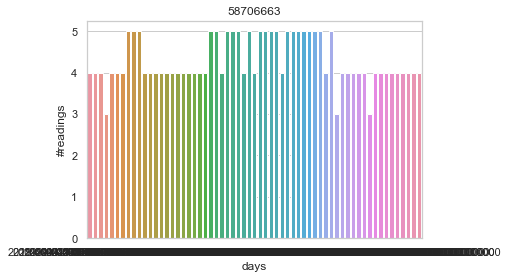

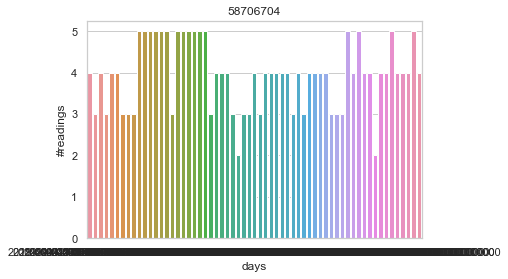

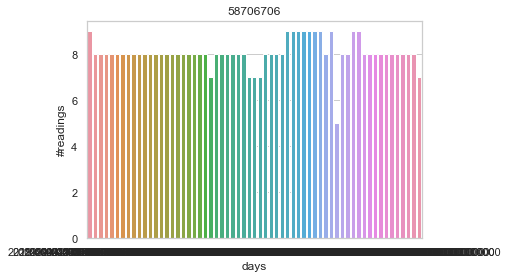

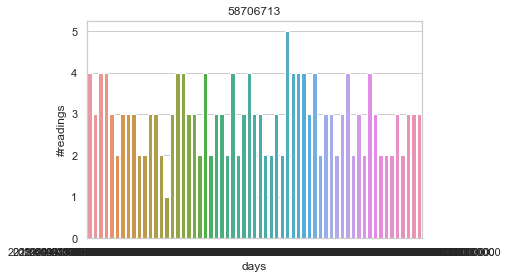

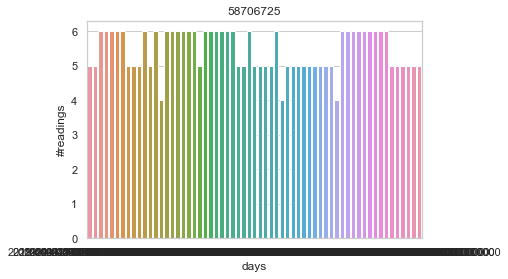

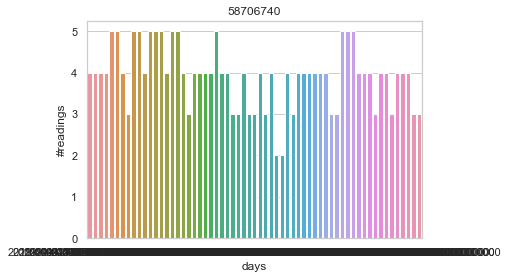

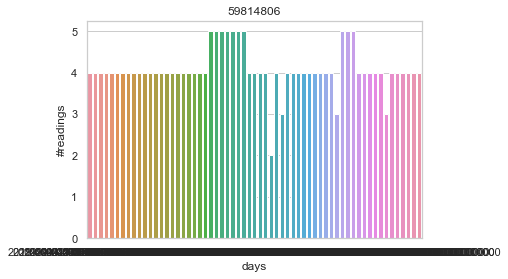

In [25]:
for n,g in df_filt_meters_uniform.groupby("medidor"):
    g.set_index("fecha", inplace = True)
    g = g.resample("D").count()
    figure = plt.figure()
    ax = sns.barplot(x = g.index, y = "voltajeA", data =g)
    ax.set(xlabel='days', ylabel='#readings', title = n)